# A Guide to Time Series Analysis in Python

In [102]:
import pandas as pd 
df = pd.read_csv("C:/Users/Admin/Machine Learning chapter 5/AirPassengers.csv")

In [2]:
df

Month  #Passengers
0    1949-01          112
1    1949-02          118
2    1949-03          132
3    1949-04          129
4    1949-05          121
..       ...          ...
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432

[144 rows x 2 columns]

In [3]:
print(df.tail())

       Month  #Passengers
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432


Note that this process automatically inserts the first day of each month, which is basically a dummy value since we have no daily passenger data.

In [5]:
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')
print(df.head())

       Month  #Passengers
0 1949-01-01          112
1 1949-02-01          118
2 1949-03-01          132
3 1949-04-01          129
4 1949-05-01          121


In [9]:
df.index = df['Month']
del df['Month']
print(df.head())

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


In [11]:
df

#Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121
...                 ...
1960-08-01          606
1960-09-01          508
1960-10-01          461
1960-11-01          390
1960-12-01          432

[144 rows x 1 columns]

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns 

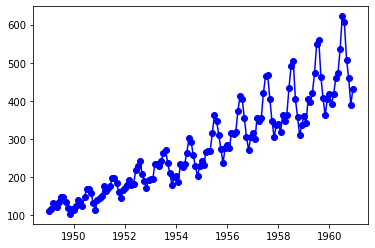

In [31]:
f, ax = plt.subplots(1, 1)
x_col='Month'
y_col = 'Number of Passengers'
ax.plot_date(df.index, df["#Passengers"], color="blue", label="Passengers",linestyle="-")

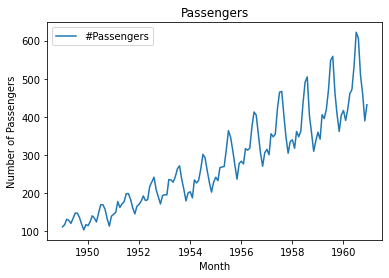

In [32]:
sns.lineplot(data=df, x=df.index, y=df['#Passengers'])
plt.title('Passengers')
plt.legend(['#Passengers'])
plt.ylabel('Number of Passengers')
plt.show()

In [20]:
rolling_mean = df.rolling(7).mean()
rolling_std = df.rolling(7).std()

In [21]:
rolling_mean

#Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   500.857143
1960-09-01   517.571429
1960-10-01   523.571429
1960-11-01   513.428571
1960-12-01   507.714286

[144 rows x 1 columns]

if you check the window rolling line of mean and std start after because of the first Nan values of seven months. 
if the std is close to cero it means that the values are closed to the mean. 

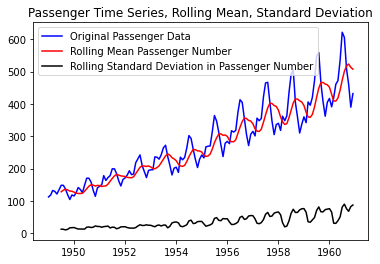

In [33]:
plt.plot(df, color="blue",label="Original Passenger Data")
plt.plot(rolling_mean, color="red", label="Rolling Mean Passenger Number")
plt.plot(rolling_std, color="black", label = "Rolling Standard Deviation in Passenger Number")
plt.title("Passenger Time Series, Rolling Mean, Standard Deviation")
plt.legend(loc="best")

Stationarity. A common assumption in many time series techniques is that the data are stationary. A stationary process has the property that the mean, variance and autocorrelation structure do not change over time.

 A trend can be increasing(upward), decreasing(downward), or horizontal(stationary).
 Therefore, stationary means that data does not change over time. 

A stationary process' distribution does not change over time. An intuitive example: you flip a coin. 50% heads, regardless of whether you flip it today or tomorrow or next year.

Time series are stationary if they do not have trend or seasonal effects. Summary statistics calculated on the time series are consistent over time, like the mean or the variance of the observations.

What is non-stationary data series?
A time series whose statistical properties change over time is called a non-stationary time series. Thus a time series with a trend or seasonality is non-stationary in nature. This is because the presence of trend or seasonality will affect the mean, variance and other properties at any given point in time.

The Augmented Dickey-Fuller test is a type of statistical test called a unit root test.

The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.

There are a number of unit root tests and the Augmented Dickey-Fuller may be one of the more widely used. It uses an autoregressive model and optimizes an information criterion across multiple different lag values.

The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.
We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [37]:
from statsmodels.tsa.stattools import adfuller
X = df['#Passengers']
adft = adfuller(X)

In [38]:
adft

(0.8153688792060502,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [39]:
output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]  , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used","critical value (1%)", "critical value (5%)", "critical value (10%)"]})
output_df

Values                       Metric
0    0.815369              Test Statistics
1    0.991880                      p-value
2   13.000000             No. of lags used
3  130.000000  Number of observations used
4   -3.481682          critical value (1%)
5   -2.884042          critical value (5%)
6   -2.578770         critical value (10%)

We can see that our data is not stationary from the fact that our p-value is greater than 5 percent and the test statistic is greater than the critical value. We can also draw these conclusions from inspecting the data, as we see a clear, increasing trend in the number of passengers.

# Autocorrelation

In [40]:
autocorrelation_lag1 = df['#Passengers'].autocorr(lag=1)

In [41]:
autocorrelation_lag1

0.9601946480498523

In [44]:
df['passengers_lag_1'] = df['#Passengers'].shift(1)
df['passengers_lag_2'] = df['#Passengers'].shift(5)

In [45]:
df['passengers_lag_1']

Month
1949-01-01      NaN
1949-02-01    112.0
1949-03-01    118.0
1949-04-01    132.0
1949-05-01    129.0
              ...  
1960-08-01    622.0
1960-09-01    606.0
1960-10-01    508.0
1960-11-01    461.0
1960-12-01    390.0
Name: passengers_lag_1, Length: 144, dtype: float64

In [47]:
autocorrelation_lag1 = df['#Passengers'].autocorr(lag=1)
print("One Month Lag: ", autocorrelation_lag1)
autocorrelation_lag3 = df['#Passengers'].autocorr(lag=3)
print("Three Month Lag: ", autocorrelation_lag3)

autocorrelation_lag6 = df['#Passengers'].autocorr(lag=6)
print("Six Month Lag: ", autocorrelation_lag6)

autocorrelation_lag9 = df['#Passengers'].autocorr(lag=9)
print("Nine Month Lag: ", autocorrelation_lag9)

One Month Lag:  0.9601946480498523
Three Month Lag:  0.837394765081794
Six Month Lag:  0.7839187959206183
Nine Month Lag:  0.8278519011167601


# Forecasting

Time series forecasting allows us to predict future values in a time series given current and past data. Here, we will use the ARIMA method to forecast the number of passengers, which allows us to forecast future values in terms of a linear combination of past values. We will use the auto_arima package, which will allow us to forgo the time consuming process of hyperparameter tuning.

First, let’s split our data for training and testing and visualize the split:

In [49]:
df

#Passengers  passengers_lag_1  passengers_lag_2
Month                                                      
1949-01-01          112               NaN               NaN
1949-02-01          118             112.0               NaN
1949-03-01          132             118.0               NaN
1949-04-01          129             132.0               NaN
1949-05-01          121             129.0               NaN
...                 ...               ...               ...
1960-08-01          606             622.0             419.0
1960-09-01          508             606.0             461.0
1960-10-01          461             508.0             472.0
1960-11-01          390             461.0             535.0
1960-12-01          432             390.0             622.0

[144 rows x 3 columns]

In [50]:
train = df[df.index < pd.to_datetime("1960-08", format='%Y-%m')]
train['train'] = train['#Passengers']

C:\Users\Admin\AppData\Local\Temp/ipykernel_18352/4220422305.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['train'] = train['#Passengers']


In [84]:
train

#Passengers  passengers_lag_1  passengers_lag_2  train
Month                                                             
1949-01-01          112               NaN               NaN    112
1949-02-01          118             112.0               NaN    118
1949-03-01          132             118.0               NaN    132
1949-04-01          129             132.0               NaN    129
1949-05-01          121             129.0               NaN    121
...                 ...               ...               ...    ...
1960-03-01          419             391.0             407.0    419
1960-04-01          461             419.0             362.0    461
1960-05-01          472             461.0             405.0    472
1960-06-01          535             472.0             417.0    535
1960-07-01          622             535.0             391.0    622

[139 rows x 4 columns]

In [52]:
test = df[df.index >= pd.to_datetime("1960-08", format='%Y-%m')]

In [53]:
test['test'] = test['#Passengers']

C:\Users\Admin\AppData\Local\Temp/ipykernel_18352/2939666352.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['test'] = test['#Passengers']


In [54]:
test['test']

Month
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: test, dtype: int64

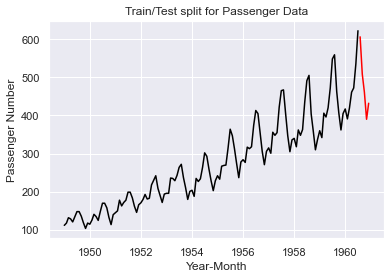

In [56]:
plt.plot(train['train'], color = "black")
plt.plot(test['test'], color = "red")
plt.title("Train/Test split for Passenger Data")
plt.ylabel("Passenger Number")
plt.xlabel('Year-Month')
sns.set()
plt.show()

In [59]:
!pip install pmdarima

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.22.4 which is incompatible.



  Using cached packaging-23.0-py3-none-any.whl (42 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3
  Attempting uninstall: packaging
    Found existing installation: packaging 21.0
    Uninstalling packaging-21.0:
      Successfully uninstalled packaging-21.0
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [73]:
from statsmodels.tsa.arima_model import ARIMA

In [88]:
model = ARIMA(train['#Passengers'],  order =  (1,1,1)) 

C:\Users\Admin\anacondalastone\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  # If an index is available, see if it is a date-based index or if it
C:\Users\Admin\anacondalastone\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  # If an index is available, see if it is a date-based index or if it


In [89]:
model_fit = model.fit() 

In [96]:
test = test['test'].to_frame()

In [99]:
test['test']

Month
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: test, dtype: int64

In [91]:
predictions

1949-02-01     3.730251
1949-03-01     4.264753
1949-04-01     6.176545
1949-05-01    -0.366065
1949-06-01     3.335607
                ...    
1960-03-01    12.569414
1960-04-01     5.305419
1960-05-01    17.521798
1960-06-01    -5.990708
1960-07-01    36.212350
Freq: MS, Length: 138, dtype: float64

# Complete Guide on Time Series Analysis in Python

Components of a Time-Series
Trend - The trend shows a general direction of the time series data over a long period of time. A trend can be increasing(upward), decreasing(downward), or horizontal(stationary).

Seasonality - The seasonality component exhibits a trend that repeats with respect to timing, direction, and magnitude. Some examples include an increase in water consumption in summer due to hot weather conditions.

Cyclical Component - These are the trends with no set repetition over a particular period of time. A cycle refers to the period of ups and downs, booms and slums of a time series, mostly observed in business cycles. These cycles do not exhibit a seasonal variation but generally occur over a time period of 3 to 12 years depending on the nature of the time series.
Irregular Variation - These are the fluctuations in the time series data which become evident when trend and cyclical variations are removed. These variations are unpredictable, erratic, and may or may not be random.
ETS Decomposition - ETS Decomposition is used to separate different components of a time series. The term ETS stands for Error, Trend and Seasonality.

In [103]:
df

Month  #Passengers
0    1949-01          112
1    1949-02          118
2    1949-03          132
3    1949-04          129
4    1949-05          121
..       ...          ...
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432

[144 rows x 2 columns]

In [104]:
df.columns = ['Date','Number of Passengers']

df.head()

Date  Number of Passengers
0  1949-01                   112
1  1949-02                   118
2  1949-03                   132
3  1949-04                   129
4  1949-05                   121

In [112]:
import matplotlib.pyplot as plt

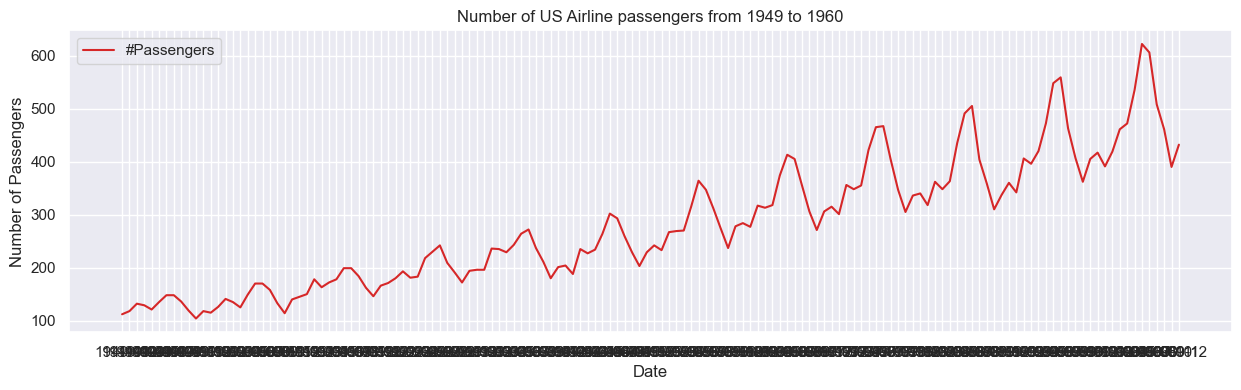

In [119]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Number of Passengers', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.legend(['#Passengers'])
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(df, x=df['Date'], y=df['Number of Passengers'], title='Number of US Airline passengers from 1949 to 1960')

In [129]:
df = pd.read_excel('C:/Users/Admin/Machine Learning chapter 5/Sample - Superstore.xls')
furniture = df.loc[df['Category'] == 'Furniture']

In [130]:
furniture

Row ID        Order ID Order Date  Ship Date       Ship Mode  \
0          1  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
1          2  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
3          4  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
5          6  CA-2014-115812 2014-06-09 2014-06-14  Standard Class   
10        11  CA-2014-115812 2014-06-09 2014-06-14  Standard Class   
...      ...             ...        ...        ...             ...   
9962    9963  CA-2015-168088 2015-03-19 2015-03-22     First Class   
9964    9965  CA-2016-146374 2016-12-05 2016-12-10    Second Class   
9980    9981  US-2015-151435 2015-09-06 2015-09-09    Second Class   
9989    9990  CA-2014-110422 2014-01-21 2014-01-23    Second Class   
9990    9991  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   

     Customer ID     Customer Name      Segment        Country  \
0       CG-12520       Claire Gute     Consumer  United States   
1       CG-12520       Claire Gute     Consumer  United States   
3       SO-20335    Sean O'Donnell     Consumer  United States   
5       BH-11710   Brosina Hoffman     Consumer  United States   
10      BH-11710   Brosina Hoffman     Consumer  United States   
...          ...               ...          ...            ...   
9962    CM-12655  Corinna Mitchell  Home Office  United States   
9964    HE-14800      Harold Engle    Corporate  United States   
9980    SW-20455       Shaun Weien     Consumer  United States   
9989    TB-21400  Tom Boeckenhauer     Consumer  United States   
9990    DB-13060       Dave Brooks     Consumer  United States   

                 City  ... Postal Code   Region       Product ID   Category  \
0           Henderson  ...       42420    South  FUR-BO-10001798  Furniture   
1           Henderson  ...       42420    South  FUR-CH-10000454  Furniture   
3     Fort Lauderdale  ...       33311    South  FUR-TA-10000577  Furniture   
5         Los Angeles  ...       90032     West  FUR-FU-10001487  Furniture   
10        Los Angeles  ...       90032     West  FUR-TA-10001539  Furniture   
...               ...  ...         ...      ...              ...        ...   
9962          Houston  ...       77041  Central  FUR-BO-10004218  Furniture   
9964           Newark  ...       19711     East  FUR-FU-10002671  Furniture   
9980        Lafayette  ...       70506    South  FUR-TA-10001039  Furniture   
9989            Miami  ...       33180    South  FUR-FU-10001889  Furniture   
9990       Costa Mesa  ...       92627     West  FUR-FU-10000747  Furniture   

     Sub-Category                                       Product Name  \
0       Bookcases                  Bush Somerset Collection Bookcase   
1          Chairs  Hon Deluxe Fabric Upholstered Stacking Chairs,...   
3          Tables      Bretford CR4500 Series Slim Rectangular Table   
5     Furnishings  Eldon Expressions Wood and Plastic Desk Access...   
10         Tables           Chromcraft Rectangular Conference Tables   
...           ...                                                ...   
9962    Bookcases  Bush Heritage Pine Collection 5-Shelf Bookcase...   
9964  Furnishings  Electrix 20W Halogen Replacement Bulb for Zoom...   
9980       Tables                         KI Adjustable-Height Table   
9989  Furnishings                             Ultra Door Pull Handle   
9990  Furnishings  Tenex B1-RE Series Chair Mats for Low Pile Car...   

          Sales  Quantity  Discount    Profit  
0      261.9600         2      0.00   41.9136  
1      731.9400         3      0.00  219.5820  
3      957.5775         5      0.45 -383.0310  
5       48.8600         7      0.00   14.1694  
10    1706.1840         9      0.20   85.3092  
...         ...       ...       ...       ...  
9962   383.4656         4      0.32  -67.6704  
9964    13.4000         1      0.00    6.4320  
9980    85.9800         1      0.00   22.3548  
9989    25.2480         3      0.20    4.1028  
9990    91.9600         2     

In [131]:
furniture['Order Date'].min(), furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

Data preprocessing. 

In [132]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')

C:\Users\Admin\anacondalastone\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [133]:
furniture

Order Date     Sales
7474 2014-01-06  2573.820
7660 2014-01-07    76.728
866  2014-01-10    51.940
716  2014-01-11     9.940
2978 2014-01-13   545.940
...         ...       ...
7636 2017-12-29   258.750
7632 2017-12-29  1207.840
5131 2017-12-29   101.120
7635 2017-12-29   300.980
906  2017-12-30   323.136

[2121 rows x 2 columns]

In [134]:
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [135]:
furniture.groupby('Order Date')['Sales'].sum()

Order Date
2014-01-06    2573.8200
2014-01-07      76.7280
2014-01-10      51.9400
2014-01-11       9.9400
2014-01-13     879.9390
                ...    
2017-12-24    1393.4940
2017-12-25     832.4540
2017-12-28     551.2568
2017-12-29    2330.7180
2017-12-30     323.1360
Name: Sales, Length: 889, dtype: float64

In [136]:
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-13', '2014-01-14', '2014-01-16',
               '2014-01-19', '2014-01-20',
               ...
               '2017-12-28', '2017-12-28', '2017-12-28', '2017-12-29',
               '2017-12-29', '2017-12-29', '2017-12-29', '2017-12-29',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=2121, freq=None)

Our current datetime data can be tricky to work with, therefore, we will use the averages daily sales value for that month instead, and we are using the start of each month as the timestamp.

In [137]:
#ms=month start
y = furniture['Sales'].resample('MS').mean()
y

Order Date
2014-01-01    312.126250
2014-02-01    262.808286
2014-03-01    441.635030
2014-04-01    305.570654
2014-05-01    288.032792
2014-06-01    440.204187
2014-07-01    327.910636
2014-08-01    305.014437
2014-09-01    425.294300
2014-10-01    384.507719
2014-11-01    347.820527
2014-12-01    414.134682
2015-01-01    782.662773
2015-02-01    284.943091
2015-03-01    446.420821
2015-04-01    317.445409
2015-05-01    312.498350
2015-06-01    296.699192
2015-07-01    341.860500
2015-08-01    301.206006
2015-09-01    437.883717
2015-10-01    334.072875
2015-11-01    401.049773
2015-12-01    360.715925
2016-01-01    346.488318
2016-02-01    206.607947
2016-03-01    312.221756
2016-04-01    377.488286
2016-05-01    351.624070
2016-06-01    343.962421
2016-07-01    335.090231
2016-08-01    430.456286
2016-09-01    328.468445
2016-10-01    247.345354
2016-11-01    392.390479
2016-12-01    436.651369
2017-01-01    248.501333
2017-02-01    264.089900
2017-03-01    286.669600
2017-04-01    

In [138]:
y['2017']

Order Date
2017-01-01    248.501333
2017-02-01    264.089900
2017-03-01    286.669600
2017-04-01    206.044502
2017-05-01    319.953928
2017-06-01    372.717386
2017-07-01    227.173500
2017-08-01    395.945487
2017-09-01    349.737422
2017-10-01    308.226313
2017-11-01    374.310253
2017-12-01    296.296857
Freq: MS, Name: Sales, dtype: float64

In [140]:
y

Order Date
2014-01-01    312.126250
2014-02-01    262.808286
2014-03-01    441.635030
2014-04-01    305.570654
2014-05-01    288.032792
2014-06-01    440.204187
2014-07-01    327.910636
2014-08-01    305.014437
2014-09-01    425.294300
2014-10-01    384.507719
2014-11-01    347.820527
2014-12-01    414.134682
2015-01-01    782.662773
2015-02-01    284.943091
2015-03-01    446.420821
2015-04-01    317.445409
2015-05-01    312.498350
2015-06-01    296.699192
2015-07-01    341.860500
2015-08-01    301.206006
2015-09-01    437.883717
2015-10-01    334.072875
2015-11-01    401.049773
2015-12-01    360.715925
2016-01-01    346.488318
2016-02-01    206.607947
2016-03-01    312.221756
2016-04-01    377.488286
2016-05-01    351.624070
2016-06-01    343.962421
2016-07-01    335.090231
2016-08-01    430.456286
2016-09-01    328.468445
2016-10-01    247.345354
2016-11-01    392.390479
2016-12-01    436.651369
2017-01-01    248.501333
2017-02-01    264.089900
2017-03-01    286.669600
2017-04-01    

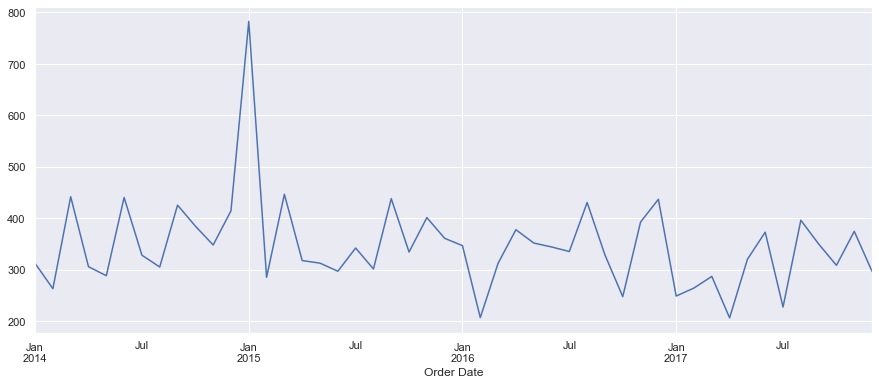

In [139]:
y.plot(figsize=(15, 6))
plt.show()

Some distinguishable patterns appear when we plot the data. The time-series has seasonality pattern, such as sales are always low at the beginning of the year and high at the end of the year. There is always an upward trend within any single year with a couple of low months in the mid of the year.

In [194]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

# Import as Dataframe
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
df.head()

date     value
0 1991-07-01  3.526591
1 1991-08-01  3.180891
2 1991-09-01  3.252221
3 1991-10-01  3.611003
4 1991-11-01  3.565869

In [142]:
ser = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
ser.head()

value
date                
1991-07-01  3.526591
1991-08-01  3.180891
1991-09-01  3.252221
1991-10-01  3.611003
1991-11-01  3.565869

In [143]:
# dataset source: https://github.com/rouseguy
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/MarketArrivals.csv')
df = df.loc[df.market=='MUMBAI', :]
df.head()

market    month  year  quantity  priceMin  priceMax  priceMod state  \
6654  MUMBAI  January  2004    267100       719       971       849    MS   
6655  MUMBAI  January  2005    275845       261       513       387    MS   
6656  MUMBAI  January  2006    228000       315       488       402    MS   
6657  MUMBAI  January  2007    205200       866      1136       997    MS   
6658  MUMBAI  January  2008    267550       348       550       448    MS   

        city          date  
6654  MUMBAI  January-2004  
6655  MUMBAI  January-2005  
6656  MUMBAI  January-2006  
6657  MUMBAI  January-2007  
6658  MUMBAI  January-2008

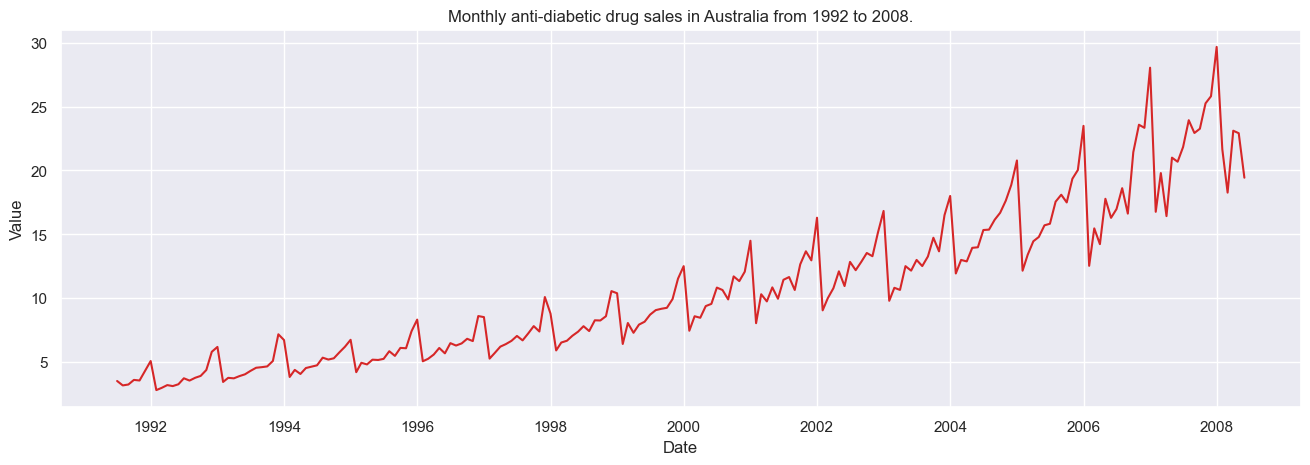

In [236]:
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df.value, title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.') 

In [237]:
df

value
date                 
1991-07-01   3.526591
1991-08-01   3.180891
1991-09-01   3.252221
1991-10-01   3.611003
1991-11-01   3.565869
...               ...
2008-02-01  21.654285
2008-03-01  18.264945
2008-04-01  23.107677
2008-05-01  22.912510
2008-06-01  19.431740

[204 rows x 1 columns]

In [200]:
import datetime as d

In [201]:
# Prepare data
df['year'] = [d.year for d in df.index]
df['month'] = [d.strftime('%b') for d in df.index]
years = df['year'].unique()

In [202]:
df

value  year month
date                             
1991-07-01   3.526591  1991   Jul
1991-08-01   3.180891  1991   Aug
1991-09-01   3.252221  1991   Sep
1991-10-01   3.611003  1991   Oct
1991-11-01   3.565869  1991   Nov
...               ...   ...   ...
2008-02-01  21.654285  2008   Feb
2008-03-01  18.264945  2008   Mar
2008-04-01  23.107677  2008   Apr
2008-05-01  22.912510  2008   May
2008-06-01  19.431740  2008   Jun

[204 rows x 3 columns]

In [153]:
data_frame_month = df.groupby(['year','month'])['value'].sum().to_frame()
data_frame_month

value
year month           
1991 Aug     3.180891
     Dec     4.306371
     Jul     3.526591
     Nov     3.565869
     Oct     3.611003
...               ...
2008 Feb    21.654285
     Jan    29.665356
     Jun    19.431740
     Mar    18.264945
     May    22.912510

[204 rows x 1 columns]

In [155]:
years = df['year'].unique()

In [156]:
years

array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008], dtype=int64)

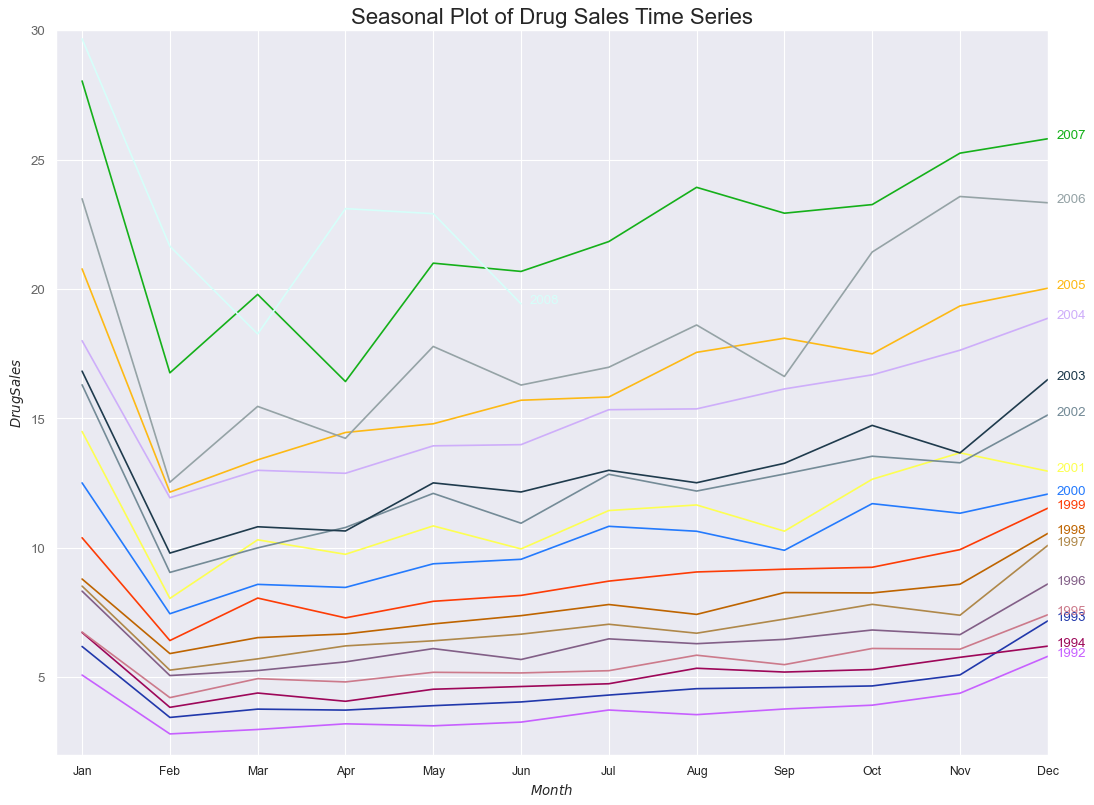

In [157]:
# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'value', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'value'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Drug Sales$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
plt.show()

In [159]:
df.head(5)

value  year month
date                            
1991-07-01  3.526591  1991   Jul
1991-08-01  3.180891  1991   Aug
1991-09-01  3.252221  1991   Sep
1991-10-01  3.611003  1991   Oct
1991-11-01  3.565869  1991   Nov

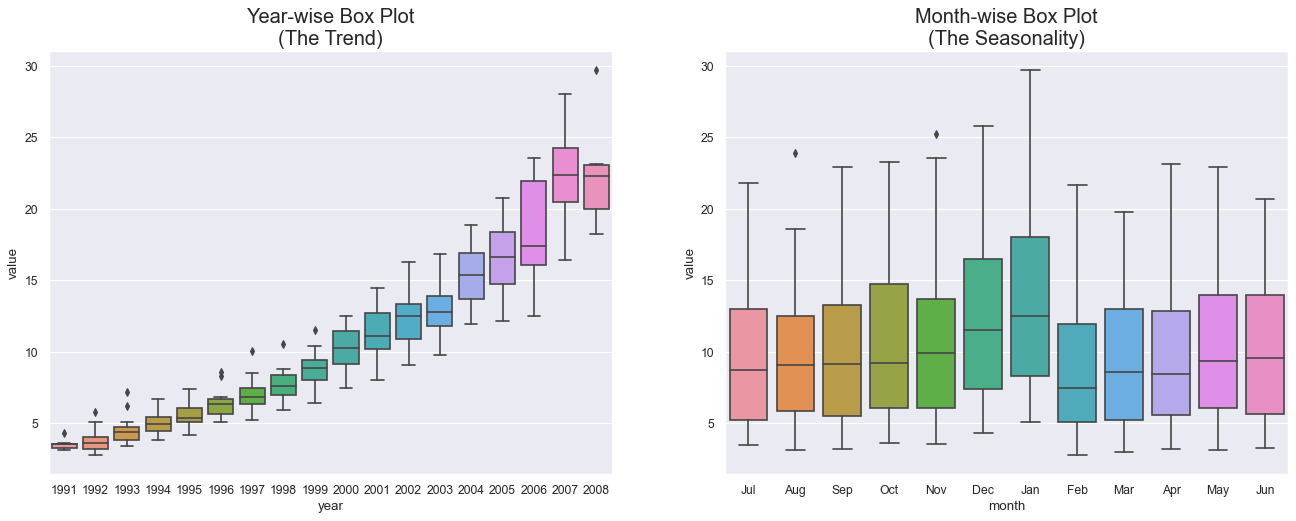

In [160]:
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='value', data=df, ax=axes[0])
sns.boxplot(x='month', y='value', data=df,ax=axes[1])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

There is a steep fall in drug sales every February, rising again in March, falling again in April and so on. Clearly, the pattern repeats within a given year, every year.

However, as years progress, the drug sales increase overall. You can nicely visualize this trend and how it varies each year in a nice year-wise boxplot. Likewise, you can do a month-wise boxplot to visualize the monthly distributions.

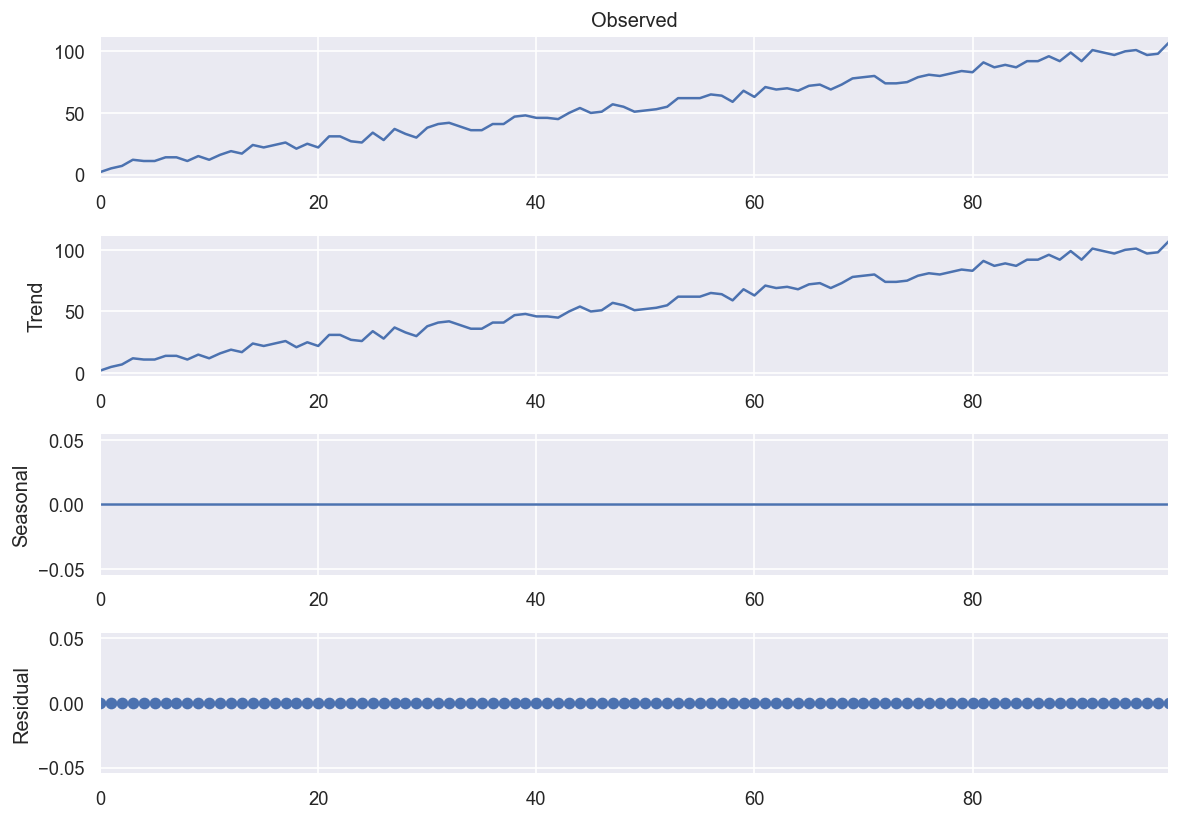

In [161]:
from random import randrange
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = [i+randrange(10) for i in range(1,100)]
result = seasonal_decompose(series, model='additive', period=1)
result.plot()
pyplot.show()

# We can see that the entire series was taken as the trend component and that there was no seasonality.
Thus, meaning that the time series is stationary 

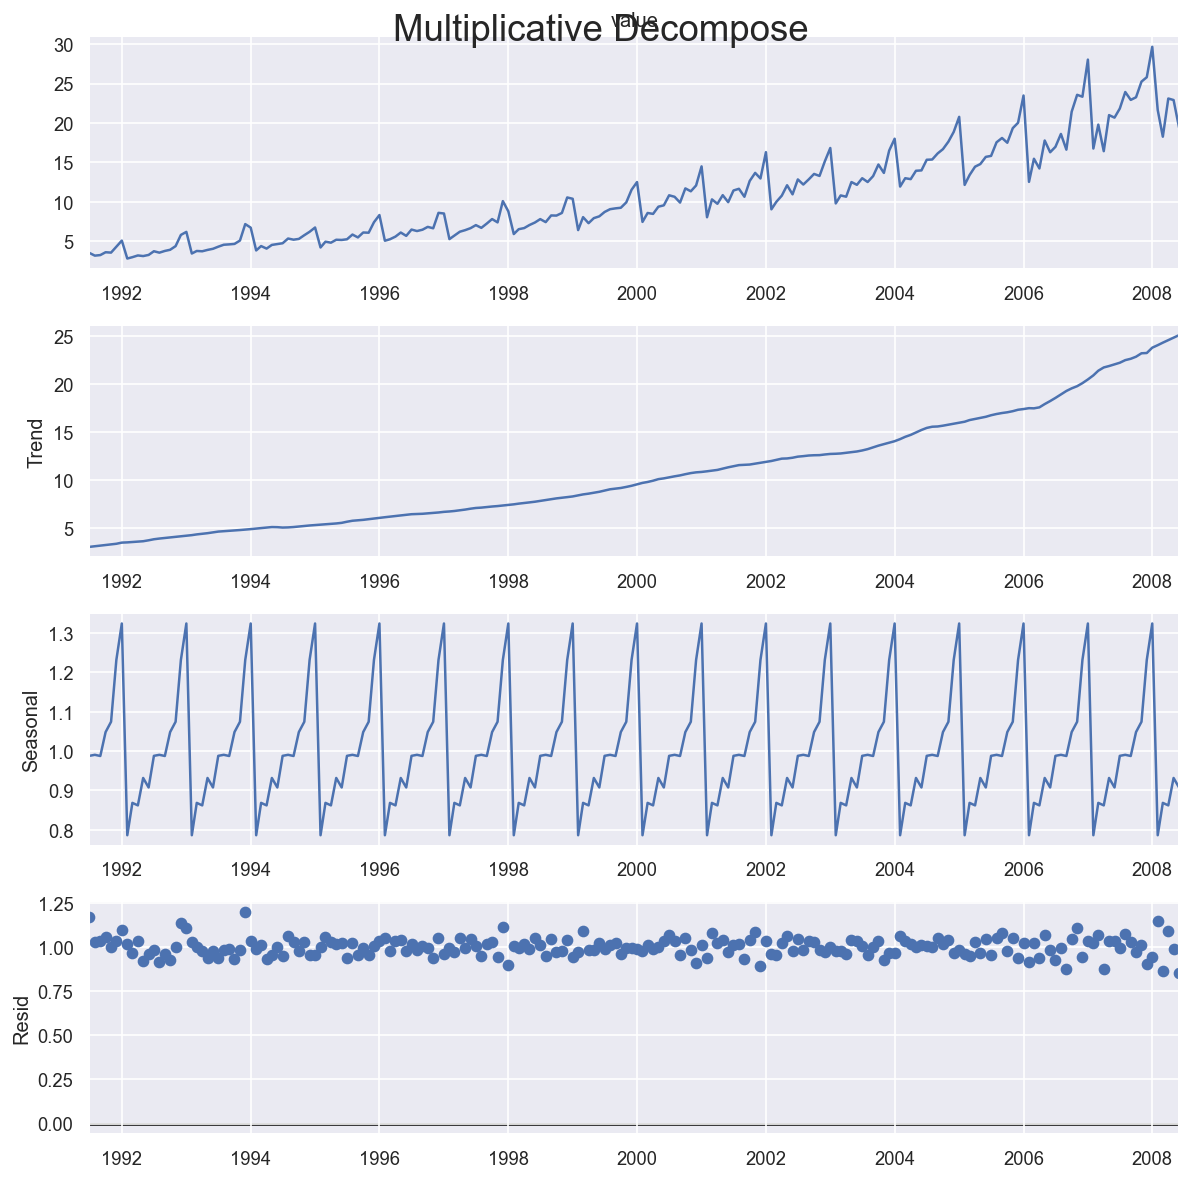

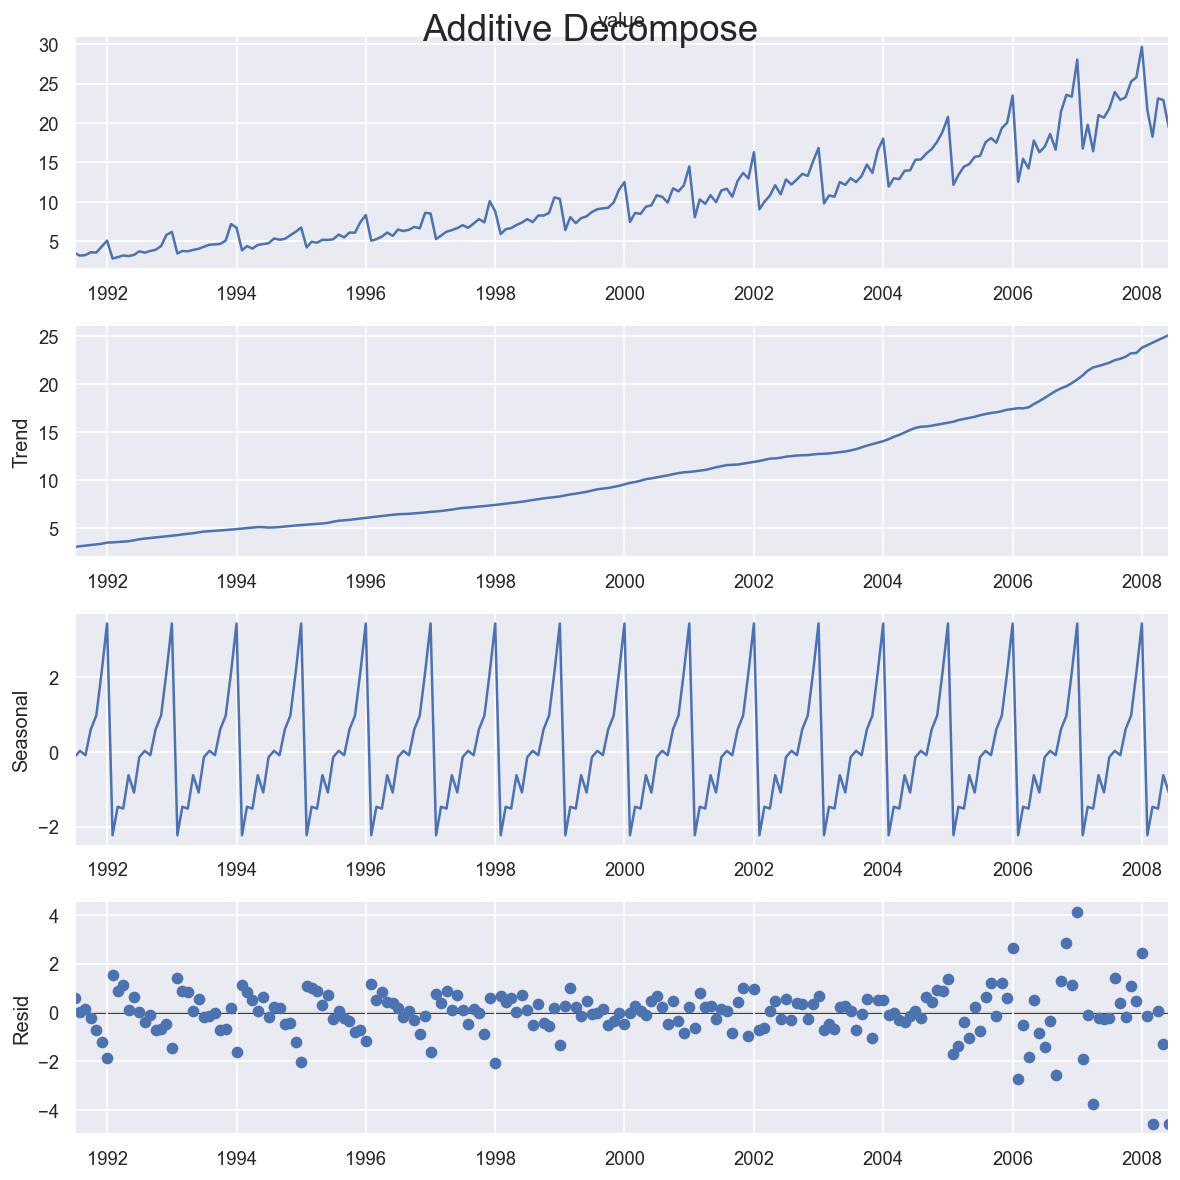

In [165]:
# Multiplicative Decomposition 
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

the first chart in both decompositions is the original values of the time frame. 

# additive tine series model
additive_Tmodel = Trend + seasonality + residual
# we multiply other components to create a multiplicative time series
multiplicative_Tmodel = Trend * seasonality * ignored_residual

In [166]:
# Extract the Components ----
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()

seas     trend     resid  actual_values
date                                                   
1991-07-01  0.987845  3.060085  1.166629       3.526591
1991-08-01  0.990481  3.124765  1.027745       3.180891
1991-09-01  0.987476  3.189445  1.032615       3.252221
1991-10-01  1.048329  3.254125  1.058513       3.611003
1991-11-01  1.074527  3.318805  0.999923       3.565869

In [167]:
actual_values = df_reconstructed['seas']*df_reconstructed['trend']*df_reconstructed['resid']

In [168]:
#values are the same of the actuals. 
actual_values

date
1991-07-01     3.526591
1991-08-01     3.180891
1991-09-01     3.252221
1991-10-01     3.611003
1991-11-01     3.565869
                ...    
2008-02-01    21.654285
2008-03-01    18.264945
2008-04-01    23.107677
2008-05-01    22.912510
2008-06-01    19.431740
Length: 204, dtype: float64

In [169]:
# Extract the Components ----
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed_additive = pd.concat([result_add.seasonal, result_add.trend, result_add.resid, result_add.observed], axis=1)
df_reconstructed_additive.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed_additive.head()

seas     trend     resid  actual_values
date                                                   
1991-07-01 -0.140765  3.060085  0.607271       3.526591
1991-08-01  0.027747  3.124765  0.028379       3.180891
1991-09-01 -0.090361  3.189445  0.153137       3.252221
1991-10-01  0.602876  3.254125 -0.245998       3.611003
1991-11-01  0.970698  3.318805 -0.723634       3.565869

In [172]:
actual_values_additive = df_reconstructed_additive['seas'] + df_reconstructed_additive['trend'] + df_reconstructed_additive['resid']

In [174]:
#values are the same of the actuals. 
actual_values_additive

date
1991-07-01     3.526591
1991-08-01     3.180891
1991-09-01     3.252221
1991-10-01     3.611003
1991-11-01     3.565869
                ...    
2008-02-01    21.654285
2008-03-01    18.264945
2008-04-01    23.107677
2008-05-01    22.912510
2008-06-01    19.431740
Length: 204, dtype: float64

Stationary and Non-Stationary Time Series
Stationarity is a property of a time series. A stationary series is one where the values of the series is not a function of time.

That is, the statistical properties of the series like mean, variance and autocorrelation are constant over time. Autocorrelation of the series is nothing but the correlation of the series with its previous values, more on this coming up.

A stationary time series does not have seasonal effects as well.Not residuals. 

I will come to that in a bit, but understand that it is possible to make nearly any time series stationary by applying a suitable transformation. Most statistical forecasting methods are designed to work on a stationary time series. The first step in the forecasting process is typically to do some transformation to convert a non-stationary series to stationary.

Why make a non-stationary series stationary before forecasting?
Forecasting a stationary series is relatively easy and the forecasts are more reliable.

An important reason is, autoregressive forecasting models are essentially linear regression models that utilize the lag(s) of the series itself as predictors.

We know that linear regression works best if the predictors (X variables) are not correlated against each other. So, stationarizing the series solves this problem since it removes any persistent autocorrelation, thereby making the predictors(lags of the series) in the forecasting models nearly independent.

A linear regression model describes the relationship between a dependent variable, y, and one or more independent variables, X. The dependent variable is also called the response variable. Independent variables are also called explanatory or predictor variables.

Nevertheless, you need a method to quantitatively determine if a given series is stationary or not.

Nevertheless, you need a method to quantitatively determine if a given series is stationary or not. This can be done using statistical tests called ‘Unit Root Tests’. There are multiple variations of this, where the tests check if a time series is non-stationary and possess a unit root.

If there are unit roots, the series is not stationary.

There are multiple implementations of Unit Root tests like:

Augmented Dickey Fuller test (ADH Test)

The most commonly used is the ADF test, where the null hypothesis is the time series possesses a unit root and is non-stationary. So, if the P-Value in ADF test is less than the significance level (0.05), you reject the null hypothesis,
.meaning that it is stationary. 

In [175]:
from statsmodels.tsa.stattools import adfuller, kpss

In [176]:
# ADF Test
result = adfuller(df.value.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: 3.1451856893067394
p-value: 1.0
Critial Values:
   1%, -3.465620397124192
Critial Values:
   5%, -2.8770397560752436
Critial Values:
   10%, -2.5750324547306476


We can see that our data is not stationary from the fact that our p-value is greater than 5 percent and the test statistic is greater than the critical value. We can also draw these conclusions from inspecting the data, as we see a clear, increasing trend in the number of drugs sa;es through the years. .

In [177]:
df

value  year month
date                             
1991-07-01   3.526591  1991   Jul
1991-08-01   3.180891  1991   Aug
1991-09-01   3.252221  1991   Sep
1991-10-01   3.611003  1991   Oct
1991-11-01   3.565869  1991   Nov
...               ...   ...   ...
2008-02-01  21.654285  2008   Feb
2008-03-01  18.264945  2008   Mar
2008-04-01  23.107677  2008   Apr
2008-05-01  22.912510  2008   May
2008-06-01  19.431740  2008   Jun

[204 rows x 3 columns]

How to detrend a time series? Detrending a time series is to remove the trend component from a time series.
Subtract the trend component obtained from time series decomposition we saw earlier.

In [178]:
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

In [179]:
result_mul

In [180]:
detrended = df.value - result_mul.trend

In [181]:
detrended

date
1991-07-01    0.466506
1991-08-01    0.056126
1991-09-01    0.062776
1991-10-01    0.356878
1991-11-01    0.247064
                ...   
2008-02-01   -2.383114
2008-03-01   -6.033513
2008-04-01   -1.451839
2008-05-01   -1.908064
2008-06-01   -5.649893
Length: 204, dtype: float64

Text(0.5, 1.0, 'Drug Sales detrended by subtracting the trend component')

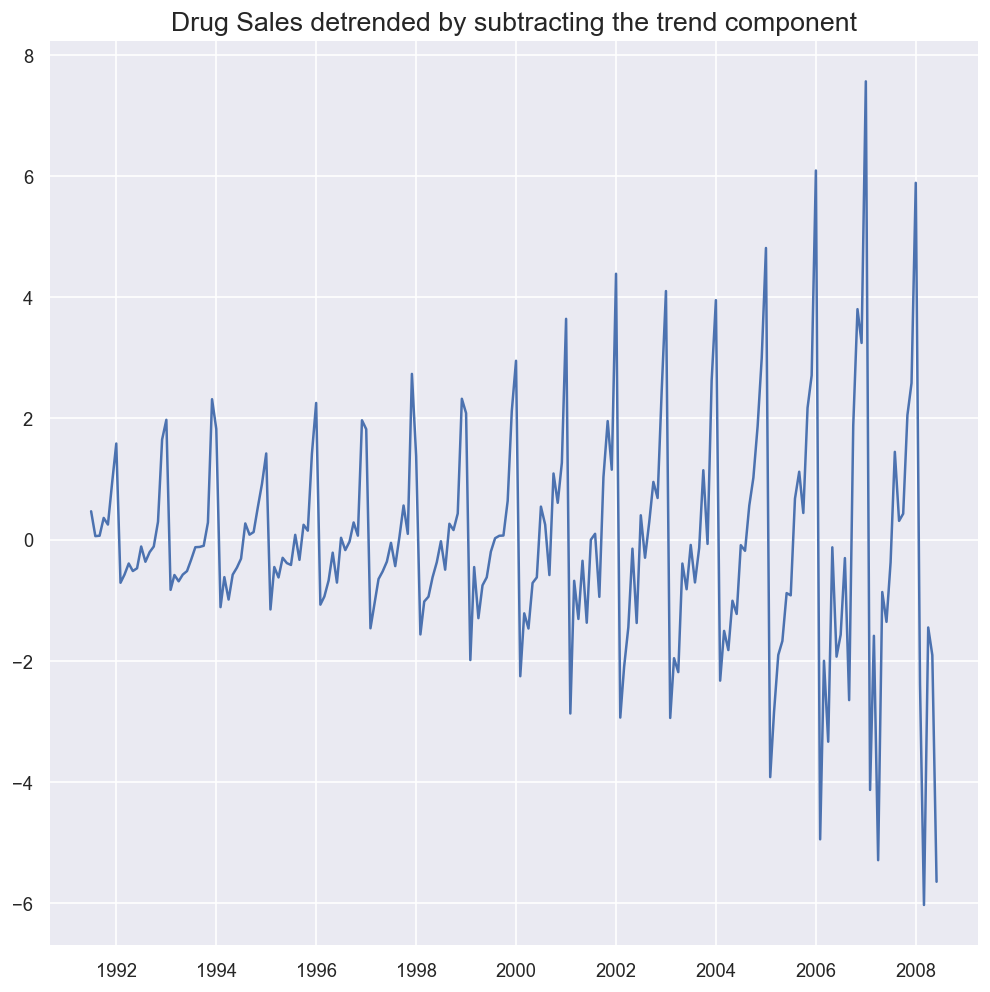

In [182]:
plt.plot(detrended)
plt.title('Drug Sales detrended by subtracting the trend component', fontsize=16)

[]

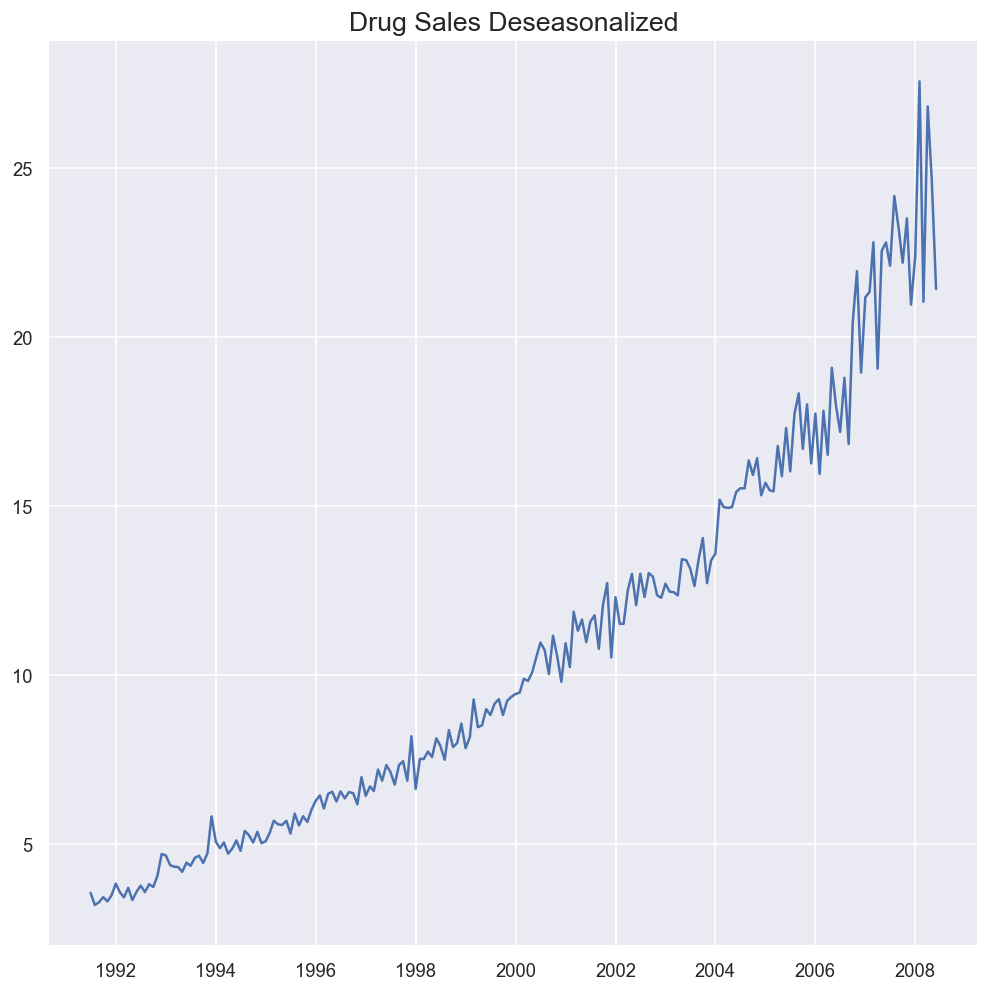

In [185]:
#How to deseasonalize a time series?
#Divide the series by the seasonal index obtained from STL decomposition
# Deseasonalize
deseasonalized = df.value / result_mul.seasonal

# Plot
plt.plot(deseasonalized)
plt.title('Drug Sales Deseasonalized', fontsize=16)
plt.plot()

How to test for seasonality of a time series?
The common way is to plot the series and check for repeatable patterns in fixed time intervals. So, the types of seasonality is determined by the clock or the calendar:

Hour of day
Day of month
Weekly
Monthly
Yearly

For example, the drug sales time series is a monthly series with patterns repeating every year. So, you can see spikes at 12th, 24th, 36th.. lines.

What is ACF plot ?

A time series is a sequence of measurements of the same variable(s) made over time. Usually, the measurements are made at evenly spaced times — for example, monthly or yearly. The coefficient of correlation between two values in a time series is called the autocorrelation function (ACF). In other words,

>Autocorrelation represents the degree of similarity between a given time series and a lagged version of itself over successive time intervals.

In [190]:
#Step 2 - Setting up the Data
#We have created a dataset by making features and assining values to them. We have used date_range function to create a datetime dataset with frequency as Weekly.
df = pd.DataFrame()

df["dates"] = pd.date_range("11/11/2016", periods=5, freq="W")
df["stock_price"] = [1.1,2.2,3.3,4.4,5.5]
#Step 3 - Creating Lag in data
#For better understanding we are first creating a lag of 1 unit and then a lag of 2 unit. We cah do this by shift function.

df["previous_days_stock_price"] = df["stock_price"].shift(1)
print(df)

df["previous_days_stock_price"] = df["stock_price"].shift(2)
print(df) 

       dates  stock_price  previous_days_stock_price
0 2016-11-13          1.1                        NaN
1 2016-11-20          2.2                        1.1
2 2016-11-27          3.3                        2.2
3 2016-12-04          4.4                        3.3
4 2016-12-11          5.5                        4.4
       dates  stock_price  previous_days_stock_price
0 2016-11-13          1.1                        NaN
1 2016-11-20          2.2                        NaN
2 2016-11-27          3.3                        1.1
3 2016-12-04          4.4                        2.2
4 2016-12-11          5.5                        3.3


The autocorrelation function (ACF) shows correlations for several lags (of order 2, 3, 4, etc.) in addition to the lag of order 1 just illustrated.

This value of k is the time gap being considered and is called the lag. A lag 1 autocorrelation (i.e., k = 1 in the above) is the correlation between values that are one time period apart. More generally, a lag k autocorrelation is the correlation between values that are k time periods apart.

One set of observations in a time series is plotted (lagged) against a second, later set of data. The kth lag is the time period that happened “k” time points before time i. For example:
Lag1(Y2) = Y1 and Lag4(Y9) = Y5.
The most commonly used lag is 1, called a first-order lag plot.

In [191]:
x = [78, 74, 68, 76, 80, 84, 50, 93, 55, 76, 58, 74, 75, 80, 56, 80, 69, 57,
      90, 42, 91, 51, 79, 53, 82, 51, 76, 82, 84, 53, 86, 51, 85, 45, 88, 51,
      80, 49, 82, 75, 73, 67, 68, 86, 72, 75, 75, 66, 84, 70, 79, 60, 86, 71,
      67, 81, 76, 83, 76, 55, 73, 56, 83, 57, 71, 72, 77, 55, 75, 73, 70, 83,
      50, 95, 51, 82, 54, 83, 51, 80, 78, 81, 53, 89, 44, 78, 61, 73, 75, 73,
      76, 55, 86, 48, 77, 73, 70, 88, 75, 83, 61, 78, 61, 81, 51, 80, 79]

In [192]:
#this is a lag one example and they have the same lenght. 
x1 = x[1:106] 
x2 = x[2:107]

In [193]:
len(x1)
len(x2)

105

Autocorrelation represents the degree of similarity between a given time series and a lagged version of itself over successive time intervals.

>Autocorrelation measures the relationship between a variable’s current value and its past values.

>An autocorrelation of +1 represents a perfect positive correlation, while an autocorrelation of negative 1 represents a perfect negative correlation.

; One set of observations in a time series is plotted (lagged) against a second, later set of data. The kth lag is the time period that happened “k” time points before time i. For example:
Lag1(Y2) = Y1 and Lag4(Y9) = Y5.

Why useful ?

Help us uncover hidden patterns in our data and help us select the correct forecasting methods.
Help identify seasonality in our time series data.
Analyzing the autocorrelation function (ACF) and partial autocorrelation function (PACF) in conjunction is necessary for selecting the appropriate ARIMA model for any time series prediction.

Any assumption made by ACF ?

Weak stationary — meaning no systematic change in the mean, variance, and no systematic fluctuation.

So when performing ACF it is advisable to remove any trend present in the data and to make sure the data is stationary.

In [204]:
df

value  year month
date                             
1991-07-01   3.526591  1991   Jul
1991-08-01   3.180891  1991   Aug
1991-09-01   3.252221  1991   Sep
1991-10-01   3.611003  1991   Oct
1991-11-01   3.565869  1991   Nov
...               ...   ...   ...
2008-02-01  21.654285  2008   Feb
2008-03-01  18.264945  2008   Mar
2008-04-01  23.107677  2008   Apr
2008-05-01  22.912510  2008   May
2008-06-01  19.431740  2008   Jun

[204 rows x 3 columns]

In [205]:
#acf -> remove trend 
df["diff"] = df['value'].diff()

In [206]:
df

value  year month      diff
date                                       
1991-07-01   3.526591  1991   Jul       NaN
1991-08-01   3.180891  1991   Aug -0.345700
1991-09-01   3.252221  1991   Sep  0.071330
1991-10-01   3.611003  1991   Oct  0.358782
1991-11-01   3.565869  1991   Nov -0.045134
...               ...   ...   ...       ...
2008-02-01  21.654285  2008   Feb -8.011071
2008-03-01  18.264945  2008   Mar -3.389340
2008-04-01  23.107677  2008   Apr  4.842732
2008-05-01  22.912510  2008   May -0.195167
2008-06-01  19.431740  2008   Jun -3.480770

[204 rows x 4 columns]

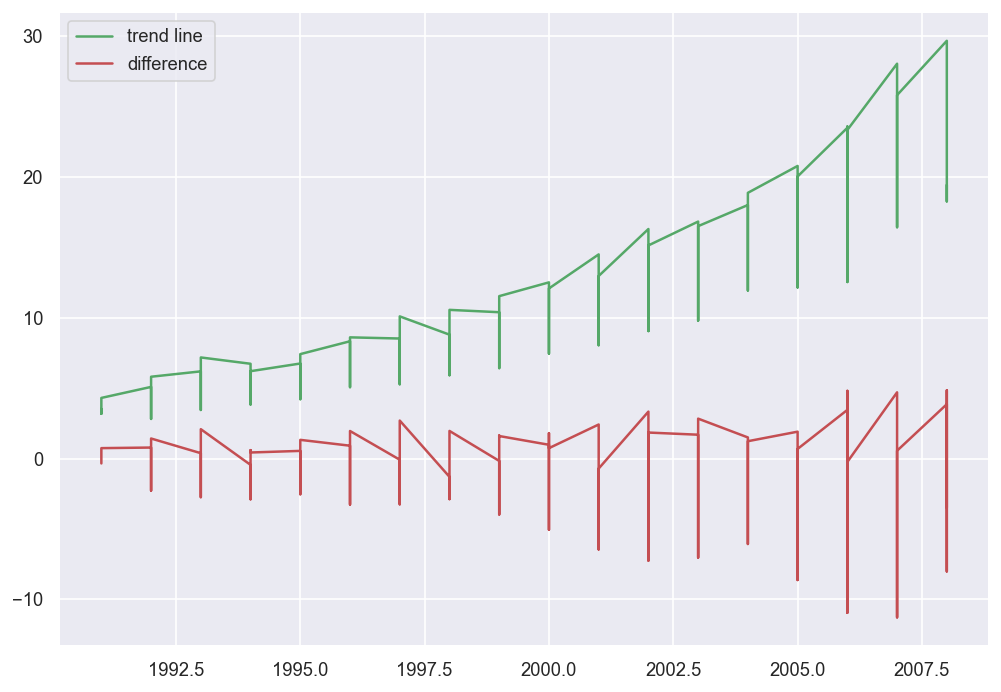

In [207]:
import matplotlib.pyplot as plt

# Plot a simple line chart
plt.plot(df['year'], df['value'], color='g', label='trend line')

# Plot another line on the same chart/graph
plt.plot(df['year'], df['diff'], color='r', label='difference')

plt.legend()
plt.show()

In [211]:
from pandas.plotting import autocorrelation_plot

(0.0, 200.0)

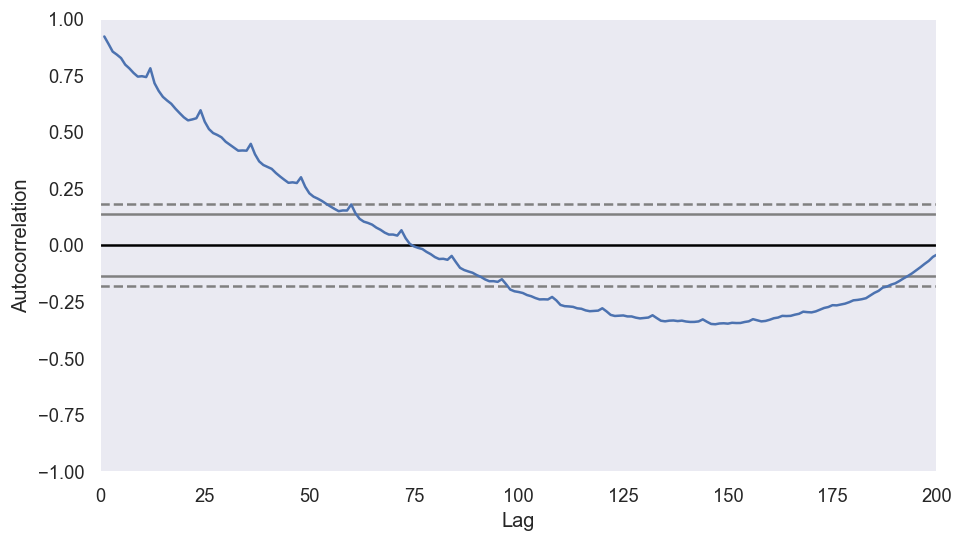

In [215]:
# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(df.value.tolist()).set_xlim([0, 200])

#we can see here that across time the data is no correlated. 

# How to treat missing values in a time series?

Sometimes, your time series will have missing dates/times. That means, the data was not captured or was not available for those periods. It could so happen the measurement was zero on those days, in which case, case you may fill up those periods with zero.

Secondly, when it comes to time series, you should typically NOT replace missing values with the mean of the series, especially if the series is not stationary. What you could do instead for a quick and dirty workaround is to forward-fill the previous value. Because the mean is not a good representation since it has pick values and high std.

In [289]:
# # Generate dataset
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error
df_orig = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date').head(100)
#df = pd.read_csv('datasets/a10_missings.csv', parse_dates=['date'], index_col='date')

In [290]:
df_orig

value
date                
1991-07-01  3.526591
1991-08-01  3.180891
1991-09-01  3.252221
1991-10-01  3.611003
1991-11-01  3.565869
...              ...
1999-06-01  8.165323
1999-07-01  8.717420
1999-08-01  9.070964
1999-09-01  9.177113
1999-10-01  9.251887

[100 rows x 1 columns]

In [291]:
import random
ix = [(row, col) for row in range(df_orig.shape[0]) for col in range(df_orig.shape[1])]
for row, col in random.sample(ix, int(round(.2*len(ix)))):
    df_orig.iat[row, col] = np.nan

In [292]:
#27 null values
df_orig.isna().sum() 

value    20
dtype: int64

In [293]:
df

value
date                 
1991-07-01   3.526591
1991-08-01   3.180891
1991-09-01   3.252221
1991-10-01   3.611003
1991-11-01   3.565869
...               ...
2008-02-01  21.654285
2008-03-01  18.264945
2008-04-01  23.107677
2008-05-01  22.912510
2008-06-01  19.431740

[204 rows x 1 columns]

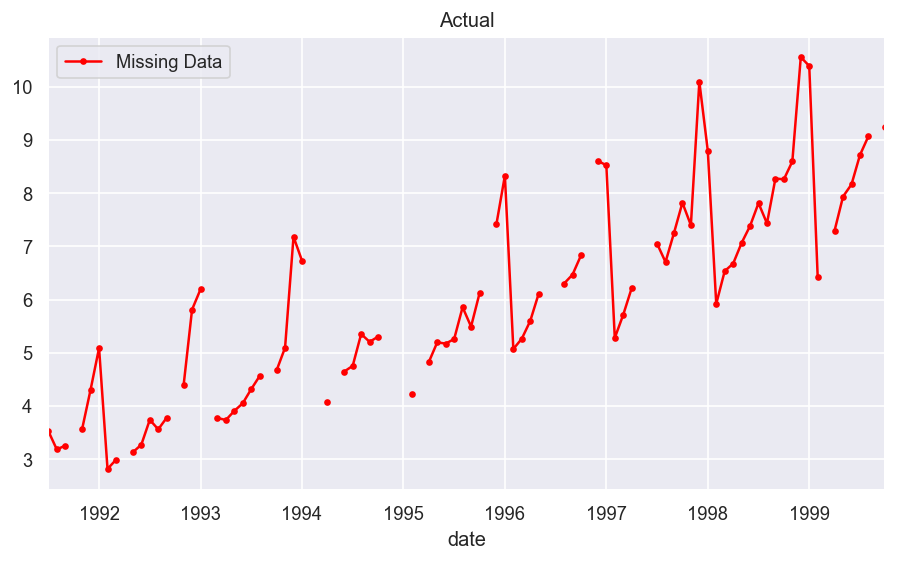

In [295]:
plt.rcParams.update({'xtick.bottom' : False})
## 1. Actual -------------------------------
df_orig.plot(title='Actual', label='Actual', color='red', style=".-")
plt.legend(["Missing Data"])

In [298]:
df.isna().sum() 

value    0
dtype: int64

When ffill() is applied across the index then any missing value is filled based on the corresponding value in the previous row.
 

In [239]:
df_ffill = df_orig.ffill()

In [240]:
df_ffill

value
date                
1991-07-01  3.526591
1991-08-01  3.180891
1991-09-01  3.252221
1991-10-01  3.611003
1991-11-01  3.565869
...              ...
1999-06-01  8.165323
1999-07-01  8.717420
1999-08-01  9.070964
1999-09-01  9.177113
1999-10-01  9.251887

[100 rows x 1 columns]

axis=1 (or axis='columns') is vertical axis
axis = 0 is row is horizontal axis. 

In [244]:
#removes the 27 null values with previous value. 
df_ffill.isna().sum() 

value    0
dtype: int64

In [245]:
df_orig[df_orig['value'].isnull()].index.tolist()

[Timestamp('1991-12-01 00:00:00'),
 Timestamp('1992-07-01 00:00:00'),
 Timestamp('1993-03-01 00:00:00'),
 Timestamp('1993-05-01 00:00:00'),
 Timestamp('1993-10-01 00:00:00'),
 Timestamp('1993-11-01 00:00:00'),
 Timestamp('1993-12-01 00:00:00'),
 Timestamp('1994-03-01 00:00:00'),
 Timestamp('1994-04-01 00:00:00'),
 Timestamp('1994-05-01 00:00:00'),
 Timestamp('1994-11-01 00:00:00'),
 Timestamp('1995-01-01 00:00:00'),
 Timestamp('1995-02-01 00:00:00'),
 Timestamp('1995-03-01 00:00:00'),
 Timestamp('1995-04-01 00:00:00'),
 Timestamp('1995-09-01 00:00:00'),
 Timestamp('1995-12-01 00:00:00'),
 Timestamp('1996-10-01 00:00:00'),
 Timestamp('1997-04-01 00:00:00'),
 Timestamp('1997-06-01 00:00:00'),
 Timestamp('1997-07-01 00:00:00'),
 Timestamp('1997-10-01 00:00:00'),
 Timestamp('1997-12-01 00:00:00'),
 Timestamp('1998-06-01 00:00:00'),
 Timestamp('1998-09-01 00:00:00'),
 Timestamp('1998-10-01 00:00:00'),
 Timestamp('1999-03-01 00:00:00')]

In [254]:
#A couple of samples of Nan values. 
df_orig.loc[['1993-03-01 00:00:00',
 '1993-05-01 00:00:00',
 '1993-10-01 00:00:00',
 '1993-11-01 00:00:00',
 '1993-12-01 00:00:00',
 '1994-03-01 00:00:00',
 '1994-04-01 00:00:00',
 '1994-05-01 00:00:00',
 '1994-11-01 00:00:00',
 '1995-01-01 00:00:00'
]]

value
date             
1993-03-01    NaN
1993-05-01    NaN
1993-10-01    NaN
1993-11-01    NaN
1993-12-01    NaN
1994-03-01    NaN
1994-04-01    NaN
1994-05-01    NaN
1994-11-01    NaN
1995-01-01    NaN

In [255]:
df_ffill.loc[['1993-03-01 00:00:00',
 '1993-05-01 00:00:00',
 '1993-10-01 00:00:00',
 '1993-11-01 00:00:00',
 '1993-12-01 00:00:00',
 '1994-03-01 00:00:00',
 '1994-04-01 00:00:00',
 '1994-05-01 00:00:00',
 '1994-11-01 00:00:00',
 '1995-01-01 00:00:00'
]]

value
date                
1993-03-01  3.450857
1993-05-01  3.734303
1993-10-01  4.608662
1993-11-01  4.608662
1993-12-01  4.608662
1994-03-01  3.841278
1994-04-01  3.841278
1994-05-01  3.841278
1994-11-01  5.301651
1995-01-01  6.204593

the previous value in df_orig was used to fill the nan values in the df_ffill table. 

In [256]:
df_orig.loc[['1993-02-01 00:00:00',
 '1993-04-01 00:00:00',
 '1993-09-01 00:00:00',
 '1993-10-01 00:00:00',
 '1993-11-01 00:00:00',
 '1994-02-01 00:00:00',
 '1994-03-01 00:00:00',
 '1994-04-01 00:00:00',
 '1994-10-01 00:00:00',
 '1994-12-01 00:00:00']]

value
date                
1993-02-01  3.450857
1993-04-01  3.734303
1993-09-01  4.608662
1993-10-01       NaN
1993-11-01       NaN
1994-02-01  3.841278
1994-03-01       NaN
1994-04-01       NaN
1994-10-01  5.301651
1994-12-01  6.204593

<AxesSubplot:title={'center':'Forward Fill'}, xlabel='date'>

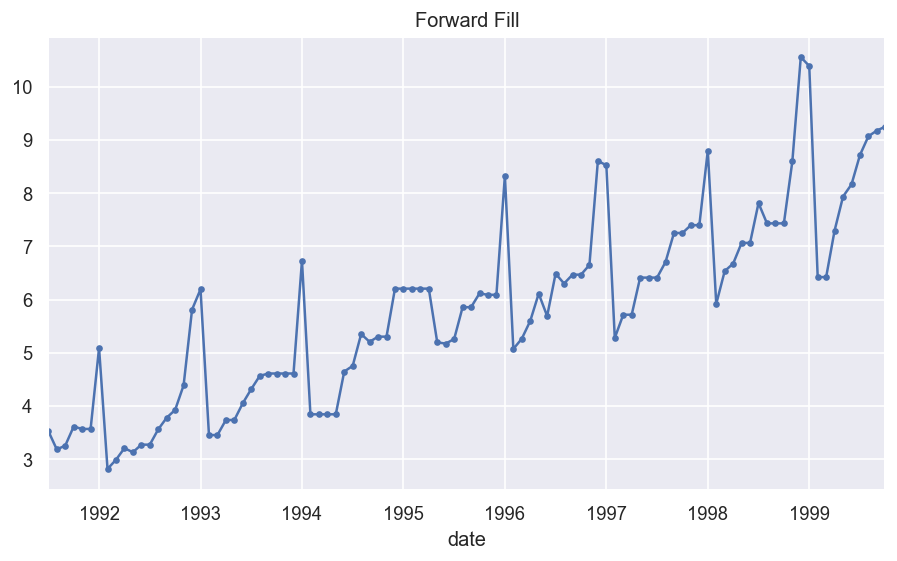

In [257]:
df_ffill['value'].plot(title='Forward Fill', label='Forward Fill', style=".-")

In [258]:
## 3. Backward Fill
#the next value in df_orig was used to fill the nan values in the df_ffill table.
df_bfill = df_orig.bfill()

In [265]:
df_orig

value
date                
1991-07-01  3.526591
1991-08-01  3.180891
1991-09-01  3.252221
1991-10-01  3.611003
1991-11-01  3.565869
...              ...
1999-06-01  8.165323
1999-07-01  8.717420
1999-08-01  9.070964
1999-09-01  9.177113
1999-10-01  9.251887

[100 rows x 1 columns]

In [259]:
df_bfill.isna().sum() 

value    0
dtype: int64

<AxesSubplot:title={'center':'Backrward Fill'}, xlabel='date'>

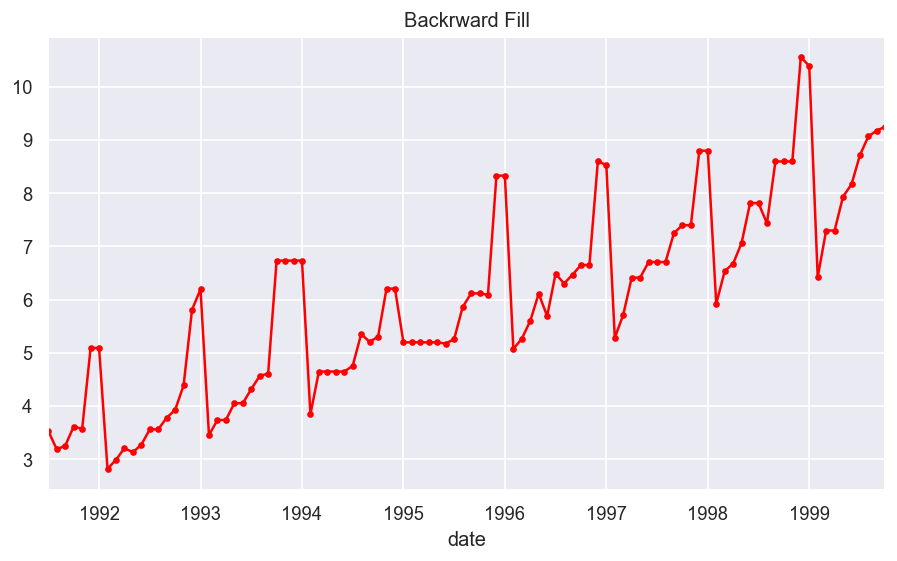

In [287]:
df_bfill['value'].plot(title='Backrward Fill', label='Forward Fill',color='red', style=".-")

<AxesSubplot:xlabel='date'>

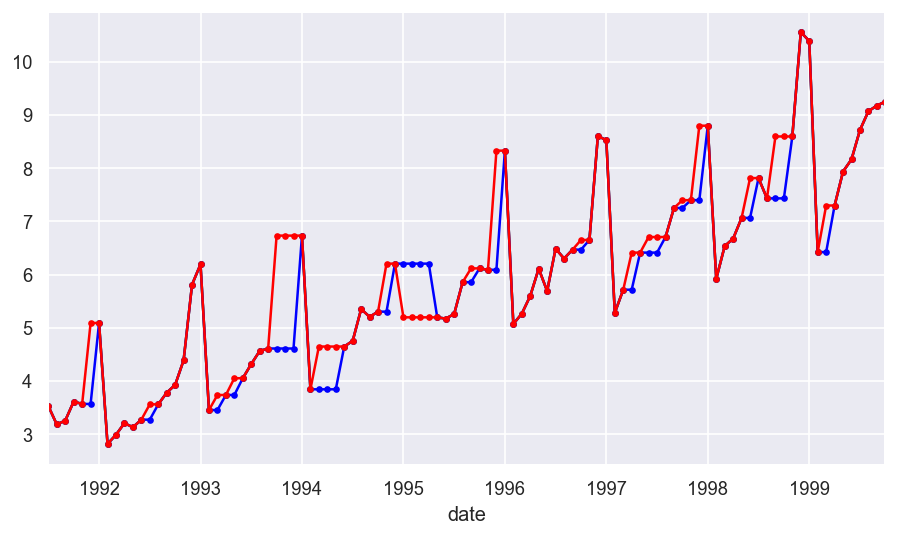

In [269]:
df_orig['value'].plot( label='Actual', color='green', style=".-")
df_ffill['value'].plot( label='Forward Fill',color='blue', style=".-")
df_bfill['value'].plot(label='Backward Fill',color='red', style=".-")

In [270]:
df_orig['rownum'] = np.arange(df_orig.shape[0])

In [271]:
df_orig['rownum']

date
1991-07-01     0
1991-08-01     1
1991-09-01     2
1991-10-01     3
1991-11-01     4
              ..
1999-06-01    95
1999-07-01    96
1999-08-01    97
1999-09-01    98
1999-10-01    99
Name: rownum, Length: 100, dtype: int32

In [280]:
df_nona = df_orig.dropna(subset = ['value'])

In [281]:
df_nona

value  rownum
date                        
1991-07-01  3.526591       0
1991-08-01  3.180891       1
1991-09-01  3.252221       2
1991-10-01  3.611003       3
1991-11-01  3.565869       4
...              ...     ...
1999-06-01  8.165323      95
1999-07-01  8.717420      96
1999-08-01  9.070964      97
1999-09-01  9.177113      98
1999-10-01  9.251887      99

[73 rows x 2 columns]

In [274]:
from scipy.interpolate import interp1d

In [283]:
f = interp1d(df_nona['rownum'], df_nona['value'])
df_orig['linear_fill'] = f(df_orig['rownum'])

In [284]:
f

In [285]:
df_orig

value  rownum  linear_fill
date                                     
1991-07-01  3.526591       0     3.526591
1991-08-01  3.180891       1     3.180891
1991-09-01  3.252221       2     3.252221
1991-10-01  3.611003       3     3.611003
1991-11-01  3.565869       4     3.565869
...              ...     ...          ...
1999-06-01  8.165323      95     8.165323
1999-07-01  8.717420      96     8.717420
1999-08-01  9.070964      97     9.070964
1999-09-01  9.177113      98     9.177113
1999-10-01  9.251887      99     9.251887

[100 rows x 3 columns]

<AxesSubplot:xlabel='date'>

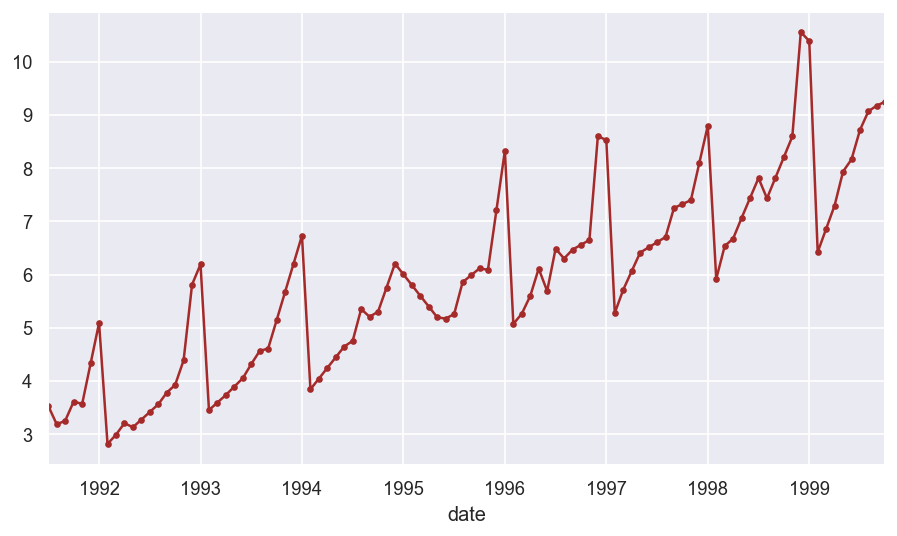

In [286]:
df_orig['linear_fill'].plot(label='Cubic Fill', color='brown', style=".-")

# What is autocorrelation and partial autocorrelation functions?

Autocorrelation is simply the correlation of a series with its own lags. If a series is significantly autocorrelated, that means, the previous values of the series (lags) may be helpful in predicting the current value.

Partial Autocorrelation also conveys similar information but it conveys the pure correlation of a series and its lag, excluding the correlation contributions from the intermediate lags.

Lag – the number of previous observations measured during autocorrelation.

# The partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags.

https://www.r-bloggers.com/2022/11/autocorrelation-and-partial-autocorrelation-in-time-series/

We remember:

Autocorrelation is a calculation of the correlation of the time series observations with values of the same series, but at previous times.

But also, we remember:

Partial Autocorrelation, on the other hand, summarizes the relationship between an observation in a time series with observations at previous time steps, but with the relationships of intervening observations removed.

Essentially, the indirect correlations are removed.

In [299]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [360]:
from statsmodels.graphics import utils
from statsmodels.tsa.stattools import acf, pacf

In [361]:
#Calculate ACF and PACF upto 50 lags
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')
acf_50 = acf(df.value, nlags=50)
pacf_50 = pacf(df.value, nlags=50)

C:\Users\Admin\anacondalastone\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  nlags = int_like(nlags, "nlags", optional=True)


In [355]:
df

date      value
0    1991-07-01   3.526591
1    1991-08-01   3.180891
2    1991-09-01   3.252221
3    1991-10-01   3.611003
4    1991-11-01   3.565869
..          ...        ...
199  2008-02-01  21.654285
200  2008-03-01  18.264945
201  2008-04-01  23.107677
202  2008-05-01  22.912510
203  2008-06-01  19.431740

[204 rows x 2 columns]

In [334]:
acf_50

array([1.        , 0.92056815, 0.88782519, 0.85385862, 0.84052841,
       0.82523769, 0.79629658, 0.77950157, 0.75953251, 0.74337588,
       0.74521347, 0.74134847, 0.78031252, 0.71424686, 0.68014097,
       0.65401657, 0.63791893, 0.62349882, 0.60171747, 0.58230335,
       0.5638103 , 0.5502367 , 0.55428812, 0.55963579, 0.5948865 ,
       0.5443742 , 0.5118496 , 0.49425977, 0.48585482, 0.47551253,
       0.45600656, 0.44259219, 0.42927946, 0.416305  , 0.4173017 ,
       0.41648248, 0.44663227, 0.40084543, 0.36925858, 0.35321116,
       0.34468629, 0.33615309, 0.31790639, 0.30248802, 0.2882186 ,
       0.27463544, 0.2766393 , 0.27364256, 0.29913888, 0.25730382,
       0.22818248])

In [386]:
len(acf_50)

51

In [302]:
pacf_50

array([ 1.00000000e+00,  9.25102966e-01,  2.82971065e-01,  7.59757971e-02,
        1.69214944e-01,  9.37032442e-02, -6.39607472e-02,  5.60043953e-02,
        1.65088238e-02,  4.31903979e-03,  1.74967636e-01,  8.74246693e-02,
        4.16356229e-01, -6.36840131e-01, -1.52234343e-01,  1.03379843e-01,
       -1.02461781e-01,  4.61991378e-02,  2.63314924e-01, -6.44713103e-02,
       -5.88150504e-02,  7.18477473e-02,  6.52357282e-03,  1.94410602e-01,
        5.96935698e-02, -2.75013916e-01, -1.10330820e-01, -5.23647025e-03,
        1.21708235e-03,  1.14826528e-01,  2.18683852e-02,  1.80436567e-01,
       -4.87618188e-03, -3.12812503e-01,  2.39224023e-02, -5.86982507e-02,
        1.78474579e-02, -7.61815956e-05,  3.48972938e-03,  3.86317225e-03,
       -1.91787026e-02, -5.82733093e-02,  1.42072333e-01, -1.30588071e-02,
       -6.90301347e-02,  4.26762561e-02, -1.44399709e-01, -7.14207122e-02,
        1.23701557e-01, -1.90520541e-01,  1.43439287e-01])

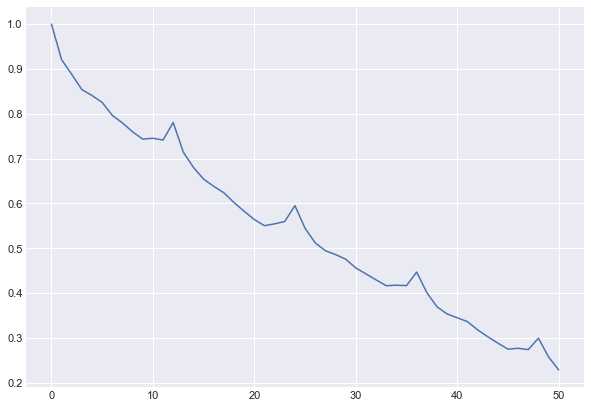

In [363]:
plt.plot(acf_50)

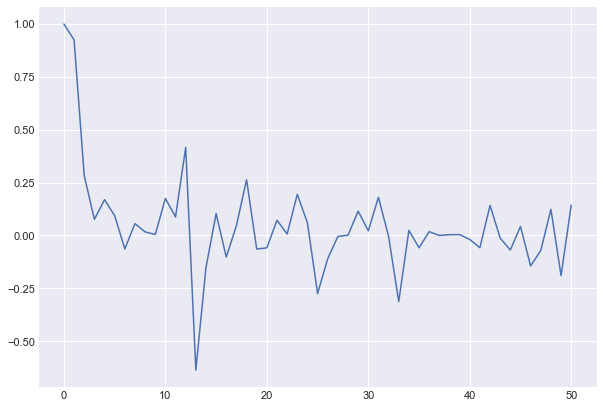

In [374]:
plt.plot(pacf_50)

In [378]:
import matplotlib.pyplot as plt

In [383]:
import numpy

In [388]:
lags_50 = numpy.arange(51)
lags_50

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

<BarContainer object of 51 artists>

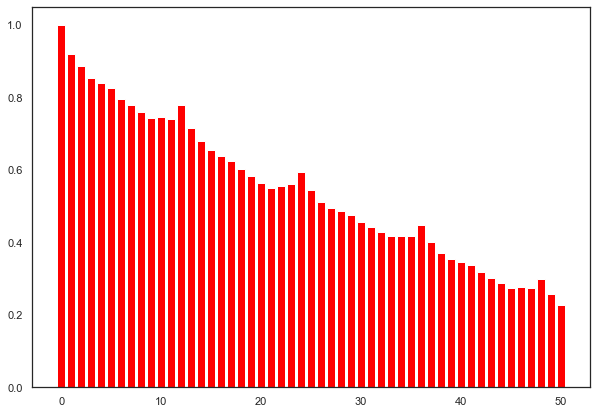

<BarContainer object of 51 artists>

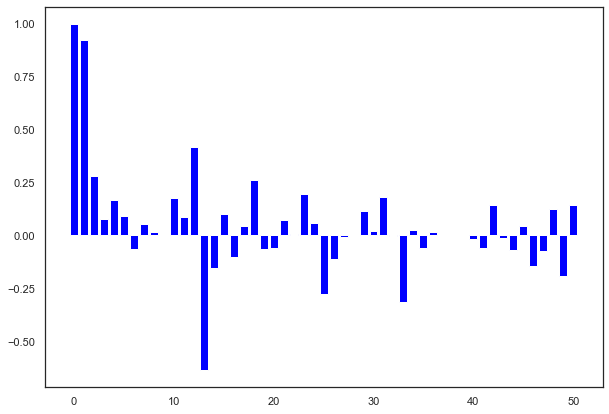

In [390]:
pyplot.bar(lags_50,pacf_50, color = 'blue' )

In [335]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

In [340]:
!pip install statsmodels as sm

ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


In [391]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
series = read_csv('C:/Users/Admin/Machine Learning chapter 5/Temperature.csv', header=0, index_col=0)
series

Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8
...          ...
1990-12-27  14.0
1990-12-28  13.6
1990-12-29  13.5
1990-12-30  15.7
1990-12-31  13.0

[3650 rows x 1 columns]

In [333]:
series['Temp'].isna().sum() 

0

In [590]:
# Import yfinance
import yfinance as yf

# Import pandas
import pandas as pd

# Download the datafile from yfinance
data = yf.download("JPM", start="2019-01-02", end="2020-04-30")[['Close']]
data.index = pd.to_datetime(data.index)

[*********************100%***********************]  1 of 1 completed


In [591]:
data

Close
Date                  
2019-01-02   99.309998
2019-01-03   97.110001
2019-01-04  100.690002
2019-01-07  100.760002
2019-01-08  100.570000
...                ...
2020-04-23   89.389999
2020-04-24   90.709999
2020-04-27   94.620003
2020-04-28   95.290001
2020-04-29   97.860001

[334 rows x 1 columns]

In [347]:
!pip install numpy scipy patsy pandas
!pip install statsmodels

In [592]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
%matplotlib inline
plt.style.use('seaborn-darkgrid')

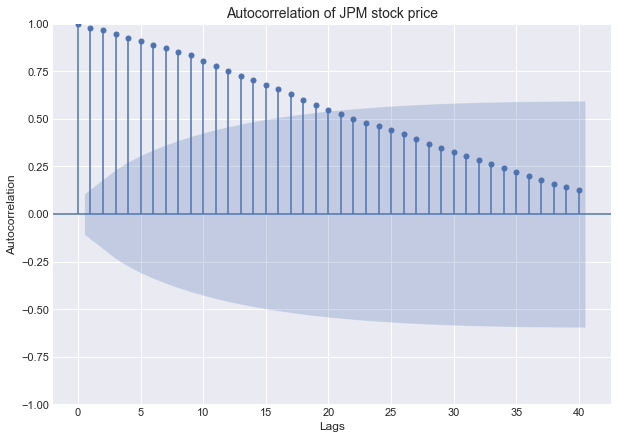

In [593]:
# Import plot_acf from statsmodels
#from statsmodels.graphics.tsaplots import plot_acf

plt.rc("figure", figsize=(10, 7))
# Plot ACF of JPM stock prices for past 40 lags
plot_acf(data.Close, lags=40)
plt.xlabel('Lags', fontsize=12)
plt.ylabel('Autocorrelation', fontsize=12)
plt.title('Autocorrelation of JPM stock price', fontsize=14)
plt.show()

# Lag Plots

A Lag plot is a scatter plot of a time series against a lag of itself. It is normally used to check for autocorrelation. If there is any pattern existing in the series like the one you see below, the series is autocorrelated. If there is no such pattern, the series is likely to be random white noise.

In [392]:
a10 = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv')
a10

date      value
0    1991-07-01   3.526591
1    1991-08-01   3.180891
2    1991-09-01   3.252221
3    1991-10-01   3.611003
4    1991-11-01   3.565869
..          ...        ...
199  2008-02-01  21.654285
200  2008-03-01  18.264945
201  2008-04-01  23.107677
202  2008-05-01  22.912510
203  2008-06-01  19.431740

[204 rows x 2 columns]

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

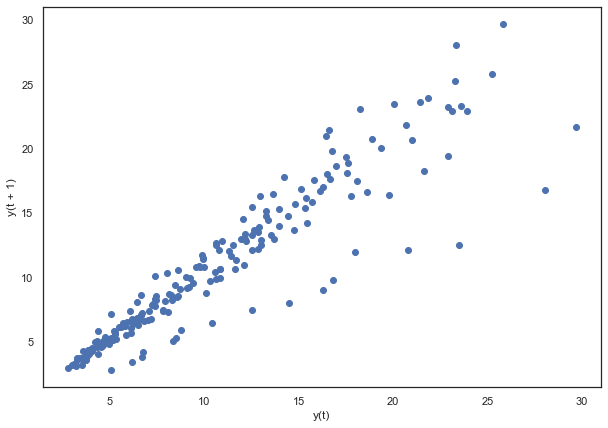

In [393]:
pd.plotting.lag_plot(a10['value'], lag=1)

In [396]:
x = range(1,4)
x

range(1, 4)

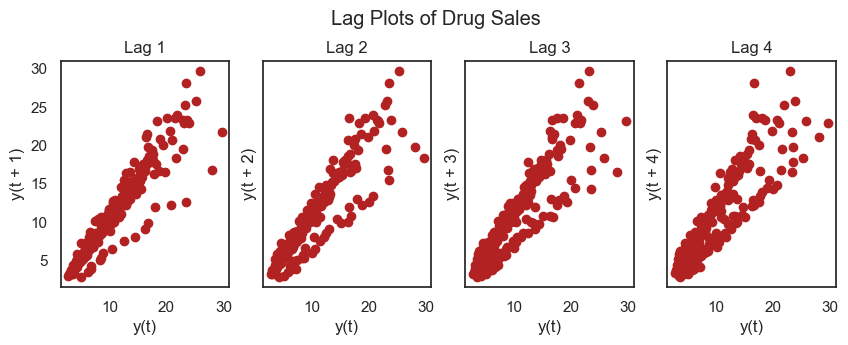

In [404]:
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    pd.plotting.lag_plot(a10.value, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Drug Sales',y=1.05)    
plt.show()

there is a positive correlation between the lags. 

# ARIMA MODEL 

Introduction to ARIMA Models
So what exactly is an ARIMA model?

ARIMA, short for ‘Auto Regressive Integrated Moving Average’ is actually a class of models that ‘explains’ a given time series based on its own past values, that is, its own lags and the lagged forecast errors, so that equation can be used to forecast future values. 

ARIMA models are generally denoted as ARIMA (p, d, q), where p is the order of the autoregressive model (AR), d is the degree of differencing, and q is the order of the moving-average model(MA). ARIMA model uses differencing to convert a non-stationary time series into a stationary one and then predict future values from historical data.

Because, term ‘Auto Regressive’ in ARIMA means it is a linear regression model that uses its own lags as predictors. Linear regression models, as you know, work best when the predictors are not correlated and are independent of each other.
That is why you need the time series to be stationary. 

Any ‘non-seasonal’ time series that exhibits patterns and is not a random white noise can be modeled with ARIMA models.

An ARIMA model is characterized by 3 terms: p, d, q

where,

p is the order of the AR term
q is the order of the MA term

d is the number of differencing required to make the time series stationary

If a time series, has seasonal patterns, then you need to add seasonal terms and it becomes SARIMA, short for ‘Seasonal ARIMA’. More on that once we finish ARIMA.

The most common approach is to difference it. That is, subtract the previous value from the current value. Sometimes, depending on the complexity of the series, more than one differencing may be needed.

The value of d, therefore, is the minimum number of differencing needed to make the series stationary. And if the time series is already stationary, then d = 0.

Next, what are the ‘p’ and ‘q’ terms?

‘p’ is the order of the ‘Auto Regressive’ (AR) term. It refers to the number of lags of Y to be used as predictors. And ‘q’ is the order of the ‘Moving Average’ (MA) term. It refers to the number of lagged forecast errors that should go into the ARIMA Model.

The objective, therefore, is to identify the values of p, d and q. But how?

Let’s start with finding the ‘d’.

# The right order of differencing is the minimum differencing required to get a near-stationary series where the ACF plot reaches to zero fairly quick.

If the autocorrelations are positive for many number of lags (10 or more), then the series needs further differencing. On the other hand, if the lag 1 autocorrelation itself is too negative, then the series is probably over-differenced.



If the lags of the ACF series die out very slowly whereas the lags of the PACF series dies out quickly, then the series is most likely non-stationary. If both the graphs have a few significant lags that die out quickly, then the series is most likely stationary.

# How to find the order of differencing (d) in ARIMA model

In [18]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)

In [19]:
from statsmodels.graphics import utils
from statsmodels.tsa.stattools import acf, pacf

In [20]:
acf_100 = acf(df.value, nlags=100)

In [21]:
acf_100

array([ 1.        ,  0.96018011,  0.90113515,  0.82874638,  0.74598583,
        0.65724304,  0.56472186,  0.46856066,  0.37087797,  0.27417964,
        0.18085388,  0.09052872,  0.00213695, -0.08517373, -0.16705925,
       -0.23888993, -0.29903946, -0.34977533, -0.39272006, -0.42476725,
       -0.44285115, -0.44840287, -0.44318761, -0.43186762, -0.41746118,
       -0.39814979, -0.37211801, -0.34165176, -0.31040795, -0.28107658,
       -0.25190405, -0.22171229, -0.19048339, -0.15892139, -0.12789401,
       -0.0999955 , -0.07464708, -0.04986053, -0.02643312, -0.00452368,
        0.01304776,  0.02641376,  0.03716884,  0.04528242,  0.04879208,
        0.04942892,  0.05072488,  0.0527499 ,  0.05654896,  0.06250086,
        0.06959598,  0.07604082,  0.08489685,  0.09598779,  0.10604335,
        0.11420819,  0.12170762,  0.12854439,  0.13593825,  0.14559481,
        0.15716784,  0.16764942,  0.17805599,  0.19076971,  0.20479205,
        0.21632063,  0.2214912 ,  0.21982823,  0.21391438,  0.20

In [22]:
len(acf_100)

100

In [23]:
import numpy

In [24]:
lags_100= numpy.arange(100)
lags_100

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [25]:
len(lags_100)

100

Autocorrelatrion plot wothout differencing 

In [26]:
import matplotlib.pyplot

Text(0.5, 1.0, 'Actuals')

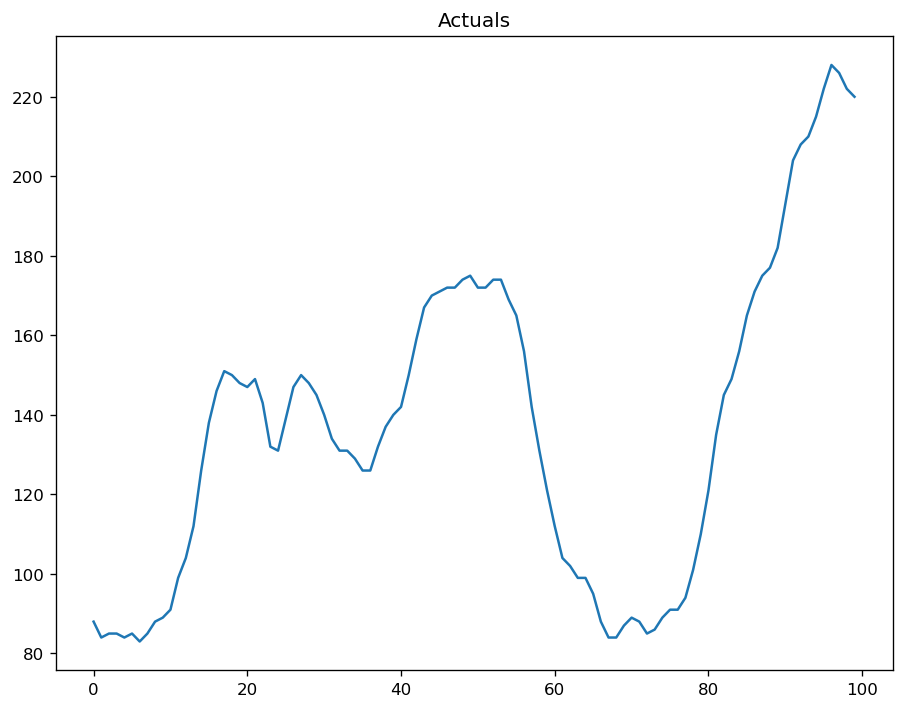

In [28]:
plt.plot(df.value)
plt.title('Actuals')

If the ACF is slowly decaying, that means future values of the series are correlated / heavily affected by past values. If past values of the series are high, the future values should also be high. If the value goes up, future values will also go up (assuming positive auto-correlation here). This means the mean will change over time, which means that the process is non-stationary.

In [29]:
import matplotlib.pyplot as plt

In [30]:
acf_100_original = acf(df['value'].dropna(), nlags=100)

In [31]:
acf_100_original

array([ 1.        ,  0.96018011,  0.90113515,  0.82874638,  0.74598583,
        0.65724304,  0.56472186,  0.46856066,  0.37087797,  0.27417964,
        0.18085388,  0.09052872,  0.00213695, -0.08517373, -0.16705925,
       -0.23888993, -0.29903946, -0.34977533, -0.39272006, -0.42476725,
       -0.44285115, -0.44840287, -0.44318761, -0.43186762, -0.41746118,
       -0.39814979, -0.37211801, -0.34165176, -0.31040795, -0.28107658,
       -0.25190405, -0.22171229, -0.19048339, -0.15892139, -0.12789401,
       -0.0999955 , -0.07464708, -0.04986053, -0.02643312, -0.00452368,
        0.01304776,  0.02641376,  0.03716884,  0.04528242,  0.04879208,
        0.04942892,  0.05072488,  0.0527499 ,  0.05654896,  0.06250086,
        0.06959598,  0.07604082,  0.08489685,  0.09598779,  0.10604335,
        0.11420819,  0.12170762,  0.12854439,  0.13593825,  0.14559481,
        0.15716784,  0.16764942,  0.17805599,  0.19076971,  0.20479205,
        0.21632063,  0.2214912 ,  0.21982823,  0.21391438,  0.20

In [32]:
len(acf_100_original)

100

In [33]:
lags= numpy.arange(100)
len(lags)

100

In [34]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'ACF_first_original')

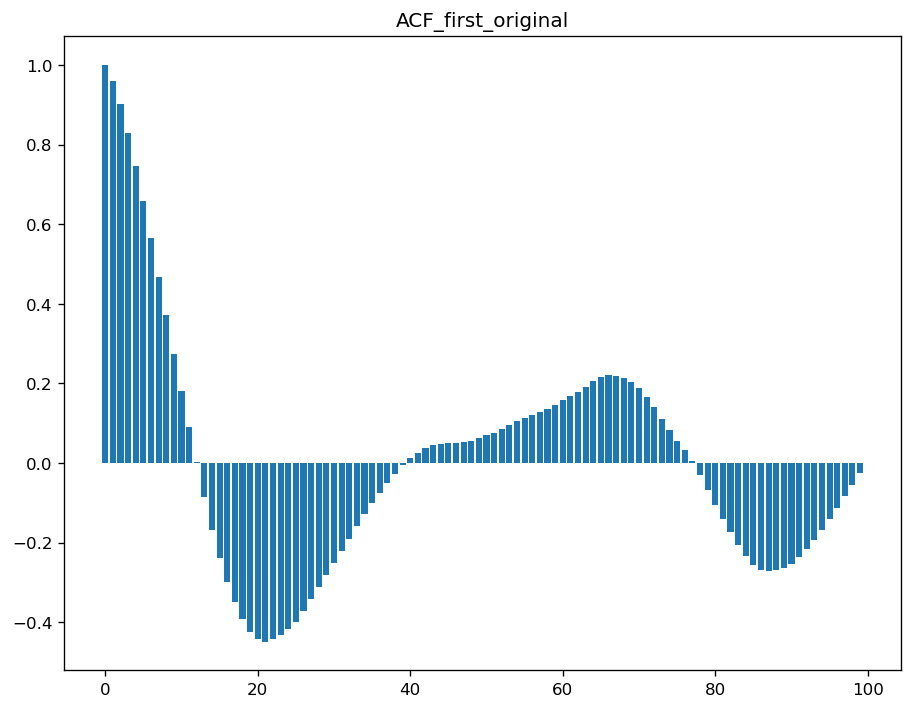

In [35]:
plt.bar(lags,acf_100_original)
plt.title('ACF_first_original')

In [36]:
df['value_2'] = df['value'].diff()

In [37]:
#the first value is nan because thereis not previous value
df

value  value_2
0      88      NaN
1      84     -4.0
2      85      1.0
3      85      0.0
4      84     -1.0
..    ...      ...
95    222      7.0
96    228      6.0
97    226     -2.0
98    222     -4.0
99    220     -2.0

[100 rows x 2 columns]

Text(0.5, 1.0, '1st Order Differencing')

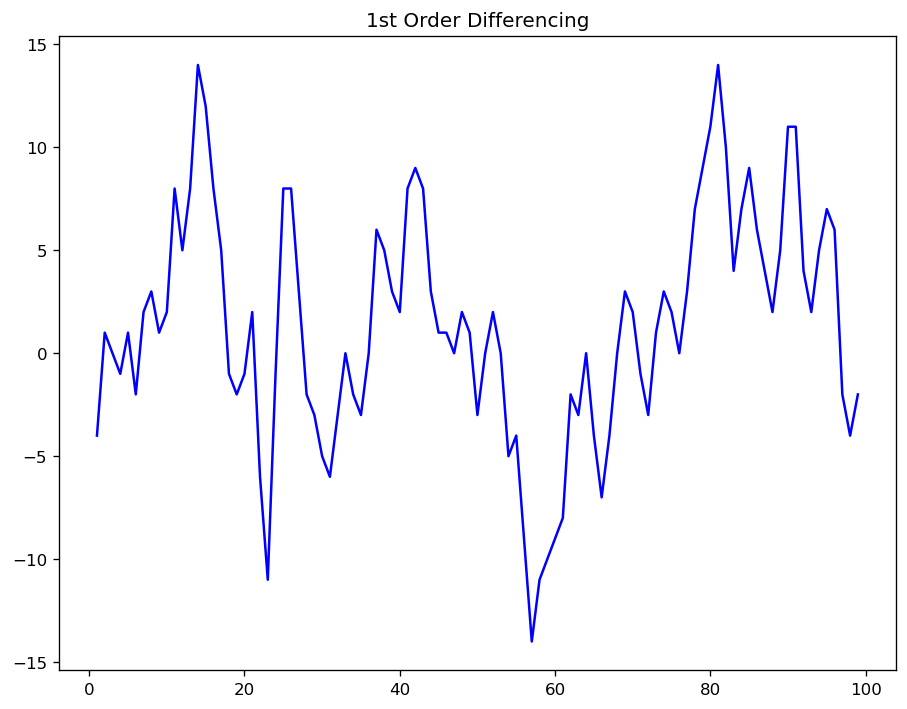

In [38]:
plt.plot(df['value_2'],color = 'blue')
plt.title('1st Order Differencing')

In [39]:
acf_100_1st_differencing = acf(df['value_2'].dropna(), nlags=100)

In [40]:
acf_100_1st_differencing

array([ 1.        ,  0.79176355,  0.51979849,  0.40615092,  0.38201931,
        0.3315719 ,  0.22606214,  0.10417107,  0.04886212,  0.08634538,
        0.12551962,  0.11967167,  0.03931516, -0.07507222, -0.15373776,
       -0.17934897, -0.17452265, -0.21535264, -0.30374128, -0.36359473,
       -0.35137039, -0.26453181, -0.20760234, -0.24293666, -0.25850772,
       -0.15338547, -0.00820827,  0.04618474, -0.00436835, -0.05766927,
       -0.07091524, -0.06291834, -0.06157965, -0.078736  , -0.06281265,
       -0.03209329,  0.01934052,  0.07457902,  0.09399   ,  0.04407102,
       -0.00796167, -0.02237018, -0.032974  , -0.03195237, -0.06834355,
       -0.14722046, -0.17927852, -0.11643063, -0.05062355, -0.06820264,
       -0.12234905, -0.12439231, -0.05699993,  0.02296907,  0.01215388,
       -0.03565138, -0.06411611, -0.07482562, -0.08891707, -0.08366801,
       -0.07831325, -0.0901853 , -0.06316494, -0.00158529,  0.07774959,
        0.12717537,  0.12629465,  0.09360248,  0.08099063,  0.10

In [41]:
#because you eliminate the first nan value. 
len(acf_100_1st_differencing)

99

In [42]:
lags_diferencing= numpy.arange(99)
len(lags_diferencing)

99

Text(0.5, 1.0, 'ACF_1st_differencing')

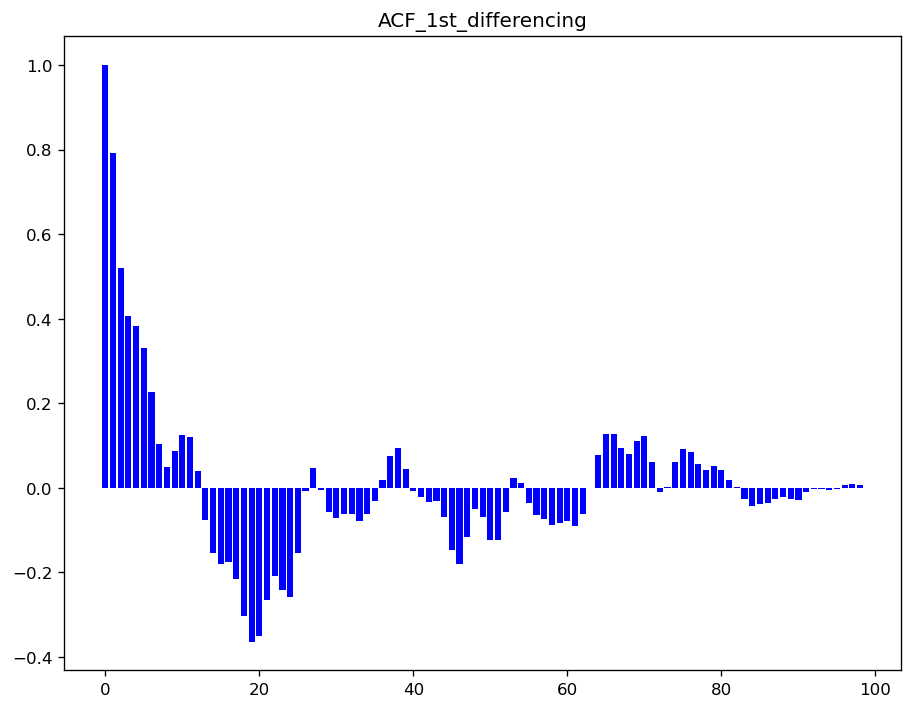

In [43]:
plt.bar(lags_diferencing,acf_100_1st_differencing, color = 'blue' )
plt.title('ACF_1st_differencing')

In [44]:
#this is like value_2 minus its previous value
df['value_3'] = df['value'].diff().diff()

In [45]:
df

value  value_2  value_3
0      88      NaN      NaN
1      84     -4.0      NaN
2      85      1.0      5.0
3      85      0.0     -1.0
4      84     -1.0     -1.0
..    ...      ...      ...
95    222      7.0      2.0
96    228      6.0     -1.0
97    226     -2.0     -8.0
98    222     -4.0     -2.0
99    220     -2.0      2.0

[100 rows x 3 columns]

Text(0.5, 1.0, '2nd Order Differencing')

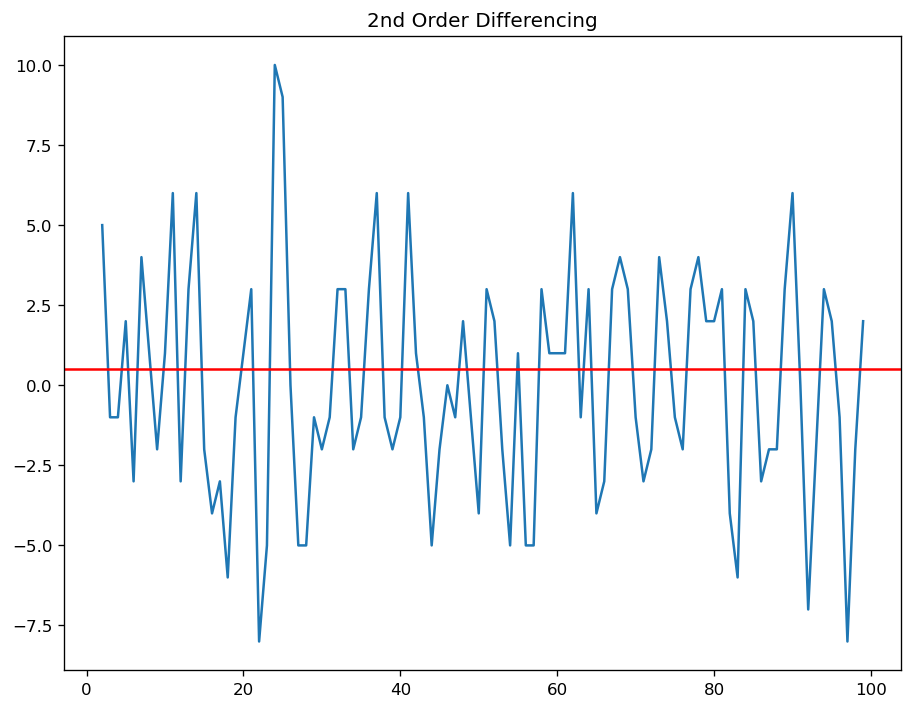

In [46]:
#it is getting more stationary which is linear. 
plt.plot(df['value_3'])
plt.axhline(y = 0.5, color = 'r', linestyle = '-')
plt.title('2nd Order Differencing')

In [47]:
df['value_3'] = df['value_3'].dropna()

In [48]:
df

value  value_2  value_3
0      88      NaN      NaN
1      84     -4.0      NaN
2      85      1.0      5.0
3      85      0.0     -1.0
4      84     -1.0     -1.0
..    ...      ...      ...
95    222      7.0      2.0
96    228      6.0     -1.0
97    226     -2.0     -8.0
98    222     -4.0     -2.0
99    220     -2.0      2.0

[100 rows x 3 columns]

In [49]:
acf_100_2nd_differencing = acf(df['value_3'].dropna(), nlags=100)

In [50]:
acf_100_2nd_differencing

array([ 1.00000000e+00,  1.73554716e-01, -3.90875958e-01, -2.04986243e-01,
        7.60431624e-02,  1.18414359e-01,  4.94501722e-02, -1.55439300e-01,
       -2.19950072e-01, -1.47117671e-04,  1.20927783e-01,  1.64099954e-01,
        1.02104240e-01, -5.79627276e-02, -1.31828875e-01, -9.73232430e-02,
        9.26354202e-02,  1.08141950e-01, -6.46284658e-02, -1.82307890e-01,
       -1.77518393e-01,  3.51078340e-02,  1.96792116e-01, -1.49376744e-02,
       -2.55806898e-01, -9.64774799e-02,  1.98617029e-01,  2.28428953e-01,
        7.80835210e-03, -9.98108394e-02, -5.43158440e-02,  2.11355784e-02,
        4.79358410e-02, -9.80500043e-02, -3.29631853e-02, -2.82698047e-02,
        7.98195095e-03,  8.72299900e-02,  1.47735238e-01, -1.40644493e-03,
       -7.03706319e-02, -7.54255951e-03, -4.04789367e-02,  8.49532624e-02,
        1.09959343e-01, -1.18446725e-01, -2.26081936e-01,  6.26427041e-03,
        1.97023908e-01,  6.59201589e-02, -1.06001224e-01, -1.60932347e-01,
       -4.47594070e-02,  

In [51]:
len(acf_100_2nd_differencing)

98

In [52]:
lags_diferencing_2nd = numpy.arange(98)
len(lags_diferencing_2nd)

98

In [53]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'ACF_2ND_differencing')

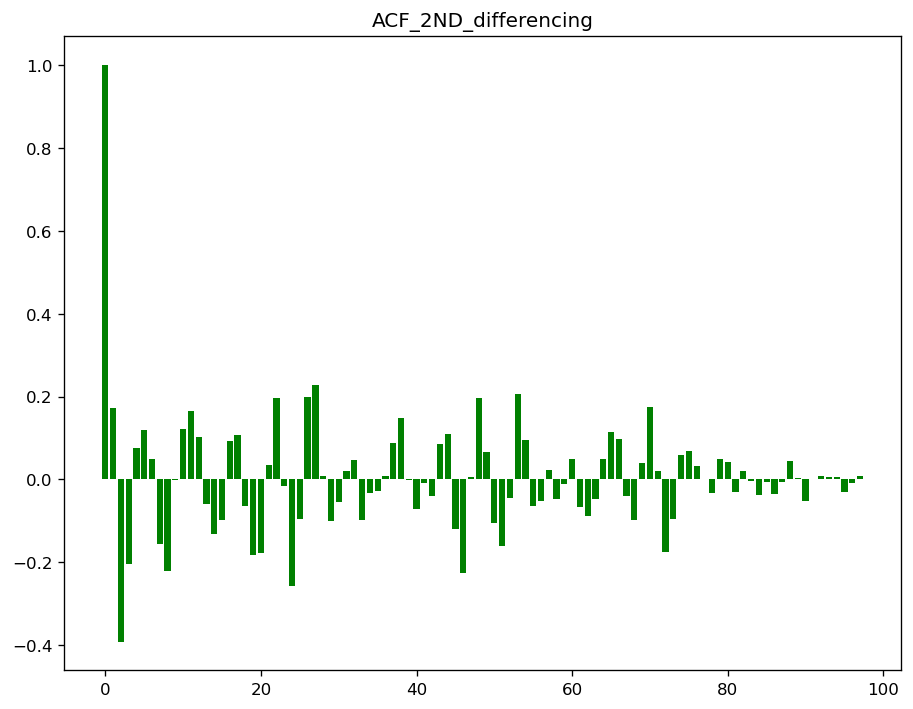

In [54]:
plt.bar(lags_diferencing_2nd,acf_100_2nd_differencing, color = 'green' )
plt.title('ACF_2ND_differencing')

All charts in one: 

For the above series, the time series reaches stationarity with two orders of differencing. But on looking at the autocorrelation plot for the 2nd differencing the lag goes into the far negative zone fairly quick, which indicates, the series might have been over differenced.

So, I am going to tentatively fix the order of differencing as 1 even though the series is not perfectly stationary (weak stationarity).

# How to find the order of the AR term (p)

The next step is to identify if the model needs any AR terms. You can find out the required number of AR terms by inspecting the Partial Autocorrelation (PACF) plot.

It refers to the number of lags of Y to be used as predictors

Partial autocorrelation can be imagined as the correlation between the series and its lag, after excluding the contributions from the intermediate lags. So, PACF sort of conveys the pure correlation between a lag and the series. That way, you will know if that lag is needed in the AR term or not.

C:\Users\Admin\anacondalastone\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


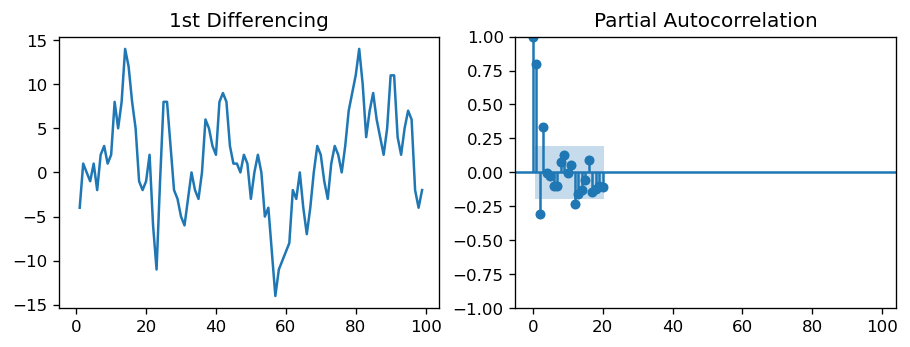

In [81]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.value.diff().dropna(), ax=axes[1])

plt.show()

Couple of lags are well above the significance line. So, let’s tentatively fix q as 2. When in doubt, go with the simpler model that sufficiently explains the Y. in the artiule in this section uses a different Csv. 

In [129]:
from statsmodels.tsa.arima.model import ARIMA

In [132]:
df['value']

0      88
1      84
2      85
3      85
4      84
     ... 
95    222
96    228
97    226
98    222
99    220
Name: value, Length: 100, dtype: int64

In [137]:
# 1,1,2 ARIMA Model
from statsmodels.tsa.arima.model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(df.value, order=(1,1,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  100
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -254.126
Date:                Fri, 24 Mar 2023   AIC                            516.253
Time:                        18:16:35   BIC                            526.633
Sample:                             0   HQIC                           520.453
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6976      0.130      5.365      0.000       0.443       0.952
ma.L1          0.4551      0.169      2.699      0.007       0.125       0.786
ma.L2         -0.0664      0.157     -0.424      0.6

# How to handle if a time series is slightly under or over differenced

If your series is slightly under differenced, adding one or more additional AR terms usually makes it up. Likewise, if it is slightly over-differenced, try adding an additional MA term.

Notice here the coefficient of the MA2 term is close to zero and the P-Value in ‘P>|z|’ column is highly insignificant. It should ideally be less than 0.05 for the respective X to be significant.

So, let’s rebuild the model without the MA2 term.

In [138]:
# 1,1,1 ARIMA Model
model = ARIMA(df.value, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  100
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -254.150
Date:                Fri, 24 Mar 2023   AIC                            514.300
Time:                        18:17:14   BIC                            522.086
Sample:                             0   HQIC                           517.450
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6504      0.090      7.258      0.000       0.475       0.826
ma.L1          0.5256      0.088      5.994      0.000       0.354       0.697
sigma2         9.7934      1.405      6.970      0.0

The model AIC has reduced from 516 to 514, which is good. The P Values of the AR1 and MA1 terms have improved and are highly significant (<< 0.05).

Let’s plot the residuals to ensure there are no patterns (that is, look for constant mean and variance).

In [119]:
import statsmodels.api as sm

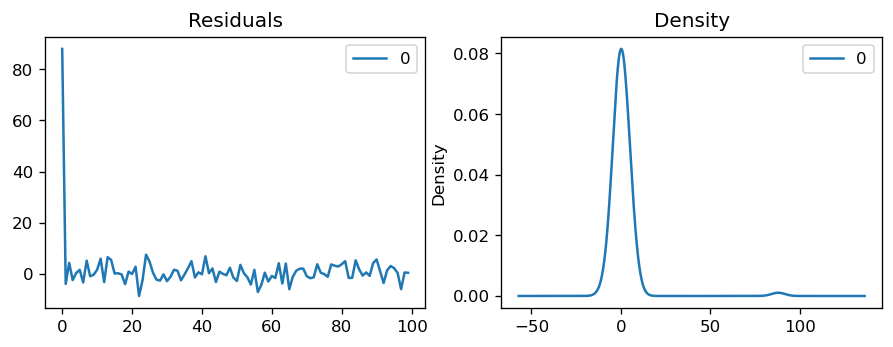

In [139]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [98]:
import statsmodels

In [99]:
 statsmodels.__version__

'0.13.5'

In [100]:
!pip install statsmodels --upgrade

In [101]:
from statsmodels.graphics.tsaplots import plot_predict

In [140]:
# Actual vs Fitted
predict_values = model_fit.predict(dynamic=False)

In [141]:
predict_values

0       0.000000
1      88.002357
2      80.779179
3      87.506935
4      83.739184
         ...    
95    219.834157
96    227.690947
97    232.064658
98    221.511709
99    219.655162
Name: predicted_mean, Length: 100, dtype: float64

In [142]:
df['value']

0      88
1      84
2      85
3      85
4      84
     ... 
95    222
96    228
97    226
98    222
99    220
Name: value, Length: 100, dtype: int64

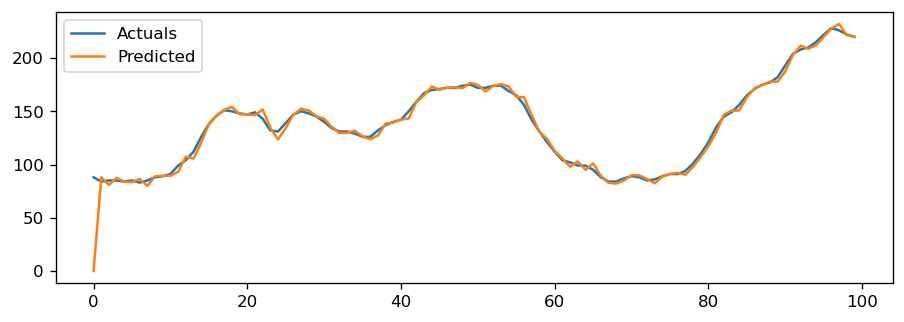

In [143]:
plt.plot(df['value'],label="Actuals")
plt.plot(predict_values,label='Predicted')
plt.legend()
plt.show()

When you set dynamic=False the in-sample lagged values are used for prediction.

That is, the model gets trained up until the previous value to make the next prediction. This can make the fitted forecast and actuals look artificially good.

So, we seem to have a decent ARIMA model. But is that the best?

Can’t say that at this point because we haven’t actually forecasted into the future and compared the forecast with the actual performance.

# How to do find the optimal ARIMA model manually using Out-of-Time Cross validation

In Out-of-Time cross-validation, you take few steps back in time and forecast into the future to as many steps you took back. Then you compare the forecast against the actuals.

To do out-of-time cross-validation, you need to create the training and testing dataset by splitting the time series into 2 contiguous parts in approximately 75:25 ratio or a reasonable proportion based on time frequency of series.

Why am I not sampling the training data randomly you ask?

That’s because the order sequence of the time series should be intact in order to use it for forecasting.

In [144]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df.value[:85]#the first 85%
test = df.value[85:]#the last 25%

In [145]:
train

0      88
1      84
2      85
3      85
4      84
     ... 
80    121
81    135
82    145
83    149
84    156
Name: value, Length: 85, dtype: int64

In [ ]:
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit
test_model.predict(model.params)
# Forecast
fc, se, conf = fitted.predict(fitted.params)

In [ ]:
# 1,1,1 ARIMA Model
model = ARIMA(df.value, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

In [149]:
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit()
# Forecast
fitted.forecast(15, alpha=0.05)

85    163.161121
86    167.885191
87    171.001580
88    173.057409
89    174.413605
90    175.308264
91    175.898456
92    176.287795
93    176.544636
94    176.714069
95    176.825842
96    176.899576
97    176.948217
98    176.980305
99    177.001473
Name: predicted_mean, dtype: float64

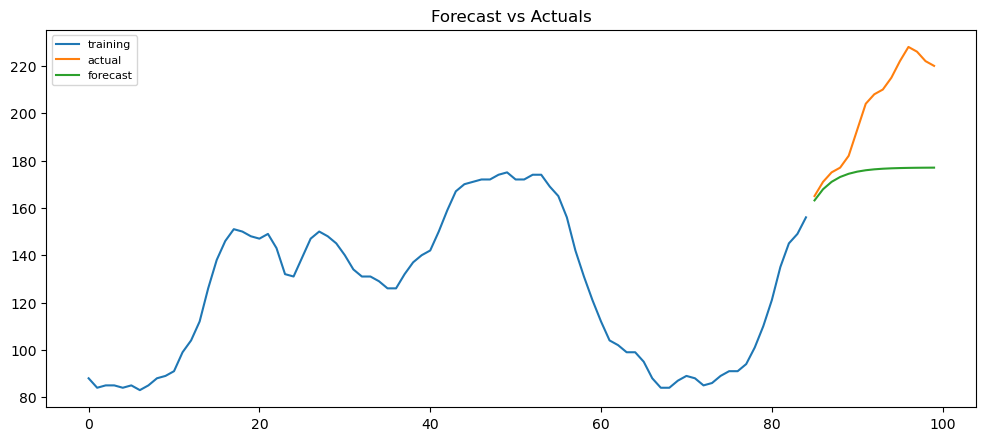

In [150]:
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit()
# Forecast
fc =  fitted.forecast(15, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
#lower_series = pd.Series(conf[:, 0], index=test.index)
#upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

An ARIMA model is characterized by 3 terms: p, d, q

An ARIMA model is defined by its three order parameters, p, d, q. p specifies the number of Autoregressive terms,lags, in the model. d specifies the number of differentations applied on the time series values. q specifies the number of Moving Average terms in the model.

The moving average is a statistical method used for forecasting long-term trends. The technique represents taking an average of a set of numbers in a given range while moving the range.

p is the order of the AR term

q is the order of the MA term

d is the number of differencing required to make the time series stationary

But each of the predicted forecasts is consistently below the actuals. That means, by adding a small constant to our forecast, the accuracy will certainly improve. So, there is definitely scope for improvement.

which model gives least AIC and also look for a chart that gives closer actuals and forecasts.

While doing this, I keep an eye on the P values of the AR and MA terms in the model summary. They should be as close to zero, ideally, less than 0.05.

In [154]:
# 1,1,1 ARIMA Model
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   85
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -217.055
Date:                Fri, 24 Mar 2023   AIC                            440.109
Time:                        18:40:31   BIC                            447.402
Sample:                             0   HQIC                           443.041
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6597      0.097      6.790      0.000       0.469       0.850
ma.L1          0.4857      0.099      4.892      0.000       0.291       0.680
sigma2        10.1098      1.595      6.340      0.0

In [186]:
# 3,2,1 ARIMA Model
model = ARIMA(train, order=(3,2,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   85
Model:                 ARIMA(3, 2, 1)   Log Likelihood                -214.430
Date:                Fri, 24 Mar 2023   AIC                            438.860
Time:                        19:37:49   BIC                            450.954
Sample:                             0   HQIC                           443.719
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1364      0.132      8.607      0.000       0.878       1.395
ar.L2         -0.5883      0.151     -3.898      0.000      -0.884      -0.292
ar.L3          0.3023      0.128      2.360      0.0

C:\Users\Admin\anacondalastone\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


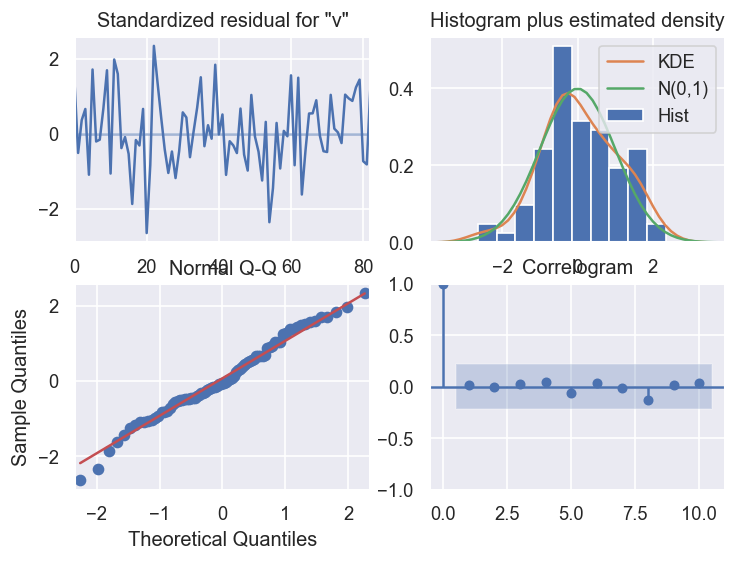

In [188]:
model_fit .plot_diagnostics(figsize=(7,5))
plt.show()

So how to interpret the plot diagnostics?

Top left: The residual errors seem to fluctuate around a mean of zero and have a uniform variance.

Top Right: The density plot suggest normal distribution with mean zero.

Bottom left: All the dots should fall perfectly in line with the red line. Any significant deviations would imply the distribution is skewed.

Bottom Right: The Correlogram, aka, ACF plot shows the residual errors are not autocorrelated. Any autocorrelation would imply that there is some pattern in the residual errors which are not explained in the model. So you will need to look for more X’s (predictors) to the model.

Overall, it seems to be a good fit. Let’s forecast.

C:\Users\Admin\anacondalastone\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


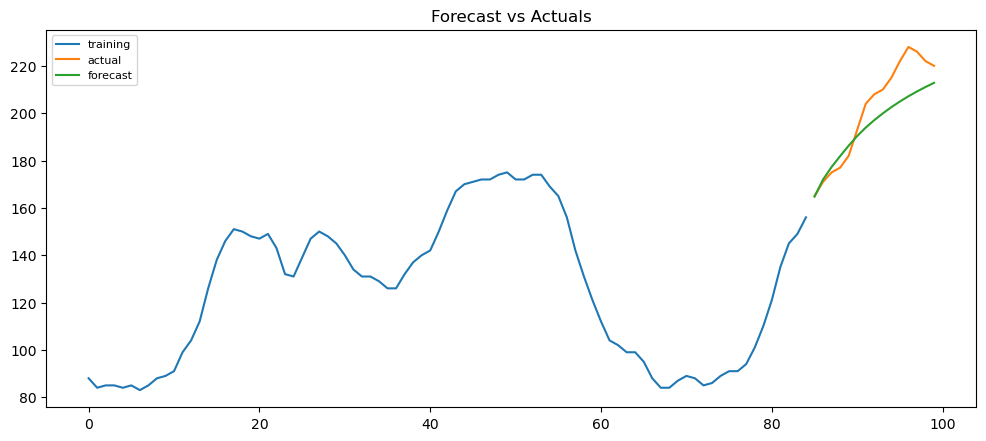

In [174]:
model = ARIMA(train, order=(3, 2, 1))  
fitted = model.fit()
# Forecast
fc_best =  fitted.forecast(15, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc_best, index=test.index)
#lower_series = pd.Series(conf[:, 0], index=test.index)
#upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In this case the best ARIMA model is the (3,2,1)

In [171]:
# 2,2,2 ARIMA Model
model = ARIMA(train, order=(4,2,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   85
Model:                 ARIMA(4, 2, 2)   Log Likelihood                -214.357
Date:                Fri, 24 Mar 2023   AIC                            442.715
Time:                        18:50:57   BIC                            459.647
Sample:                             0   HQIC                           449.517
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1652      0.236      0.699      0.485      -0.298       0.629
ar.L2          0.5191      0.232      2.241      0.025       0.065       0.973
ar.L3         -0.2823      0.143     -1.971      0.0

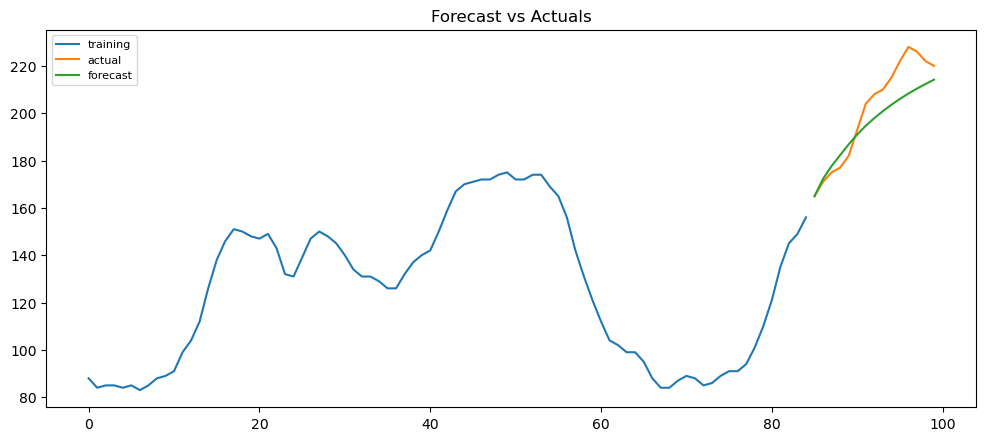

In [170]:
model = ARIMA(train, order=(4, 2, 2))  
fitted = model.fit()
# Forecast
fc =  fitted.forecast(15, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
#lower_series = pd.Series(conf[:, 0], index=test.index)
#upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

So in short ARIMA model is a combination of a number of differences already applied on the model in order to make it stationary, the number of previous lags along with residuals errors in order to forecast future values.

https://hands-on.cloud/using-the-arima-model-and-python-for-time-series-forecasting/

The AIC has reduced to 440 from 515. Good. The P-values of the X terms are less the < 0.05, which is great.

So overall it’s much better.

In [576]:
len(fc)

15

In [577]:
len(test)

15

In [1]:
# Accuracy metrics
def forecast_accuracy(fc_best , actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

In [173]:
forecast_accuracy(fc_best, test.values)

C:\Users\Admin\AppData\Local\Temp/ipykernel_25948/538354817.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  mins = np.amin(np.hstack([forecast[:,None],
C:\Users\Admin\AppData\Local\Temp/ipykernel_25948/538354817.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  maxs = np.amax(np.hstack([forecast[:,None],


{'mape': 0.04112825674800854,
 'me': -7.114564091865612,
 'mae': 8.771511321378913,
 'mpe': -0.0318099511481296,
 'rmse': 10.678070459803394,
 'acf1': 0.8537396072237522,
 'corr': 0.9734758104156861,
 'minmax': 0.041029607713381044}

# Around 4.1% MAPE implies the model is about 96.9% accurate in predicting the next 15 observations.

In [175]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

AttributeError: 'ARIMA' object has no attribute 'plot_diagnostics'

In [176]:
from statsmodels.tsa.arima_model import ARIMA

In [177]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

AttributeError: 'ARIMA' object has no attribute 'plot_diagnostics'

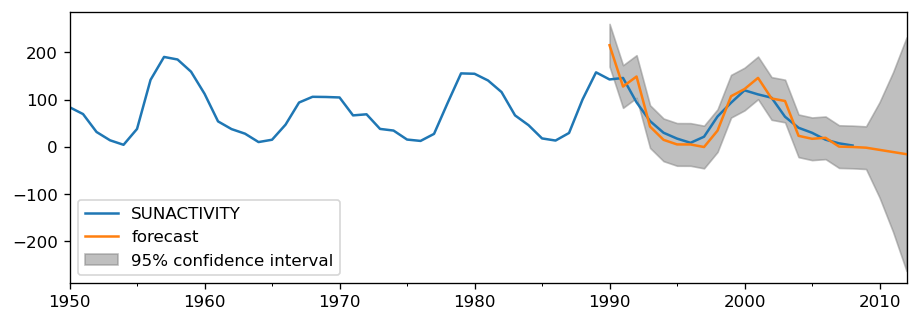

In [178]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima.model import ARIMA

dta = sm.datasets.sunspots.load_pandas().data[['SUNACTIVITY']]
dta.index = pd.date_range(start='1700', end='2009', freq='A')
res = ARIMA(dta, order=(0,2,0)).fit()
fig, ax = plt.subplots()
ax = dta.loc['1950':].plot(ax=ax)
plot_predict(res, '1990', '2012', ax=ax)
plt.show()

In [181]:
from sm.tsa.statespace import ARIMA

ModuleNotFoundError: No module named 'sm'

In [180]:
model.plot_diagnostics(**lags=4**,figsize=(30,15))

SyntaxError: invalid syntax (Temp/ipykernel_25948/2435637846.py, line 1)

                               SARIMAX Results                                
Dep. Variable:            Overall_CPI   No. Observations:                   27
Model:                 ARIMA(1, 1, 0)   Log Likelihood                  -1.773
Date:                Fri, 24 Mar 2023   AIC                              7.547
Time:                        19:33:56   BIC                             10.063
Sample:                    01-01-2019   HQIC                             8.271
                         - 03-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7221      0.137      5.288      0.000       0.454       0.990
sigma2         0.0652      0.017      3.778      0.000       0.031       0.099
Ljung-Box (L1) (Q):                   2.18   Jarque-

C:\Users\Admin\anacondalastone\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


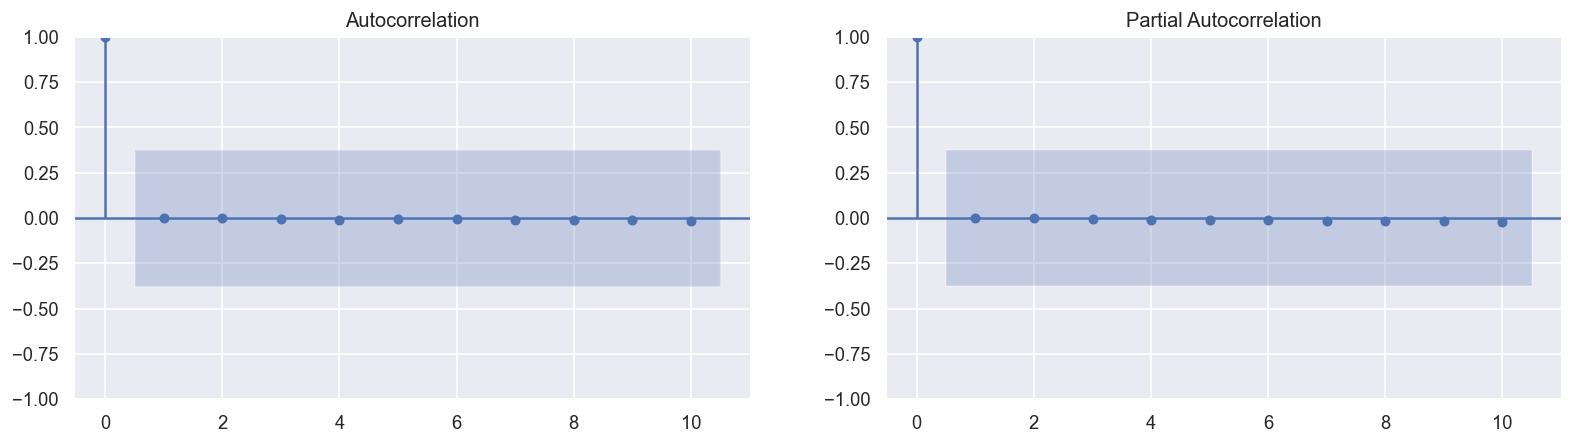

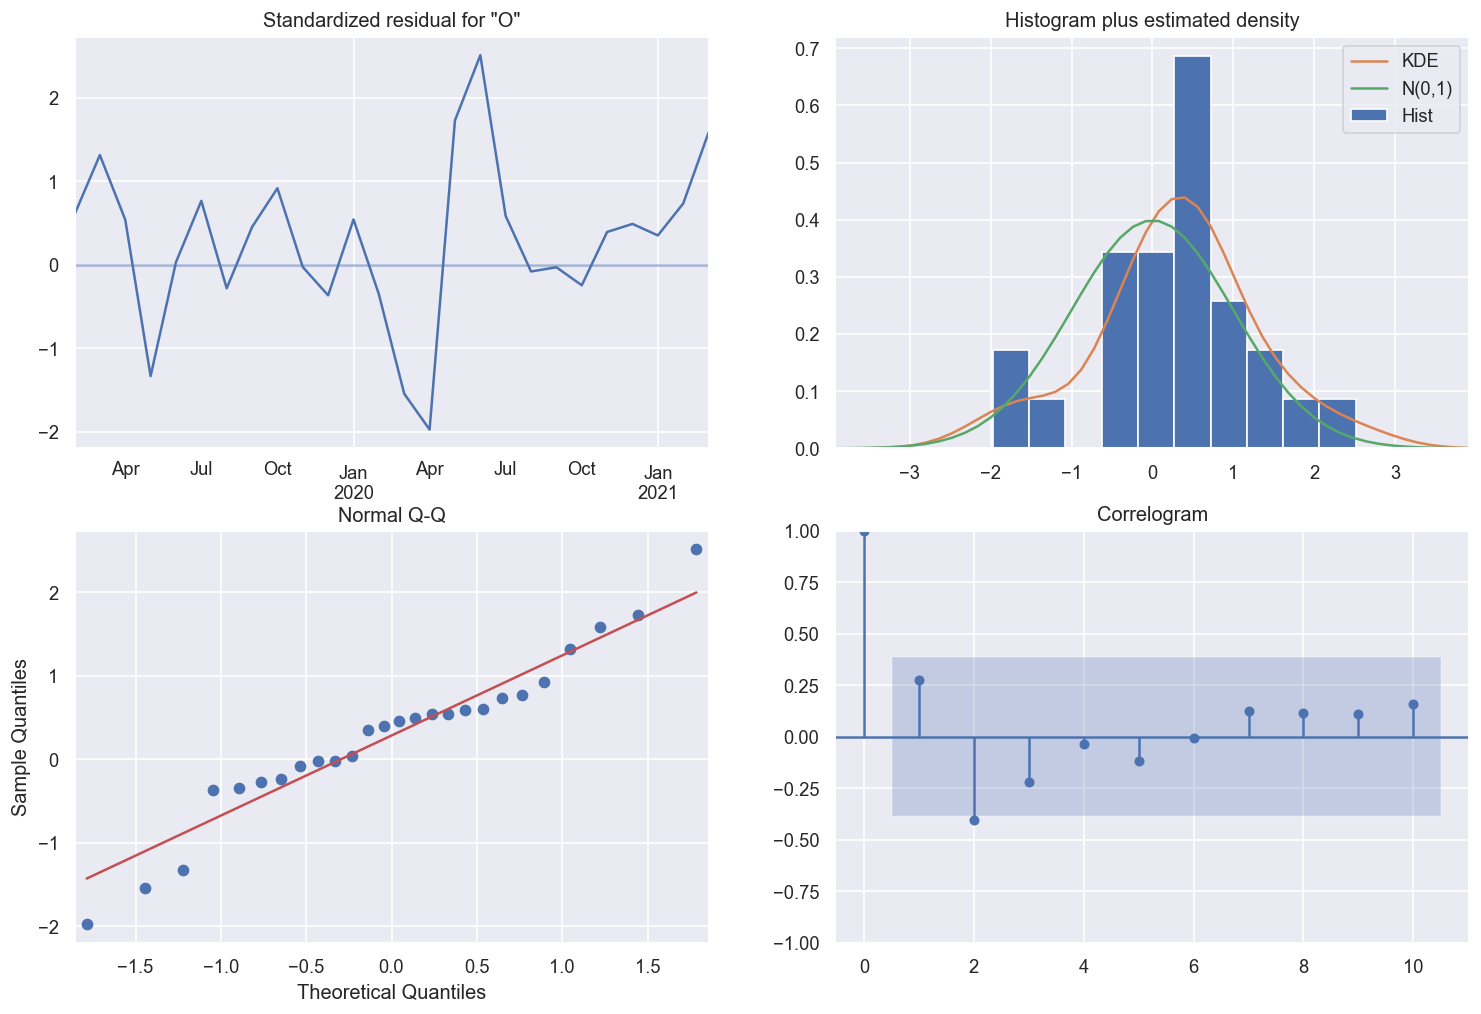

In [182]:
# this data is actual CPI data from FRED, a subset of what I used above that replicates the problems with copy/paste. 
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

cpidat = [106.507550091344, 106.730318922271, 107.227329685212, 107.724762358818,
 107.743748338727, 107.765687693288, 107.977486846935, 108.05891560521,
 108.233586620369, 108.594320238633, 108.848310458743, 108.938599340976,
 109.142804102659, 109.200605863714, 108.848310458743, 108.090136994393,
 107.984659328234, 108.550019618846, 109.107785517495, 109.490458490319,
 109.759637494357, 109.891695532388, 110.087883991444, 110.354953442158,
 110.638055498129, 111.03043241624, 111.718990620926]
r = pd.date_range(start='2019-01-01', end='2021-03-01', freq='MS')
cpi_df = pd.DataFrame([cpidat]).T
cpi_df.index = r
cpi_df.columns = ['Overall_CPI']

# fit model
cpimod = sm.tsa.arima.ARIMA(cpi_df, order=(1, 1, 0))
cpires = cpimod.fit()
print(cpires.summary())

# now plot the ACF and PACF
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(16, 4)
sm.graphics.tsa.plot_acf(cpires.resid, lags=10, ax=axs[0]);
sm.graphics.tsa.plot_pacf(cpires.resid, lags=10, ax=axs[1]);

# Diagnostics for comparison
f = cpires.plot_diagnostics(figsize=(15,10))

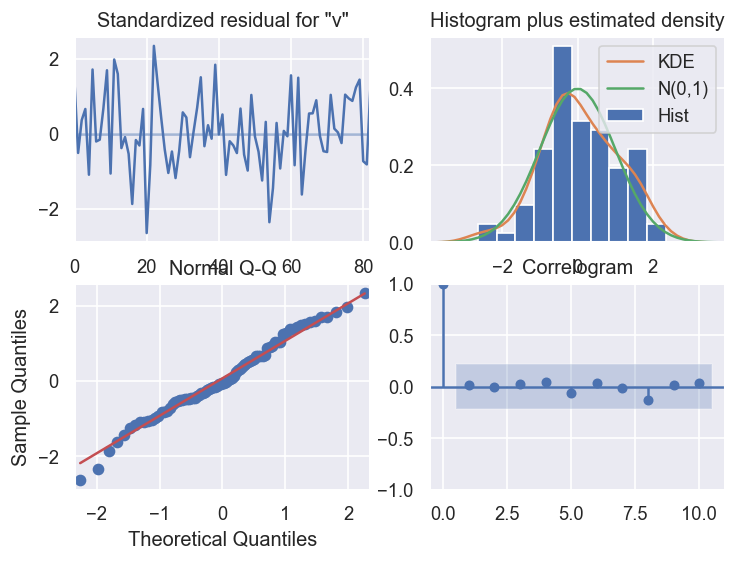

In [187]:
model_fit .plot_diagnostics(figsize=(7,5))
plt.show()

# How to automatically build SARIMA model in python

In [189]:
# Import
data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

In [190]:
data

value
date                 
1991-07-01   3.526591
1991-08-01   3.180891
1991-09-01   3.252221
1991-10-01   3.611003
1991-11-01   3.565869
...               ...
2008-02-01  21.654285
2008-03-01  18.264945
2008-04-01  23.107677
2008-05-01  22.912510
2008-06-01  19.431740

[204 rows x 1 columns]

In [191]:
data[:].diff(1)

value
date                
1991-07-01       NaN
1991-08-01 -0.345700
1991-09-01  0.071330
1991-10-01  0.358782
1991-11-01 -0.045134
...              ...
2008-02-01 -8.011071
2008-03-01 -3.389340
2008-04-01  4.842732
2008-05-01 -0.195167
2008-06-01 -3.480770

[204 rows x 1 columns]

In [192]:
data[:].diff(12)

value
date                
1991-07-01       NaN
1991-08-01       NaN
1991-09-01       NaN
1991-10-01       NaN
1991-11-01       NaN
...              ...
2008-02-01  4.890416
2008-03-01 -1.527809
2008-04-01  6.680372
2008-05-01  1.911768
2008-06-01 -1.249262

[204 rows x 1 columns]

# Seasonal differencing is similar to regular differencing, but, instead of subtracting consecutive terms in this case the previous month, you subtract the value from previous season.In this case the previous year. 

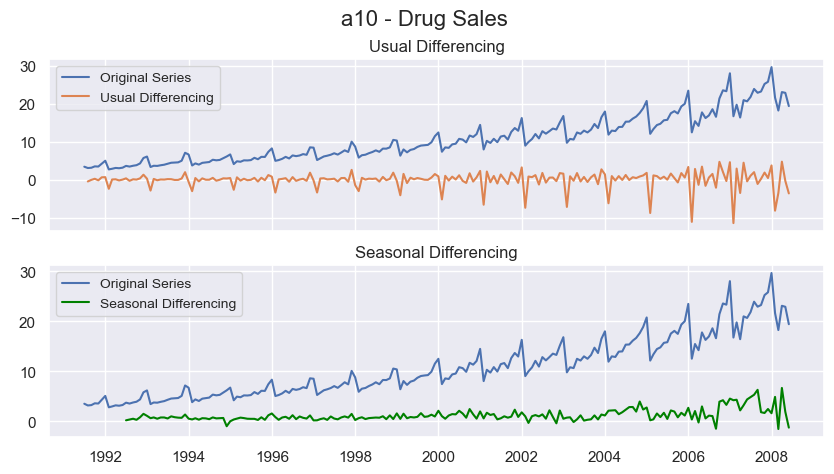

In [193]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(data[:], label='Original Series')
axes[0].plot(data[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(data[:], label='Original Series')
axes[1].plot(data[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('a10 - Drug Sales', fontsize=16)
plt.show()

As you can clearly see, the seasonal spikes is intact after applying usual differencing (lag 1). Whereas, it is rectified after seasonal differencing.

Let’s build the SARIMA model using pmdarima‘s auto_arima(). To do that, you need to set seasonal=True, set the frequency m=12 for month wise series and enforce D=1.

In [194]:
!pip3 install pyramid-arima

  Using cached pyramid-arima-0.8.1.tar.gz (515 kB)
  Running setup.py clean for pyramid-arima
Failed to build pyramid-arima
    Running setup.py install for pyramid-arima: started
    Running setup.py install for pyramid-arima: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Admin\anacondalastone\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Admin\\AppData\\Local\\Temp\\pip-install-laifxn6q\\pyramid-arima_e11a7638e333457aa34c0696a40adc0a\\setup.py'"'"'; __file__='"'"'C:\\Users\\Admin\\AppData\\Local\\Temp\\pip-install-laifxn6q\\pyramid-arima_e11a7638e333457aa34c0696a40adc0a\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Admin\AppData\Local\Temp\pip-wheel-jyyd53kb'
       cwd: C:\Users\Admin\AppData\Local\Temp\pip-install-laifxn6q\pyramid-arima_e11a7638e333457aa34c0696a40adc0a\
  Complete output (178 lines):
  Partial import of pyramid during the build process.
  
  Requirements: ['Cython>=0.23\n

In [195]:
import pmdarima as pm

In [197]:
model = pm.auto_arima(df.value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=525.587, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=533.474, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=532.437, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=525.893, Time=0.03 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=531.477, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=515.248, Time=0.05 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=513.459, Time=0.04 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=515.284, Time=0.05 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=511.465, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=530.444, Time=0.00 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=513.291, Time=0.03 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=513.256, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=523.592, Time=0.02 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time

In Arima the best parameters mix that give the best AIC are: 
ARIMA(3,2,0)(0,0,0)[0]             : AIC=513.291, Time=0.03 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=513.256, Time=0.03 sec
I used before the (3,2,1) paramters. Let's plot the results with (2,2,1)

C:\Users\Admin\anacondalastone\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


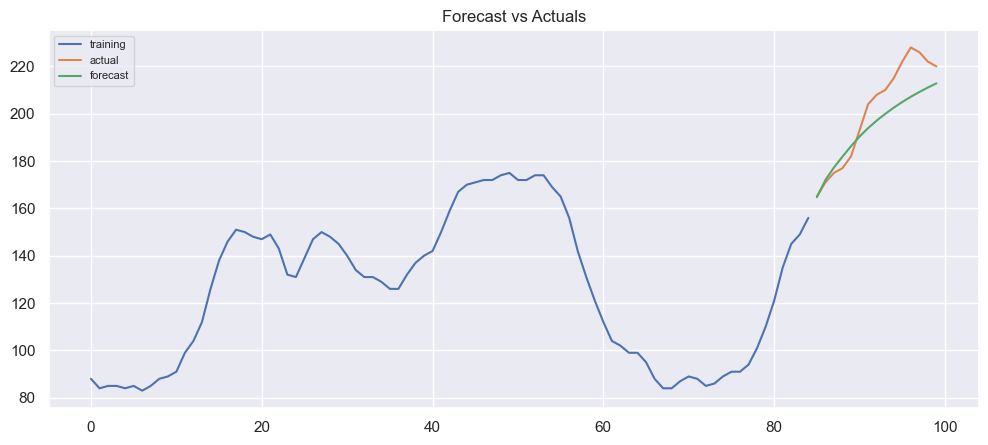

In [200]:
model = ARIMA(train, order=(3, 2, 1))  
fitted = model.fit()
# Forecast
fc_best =  fitted.forecast(15, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc_best, index=test.index)
#lower_series = pd.Series(conf[:, 0], index=test.index)
#upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [199]:
# 2,2,2 ARIMA Model
model = ARIMA(train, order=(2,2,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   85
Model:                 ARIMA(2, 2, 1)   Log Likelihood                -216.056
Date:                Fri, 24 Mar 2023   AIC                            440.111
Time:                        20:17:46   BIC                            449.787
Sample:                             0   HQIC                           443.998
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2943      0.285      1.032      0.302      -0.265       0.853
ar.L2         -0.4059      0.110     -3.691      0.000      -0.621      -0.190
ma.L1         -0.0727      0.307     -0.237      0.8

In [196]:
# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(data, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=534.818, Time=0.51 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=624.061, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=596.068, Time=0.26 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=611.475, Time=0.13 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=757.274, Time=0.05 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=559.407, Time=0.18 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=0.92 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=536.817, Time=1.11 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=543.106, Time=0.53 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=537.899, Time=1.65 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=594.467, Time=0.17 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=529.829, Time=0.53 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=555.198, Time=0.20 sec
 ARIMA(2,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=1.11 sec
 ARIMA(2,0,1)(0,1,2)[12] intercept   : AI

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  204
Model:             SARIMAX(2, 0, 1)x(1, 1, [1, 2], 12)   Log Likelihood                -254.176
Date:                                 Fri, 24 Mar 2023   AIC                            522.352
Time:                                         20:02:26   BIC                            545.155
Sample:                                     07-01-1991   HQIC                           531.588
                                          - 06-01-2008                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6750      0.068      9.958      0.000       0.542       0.808
ar.L2          0.3149      0.063      4.993      0.000       0.191       0.439
ma.L1         -0.6390      0.062    -10.333      0.000      -0.760      -0.518
ar.S.L12       0.8484      0.152      5.575      0.000       0.550       1.147
ma.S.L12      -1.5857      0.174     -9.126      0.000      -1.926      -1.245
ma.S.L24       0.7618      0.109      6.980      0.000       0.548       0.976
sigma2         0.7455      0.068     10.988      0.000       0.613       0.879
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):               197.88
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):              15.44   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The model has estimated the AIC and the P values of the coefficients look significant. Let’s look at the residual diagnostics plot.

The best model SARIMAXSARIMAX(2, 0, 1)x(1, 1, [1, 2], 12) has an AIC of 522 and the P Values are significant.<0.05

Let’s forecast for the next 24 months.

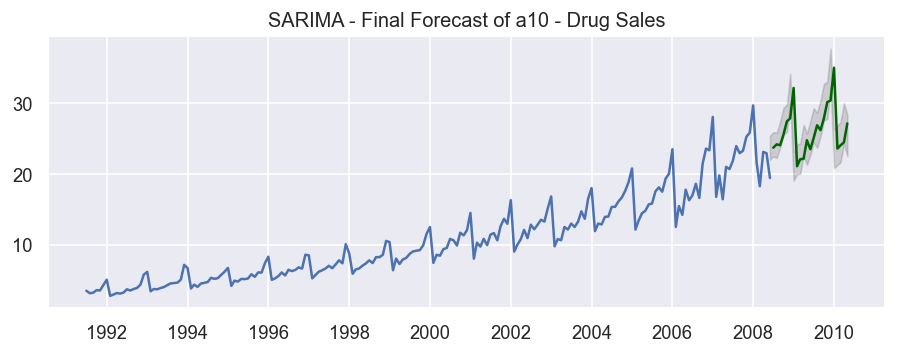

In [201]:
# Forecast for the next two years. 
n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of a10 - Drug Sales")
plt.show()

In [202]:
# Compute Seasonal Index
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

In [206]:
#the last 3 years. 
data['value'][-36:]

date
2005-07-01    15.829550
2005-08-01    17.554701
2005-09-01    18.100864
2005-10-01    17.496668
2005-11-01    19.347265
2005-12-01    20.031291
2006-01-01    23.486694
2006-02-01    12.536987
2006-03-01    15.467018
2006-04-01    14.233539
2006-05-01    17.783058
2006-06-01    16.291602
2006-07-01    16.980282
2006-08-01    18.612189
2006-09-01    16.623343
2006-10-01    21.430241
2006-11-01    23.575517
2006-12-01    23.334206
2007-01-01    28.038383
2007-02-01    16.763869
2007-03-01    19.792754
2007-04-01    16.427305
2007-05-01    21.000742
2007-06-01    20.681002
2007-07-01    21.834890
2007-08-01    23.930204
2007-09-01    22.930357
2007-10-01    23.263340
2007-11-01    25.250030
2007-12-01    25.806090
2008-01-01    29.665356
2008-02-01    21.654285
2008-03-01    18.264945
2008-04-01    23.107677
2008-05-01    22.912510
2008-06-01    19.431740
Name: value, dtype: float64

In [203]:
#multiplicative seasonal component
result_mul = seasonal_decompose(data['value'][-36:],   # 3 years
                                model='multiplicative', 
                                extrapolate_trend='freq')

In [204]:
result_mul

In [207]:
seasonal_index = result_mul.seasonal[-12:].to_frame()
seasonal_index

seasonal
date                
2007-07-01  0.970490
2007-08-01  1.050900
2007-09-01  0.998881
2007-10-01  1.059657
2007-11-01  1.146141
2007-12-01  1.150750
2008-01-01  1.316913
2008-02-01  0.803279
2008-03-01  0.850667
2008-04-01  0.832227
2008-05-01  0.954751
2008-06-01  0.865344

In [208]:
seasonal_index['month'] = pd.to_datetime(seasonal_index.index).month
seasonal_index['month']

date
2007-07-01     7
2007-08-01     8
2007-09-01     9
2007-10-01    10
2007-11-01    11
2007-12-01    12
2008-01-01     1
2008-02-01     2
2008-03-01     3
2008-04-01     4
2008-05-01     5
2008-06-01     6
Name: month, dtype: int64

In [209]:
seasonal_index

seasonal  month
date                       
2007-07-01  0.970490      7
2007-08-01  1.050900      8
2007-09-01  0.998881      9
2007-10-01  1.059657     10
2007-11-01  1.146141     11
2007-12-01  1.150750     12
2008-01-01  1.316913      1
2008-02-01  0.803279      2
2008-03-01  0.850667      3
2008-04-01  0.832227      4
2008-05-01  0.954751      5
2008-06-01  0.865344      6

In [210]:
# merge with the base data
data['month'] = data.index.month
data

value  month
date                        
1991-07-01   3.526591      7
1991-08-01   3.180891      8
1991-09-01   3.252221      9
1991-10-01   3.611003     10
1991-11-01   3.565869     11
...               ...    ...
2008-02-01  21.654285      2
2008-03-01  18.264945      3
2008-04-01  23.107677      4
2008-05-01  22.912510      5
2008-06-01  19.431740      6

[204 rows x 2 columns]

In [211]:
df_final = pd.merge(data, seasonal_index, how='left', on='month')
df_final

value  month  seasonal
0     3.526591      7  0.970490
1     3.180891      8  1.050900
2     3.252221      9  0.998881
3     3.611003     10  1.059657
4     3.565869     11  1.146141
..         ...    ...       ...
199  21.654285      2  0.803279
200  18.264945      3  0.850667
201  23.107677      4  0.832227
202  22.912510      5  0.954751
203  19.431740      6  0.865344

[204 rows x 3 columns]

In [221]:
df_final.columns = ['value', 'month', 'seasonal_index']

In [212]:
len(df_final)

204

In [213]:
df_final.index = df_final.index

In [222]:
df_final

value  month  seasonal_index
0     3.526591      7        0.970490
1     3.180891      8        1.050900
2     3.252221      9        0.998881
3     3.611003     10        1.059657
4     3.565869     11        1.146141
..         ...    ...             ...
199  21.654285      2        0.803279
200  18.264945      3        0.850667
201  23.107677      4        0.832227
202  22.912510      5        0.954751
203  19.431740      6        0.865344

[204 rows x 3 columns]

In [217]:
df_final['seasonal'].isnull().sum()

0

In [229]:
df_final

value  month  seasonal_index
0     3.526591      7        0.970490
1     3.180891      8        1.050900
2     3.252221      9        0.998881
3     3.611003     10        1.059657
4     3.565869     11        1.146141
..         ...    ...             ...
199  21.654285      2        0.803279
200  18.264945      3        0.850667
201  23.107677      4        0.832227
202  22.912510      5        0.954751
203  19.431740      6        0.865344

[204 rows x 3 columns]

In [223]:
import pmdarima as pm

# SARIMAX Model
sxmodel = pm.auto_arima(df_final[['value']], exogenous=df_final[['seasonal_index']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=534.818, Time=0.44 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=624.061, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=596.068, Time=0.17 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=611.475, Time=0.15 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=757.274, Time=0.03 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=559.407, Time=0.13 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=1.09 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=536.817, Time=1.18 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=543.106, Time=0.51 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=537.899, Time=1.81 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=594.467, Time=0.16 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=529.829, Time=0.49 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=555.198, Time=0.23 sec
 ARIMA(2,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=1.38 sec
 ARIMA(2,0,1)(0,1,2)[12] intercept   : AI

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  204
Model:             SARIMAX(2, 0, 1)x(1, 1, [1, 2], 12)   Log Likelihood                -254.176
Date:                                 Fri, 24 Mar 2023   AIC                            522.352
Time:                                         20:56:51   BIC                            545.155
Sample:                                              0   HQIC                           531.588
                                                 - 204                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6750      0.068      9.958      0.000       0.542       0.808
ar.L2          0.3149      0.063      4.993      0.000       0.191       0.439
ma.L1         -0.6390      0.062    -10.333      0.000      -0.760      -0.518
ar.S.L12       0.8484      0.152      5.575      0.000       0.550       1.147
ma.S.L12      -1.5857      0.174     -9.126      0.000      -1.926      -1.245
ma.S.L24       0.7618      0.109      6.980      0.000       0.548       0.976
sigma2         0.7455      0.068     10.988      0.000       0.613       0.879
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):               197.88
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):              15.44   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

So, we have the model with the exogenous term. But the coefficient is very small for x1, so the contribution from that variable will be negligible. Let’s forecast it anyway.

We have effectively forced the latest seasonal effect of the latest 3 years into the model instead of the entire history.

Alright let’s forecast into the next 24 months. For this, you need the value of the seasonal index for the next 24 months.

In [230]:
df_final['value']

0       3.526591
1       3.180891
2       3.252221
3       3.611003
4       3.565869
         ...    
199    21.654285
200    18.264945
201    23.107677
202    22.912510
203    19.431740
Name: value, Length: 204, dtype: float64

In [239]:
# Import Data
data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

In [240]:
# Compute Seasonal Index
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# multiplicative seasonal component
result_mul = seasonal_decompose(data['value'][-36:],   # 3 years
                                model='multiplicative', 
                                extrapolate_trend='freq')

seasonal_index = result_mul.seasonal[-12:].to_frame()
seasonal_index['month'] = pd.to_datetime(seasonal_index.index).month

# merge with the base data
data['month'] = data.index.month
df = pd.merge(data, seasonal_index, how='left', on='month')
df.columns = ['value', 'month', 'seasonal_index']
df.index = data.index  # reassign the index.

In [241]:
import pmdarima as pm

# SARIMAX Model
sxmodel = pm.auto_arima(df[['value']], exogenous=df[['seasonal_index']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=534.818, Time=0.74 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=624.061, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=596.068, Time=0.16 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=611.475, Time=0.16 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=757.274, Time=0.04 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=559.407, Time=0.18 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=0.96 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=536.817, Time=1.83 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=543.106, Time=0.66 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=537.899, Time=1.80 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=594.467, Time=0.16 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=529.829, Time=0.69 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=555.198, Time=0.20 sec
 ARIMA(2,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=1.26 sec
 ARIMA(2,0,1)(0,1,2)[12] intercept   : AI

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  204
Model:             SARIMAX(2, 0, 1)x(1, 1, [1, 2], 12)   Log Likelihood                -254.176
Date:                                 Fri, 24 Mar 2023   AIC                            522.352
Time:                                         21:12:24   BIC                            545.155
Sample:                                     07-01-1991   HQIC                           531.588
                                          - 06-01-2008                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6750      0.068      9.958      0.000       0.542       0.808
ar.L2          0.3149      0.063      4.993      0.000       0.191       0.439
ma.L1         -0.6390      0.062    -10.333      0.000      -0.760      -0.518
ar.S.L12       0.8484      0.152      5.575      0.000       0.550       1.147
ma.S.L12      -1.5857      0.174     -9.126      0.000      -1.926      -1.245
ma.S.L24       0.7618      0.109      6.980      0.000       0.548       0.976
sigma2         0.7455      0.068     10.988      0.000       0.613       0.879
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):               197.88
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):              15.44   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

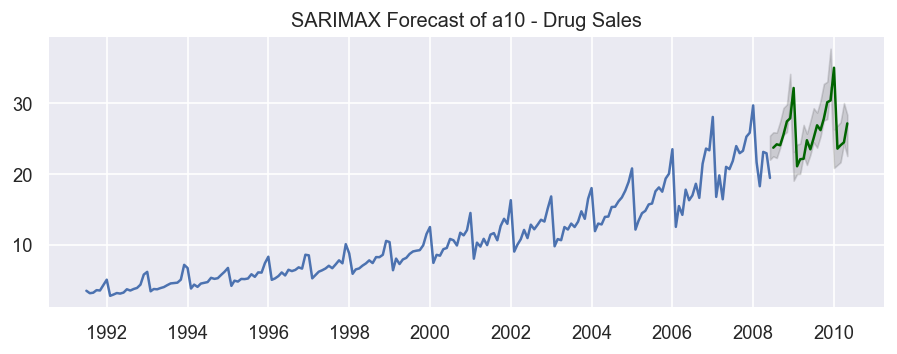

In [244]:
# Forecast
n_periods = 24
fitted, confint = sxmodel.predict(n_periods=n_periods, 
                                  exogenous=np.tile(seasonal_index.seasonal, 2).reshape(-1,1), 
                                  return_conf_int=True)

index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data['value'])
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMAX Forecast of a10 - Drug Sales")
plt.show()

In [243]:
seasonal_index

seasonal  month
date                       
2007-07-01  0.970490      7
2007-08-01  1.050900      8
2007-09-01  0.998881      9
2007-10-01  1.059657     10
2007-11-01  1.146141     11
2007-12-01  1.150750     12
2008-01-01  1.316913      1
2008-02-01  0.803279      2
2008-03-01  0.850667      3
2008-04-01  0.832227      4
2008-05-01  0.954751      5
2008-06-01  0.865344      6

In [245]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)

model = pm.auto_arima(df.value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=525.587, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=533.474, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=532.437, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=525.893, Time=0.03 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=531.477, Time=0.01 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=515.248, Time=0.06 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=513.459, Time=0.06 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=515.284, Time=0.05 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=511.465, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=530.444, Time=0.02 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=513.291, Time=0.03 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=513.256, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=523.592, Time=0.03 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time

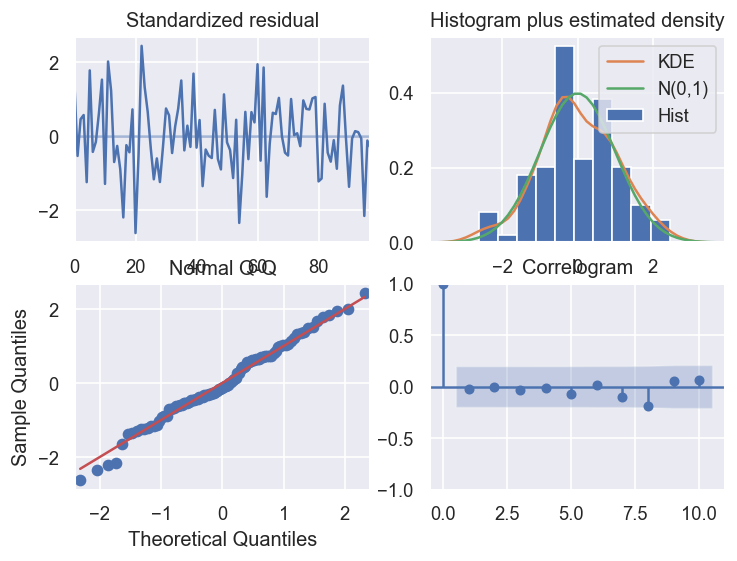

In [246]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

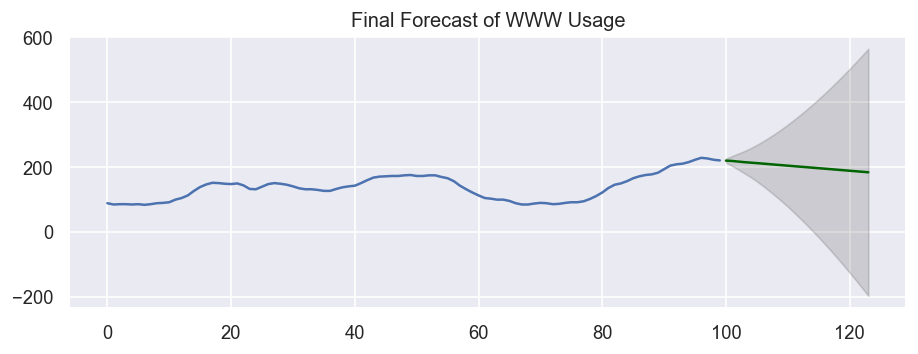

In [247]:
# Forecast
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.value), len(df.value)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df.value)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of WWW Usage")
plt.show()

In [248]:
import pandas as pd 

In [295]:
data_series = pd.read_csv('C:/Users/Admin/Machine Learning chapter 5/case_time_series_ARIMA.csv')

In [296]:
data_series

Date    Date_YMD  Daily Confirmed  Total Confirmed  Daily Recovered  \
0    30-Jan-20   1/30/2020                1                1                0   
1    31-Jan-20   1/31/2020                0                1                0   
2     1-Feb-20    2/1/2020                0                1                0   
3     2-Feb-20    2/2/2020                1                2                0   
4     3-Feb-20    2/3/2020                1                3                0   
..         ...         ...              ...              ...              ...   
636  27-Oct-21  10/27/2021            16351         34231030            17077   
637  28-Oct-21  10/28/2021            14307         34245337            13189   
638  29-Oct-21  10/29/2021            14215         34259552            13549   
639  30-Oct-21  10/30/2021            12940         34272492            14672   
640  31-Oct-21  10/31/2021            12907         34285399            13152   

     Total Recovered  Daily Deceased  Total Deceased  
0                  0               0               0  
1                  0               0               0  
2                  0               0               0  
3                  0               0               0  
4                  0               0               0  
..               ...             ...             ...  
636         33606620             734          455828  
637         33619809             805          456633  
638         33633358             551          457184  
639         33648030             445          457629  
640         33661182             251          457880  

[641 rows x 8 columns]

In [297]:
import datetime as dt

In [298]:
data_series['Date_YMD'] = pd.to_datetime(data_series['Date_YMD'])

In [299]:
data_series['Month']= data_series['Date_YMD'].dt.month

In [300]:
data_series['Year']= data_series['Date_YMD'].dt.year

In [301]:
data_series

Date   Date_YMD  Daily Confirmed  Total Confirmed  Daily Recovered  \
0    30-Jan-20 2020-01-30                1                1                0   
1    31-Jan-20 2020-01-31                0                1                0   
2     1-Feb-20 2020-02-01                0                1                0   
3     2-Feb-20 2020-02-02                1                2                0   
4     3-Feb-20 2020-02-03                1                3                0   
..         ...        ...              ...              ...              ...   
636  27-Oct-21 2021-10-27            16351         34231030            17077   
637  28-Oct-21 2021-10-28            14307         34245337            13189   
638  29-Oct-21 2021-10-29            14215         34259552            13549   
639  30-Oct-21 2021-10-30            12940         34272492            14672   
640  31-Oct-21 2021-10-31            12907         34285399            13152   

     Total Recovered  Daily Deceased  Total Deceased  Month  Year  
0                  0               0               0      1  2020  
1                  0               0               0      1  2020  
2                  0               0               0      2  2020  
3                  0               0               0      2  2020  
4                  0               0               0      2  2020  
..               ...             ...             ...    ...   ...  
636         33606620             734          455828     10  2021  
637         33619809             805          456633     10  2021  
638         33633358             551          457184     10  2021  
639         33648030             445          457629     10  2021  
640         33661182             251          457880     10  2021  

[641 rows x 10 columns]

In [302]:
data_series = data_series.groupby(['Year', 'Month'])['Total Confirmed'].sum()

In [303]:
data_series = data_series.to_frame()

In [304]:
data_series

Total Confirmed
Year Month                 
2020 1                    2
     2                   84
     3                10835
     4               449253
     5              3089422
     6             10963630
     7             32864550
     8             82700833
     9            151659593
     10           228590453
     11           265828931
     12           308007097
2021 1            326969299
     2            305984014
     3            357473743
     4            447457328
     5            760871440
     6            886881294
     7            962843546
     8            999729513
     9           1000587143
     10          1055763913

In [311]:
data_series

Year  Month  Total Confirmed
0   2020      1                2
1   2020      2               84
2   2020      3            10835
3   2020      4           449253
4   2020      5          3089422
5   2020      6         10963630
6   2020      7         32864550
7   2020      8         82700833
8   2020      9        151659593
9   2020     10        228590453
10  2020     11        265828931
11  2020     12        308007097
12  2021      1        326969299
13  2021      2        305984014
14  2021      3        357473743
15  2021      4        447457328
16  2021      5        760871440
17  2021      6        886881294
18  2021      7        962843546
19  2021      8        999729513
20  2021      9       1000587143
21  2021     10       1055763913

In [315]:
data_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Year             22 non-null     int64
 1   Month            22 non-null     int64
 2   Total Confirmed  22 non-null     int64
dtypes: int64(3)
memory usage: 656.0 bytes


In [317]:
data_series['date'] = pd.to_datetime(data_series['Year'].astype(str) + '-' + data_series["Month"].astype(str))

In [318]:
data_series

Year  Month  Total Confirmed       date
0   2020      1                2 2020-01-01
1   2020      2               84 2020-02-01
2   2020      3            10835 2020-03-01
3   2020      4           449253 2020-04-01
4   2020      5          3089422 2020-05-01
5   2020      6         10963630 2020-06-01
6   2020      7         32864550 2020-07-01
7   2020      8         82700833 2020-08-01
8   2020      9        151659593 2020-09-01
9   2020     10        228590453 2020-10-01
10  2020     11        265828931 2020-11-01
11  2020     12        308007097 2020-12-01
12  2021      1        326969299 2021-01-01
13  2021      2        305984014 2021-02-01
14  2021      3        357473743 2021-03-01
15  2021      4        447457328 2021-04-01
16  2021      5        760871440 2021-05-01
17  2021      6        886881294 2021-06-01
18  2021      7        962843546 2021-07-01
19  2021      8        999729513 2021-08-01
20  2021      9       1000587143 2021-09-01
21  2021     10       1055763913 2021-10-01

In [319]:
data_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Year             22 non-null     int64         
 1   Month            22 non-null     int64         
 2   Total Confirmed  22 non-null     int64         
 3   date             22 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 832.0 bytes


In [320]:
data_series = data_series.drop(data_series.columns[[0, 1]], axis=1) # df.columns is zero-based
data_series

Total Confirmed       date
0                 2 2020-01-01
1                84 2020-02-01
2             10835 2020-03-01
3            449253 2020-04-01
4           3089422 2020-05-01
5          10963630 2020-06-01
6          32864550 2020-07-01
7          82700833 2020-08-01
8         151659593 2020-09-01
9         228590453 2020-10-01
10        265828931 2020-11-01
11        308007097 2020-12-01
12        326969299 2021-01-01
13        305984014 2021-02-01
14        357473743 2021-03-01
15        447457328 2021-04-01
16        760871440 2021-05-01
17        886881294 2021-06-01
18        962843546 2021-07-01
19        999729513 2021-08-01
20       1000587143 2021-09-01
21       1055763913 2021-10-01

In [321]:
# checking for null values
data_series.isnull().sum()

Total Confirmed    0
date               0
dtype: int64

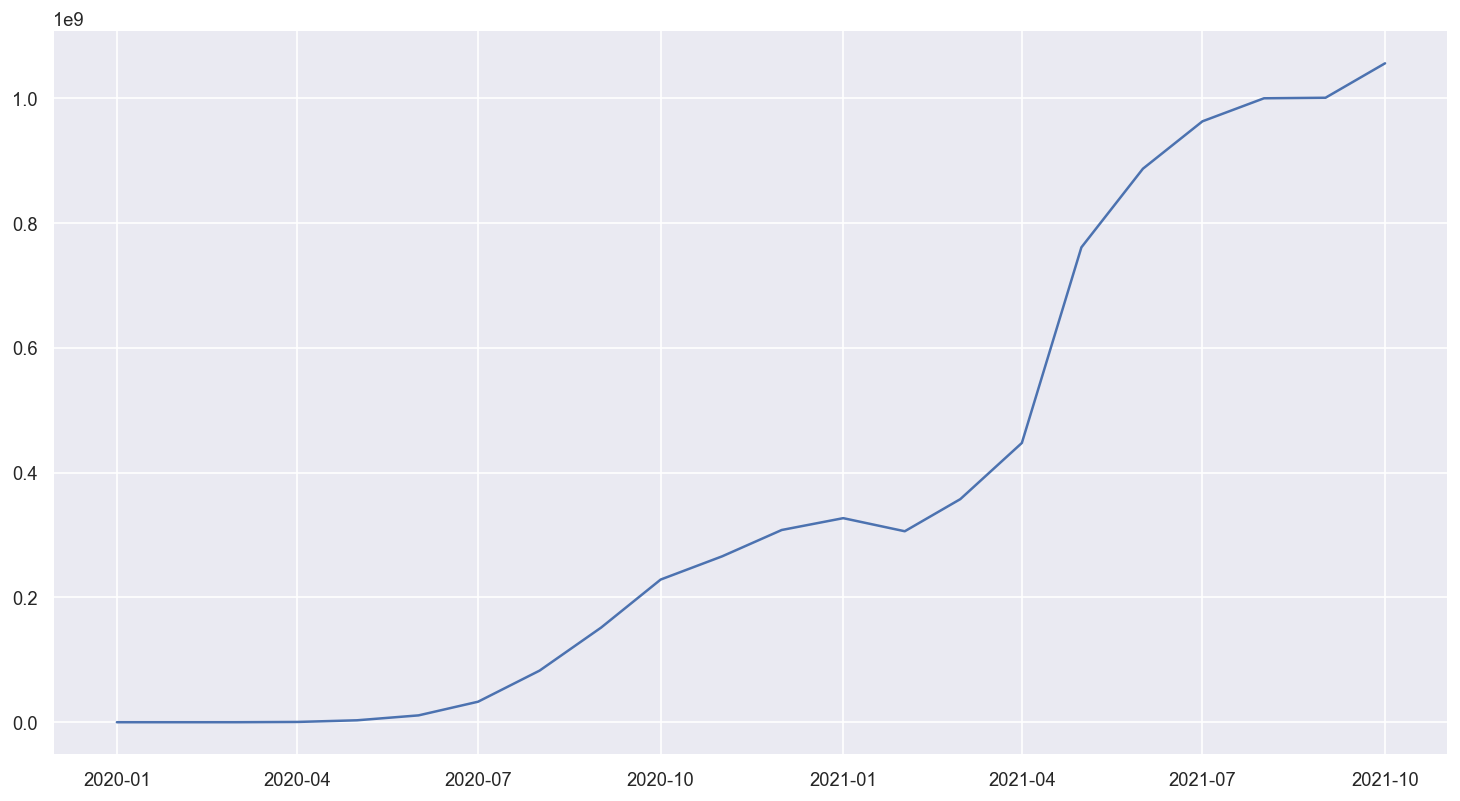

In [323]:
# importing the module
import matplotlib.pyplot as plt
# setting the size
plt.figure(figsize=(15,8))
# plotting the graph
plt.plot(data_series.date, data_series['Total Confirmed'])
plt.show()

As we know that the ARIMA models take three parameter values p, q, and d, so before training the model, we must find the values for each of these terms. The d here represents the number of differencing it takes to stationary the time series. So, let us now apply the 1-st differencing to see if the time-series data becomes stationary.

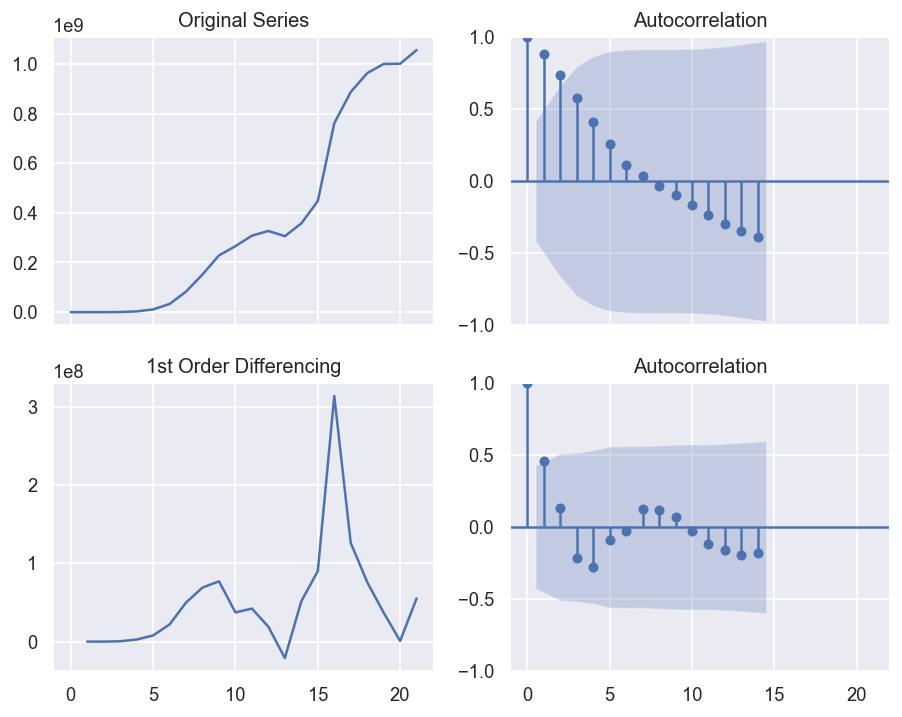

In [325]:
# Importing the modules
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# fixing the size
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(2, 2, sharex=True)
axes[0, 0].plot(data_series['Total Confirmed']); axes[0, 0].set_title('Original Series')
plot_acf(data_series['Total Confirmed'], ax=axes[0, 1])
# 1st Differencing to make stationary time series data
axes[1, 0].plot(data_series['Total Confirmed'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(data_series['Total Confirmed'].diff().dropna(), ax=axes[1, 1])
plt.show()
plt.show()

As we can see, the time series becomes nearly stationary in the second differencing. So, we will set the value of d equal to 2.

We will determine the required number of AR terms by inspecting the Partial Autocorrelation (PACF) plot. 

Text(0.5, 1.0, 'second order diferencing')

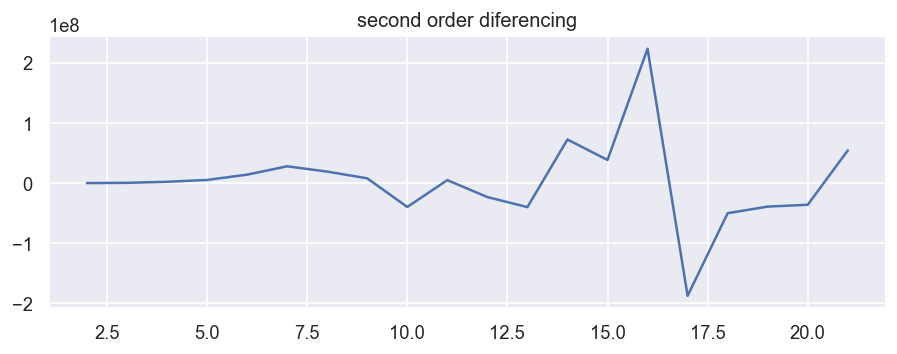

In [334]:
#2nd order diferencing. 
plt.plot(data_series['Total Confirmed'].diff().diff().dropna())
plt.title('second order diferencing')

with the 2nd order differencing we can see that line is more stable but still there are tow picks. 

Text(0.5, 1.0, 'second order diferencing')

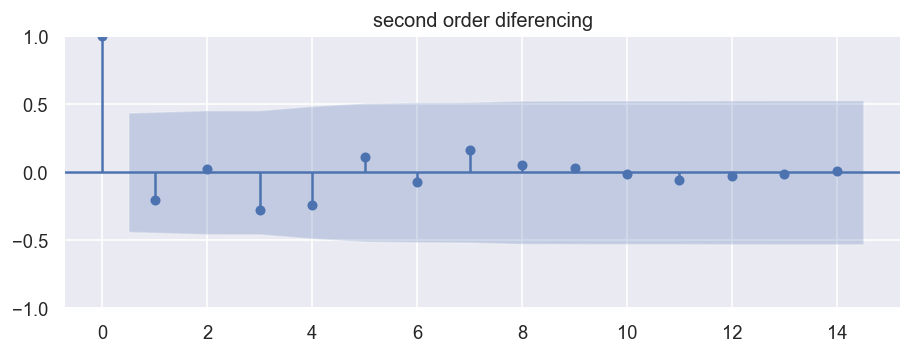

In [335]:
plot_acf(data_series['Total Confirmed'].diff().diff().dropna())
plt.title('second order diferencing')

In [328]:
data_series.shape

(22, 2)

C:\Users\Admin\anacondalastone\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


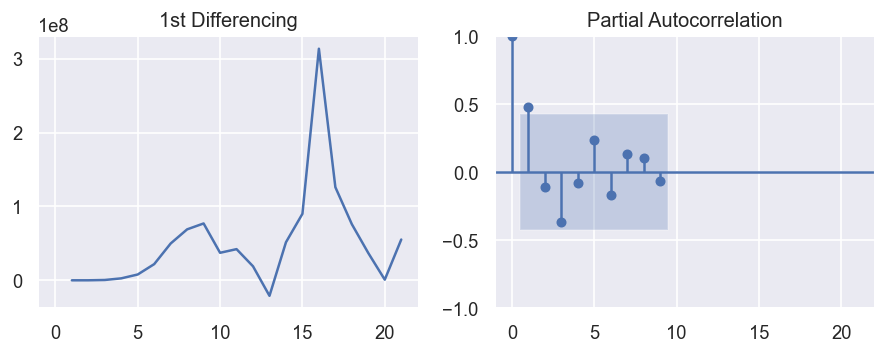

In [333]:
#importing modules
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
# fixing the axis
fig, axes = plt.subplots(1, 2, sharex=True)
# plotting on differen axis
axes[0].plot(data_series['Total Confirmed'].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
# plotting partial autocorrelation function
plot_pacf(data_series['Total Confirmed'].diff().dropna(),lags=9, ax=axes[1])
plt.show()

In the Partial autocorrelation plot, the light blue area shows the significant threshold value, and every vertical line indicates the PACF values at each time spot. So in the plot, only the vertical lines that exceed the light blue area are considered significant. We can see that PACF lag 1 is significant since it is well above the signature line. So, we will set the p value equal to 1.

In [339]:
# 1,1,2 ARIMA Model
from statsmodels.tsa.arima.model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(data_series['Total Confirmed'], order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:        Total Confirmed   No. Observations:                   22
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -407.680
Date:                Sun, 26 Mar 2023   AIC                            821.360
Time:                        19:50:30   BIC                            824.493
Sample:                             0   HQIC                           822.040
                                 - 22                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6843      0.810      0.845      0.398      -0.903       2.271
ma.L1         -0.0451      1.086     -0.042      0.967      -2.174       2.084
sigma2      5.158e+15        nan        nan        n

In [340]:
import pmdarima as pm

In [341]:
model = pm.auto_arima(data_series['Total Confirmed'], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=785.449, Time=0.04 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=784.712, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=785.890, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=785.769, Time=0.02 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=782.835, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.119 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   22
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -390.418
Date:                Sun, 26 Mar 2023   AIC                            782.835
Time:                        19:52:38   BIC                            783.831
Sample:                             0   HQIC                           783.030
                                 - 22                                         
Co

the best ARIMA Model for this case is with parameters: ARIMA(0,2,0)(0,0,0)[0]: AIC=782.835

In [343]:
from statsmodels.graphics.tsaplots import plot_predict

In [347]:
# 1,1,2 ARIMA Model
model = ARIMA(data_series['Total Confirmed'], order=(0,2,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:        Total Confirmed   No. Observations:                   22
Model:                 ARIMA(0, 2, 0)   Log Likelihood                -390.418
Date:                Sun, 26 Mar 2023   AIC                            782.835
Time:                        20:04:45   BIC                            783.831
Sample:                             0   HQIC                           783.030
                                 - 22                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.783e+15   8.05e+14      5.942      0.000    3.21e+15    6.36e+15
Ljung-Box (L1) (Q):                   0.94   Jarque-Bera (JB):                12.68
Prob(Q):                              0.33   Pr

In [348]:
# Actual vs Fitted
predict_values = model_fit.predict(dynamic=False)

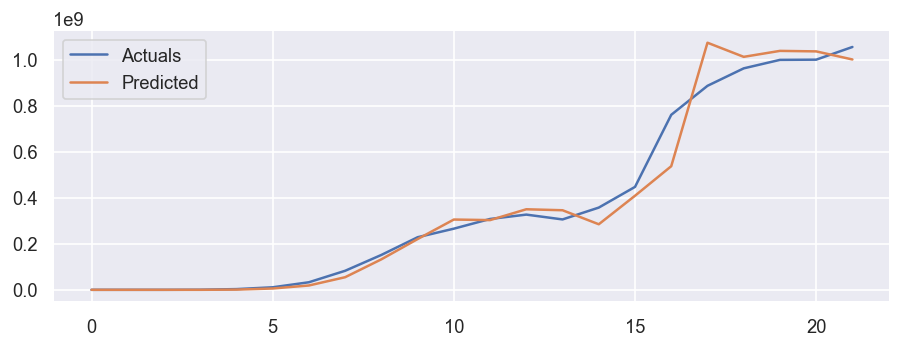

In [350]:
#the model is doing pretty well compared the Actuals with the Predicted values. 
plt.plot(data_series['Total Confirmed'],label="Actuals")
plt.plot(predict_values,label='Predicted')
plt.legend()
plt.show()

# Out-Of-Time Cross-Validation

Out-Of-Time Cross-Validation
In Out-of-Time cross-validation, we move backward in time and forecast into the future. Then we can compare the forecast and the actual values to see how well the predictions are. For that purpose, we will create the training and testing dataset by splitting the time series into 2 contiguous parts in a reasonable proportion based on the time-frequency of the series.

Let’s first split the time series dataset into testing and training parts.

In [394]:
# Create Training and Test
train = data_series['Total Confirmed'][:15]
test = data_series['Total Confirmed'][15:]

In [395]:
train

0             2
1            84
2         10835
3        449253
4       3089422
5      10963630
6      32864550
7      82700833
8     151659593
9     228590453
10    265828931
11    308007097
12    326969299
13    305984014
14    357473743
Name: Total Confirmed, dtype: int64

In [396]:
test

15     447457328
16     760871440
17     886881294
18     962843546
19     999729513
20    1000587143
21    1055763913
Name: Total Confirmed, dtype: int64

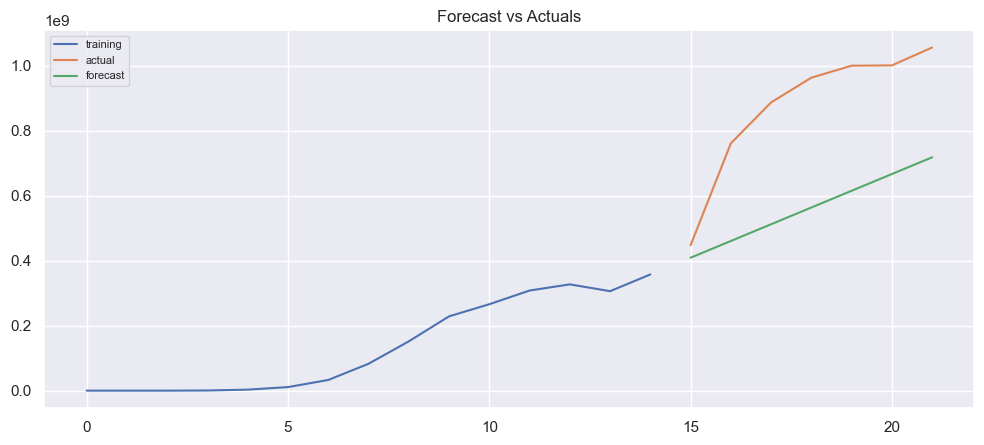

In [397]:
#  Build Model 
model = ARIMA(train, order=(0,2,0)) 
fitted = model.fit()  
# Forecast using 95% confidence interval
fc = fitted.forecast(15, alpha=0.05) 
# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
#lower_series = pd.Series(conf[:, 0], index=test.index)
#upper_series = pd.Series(conf[:, 1], index=test.index)
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
#plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

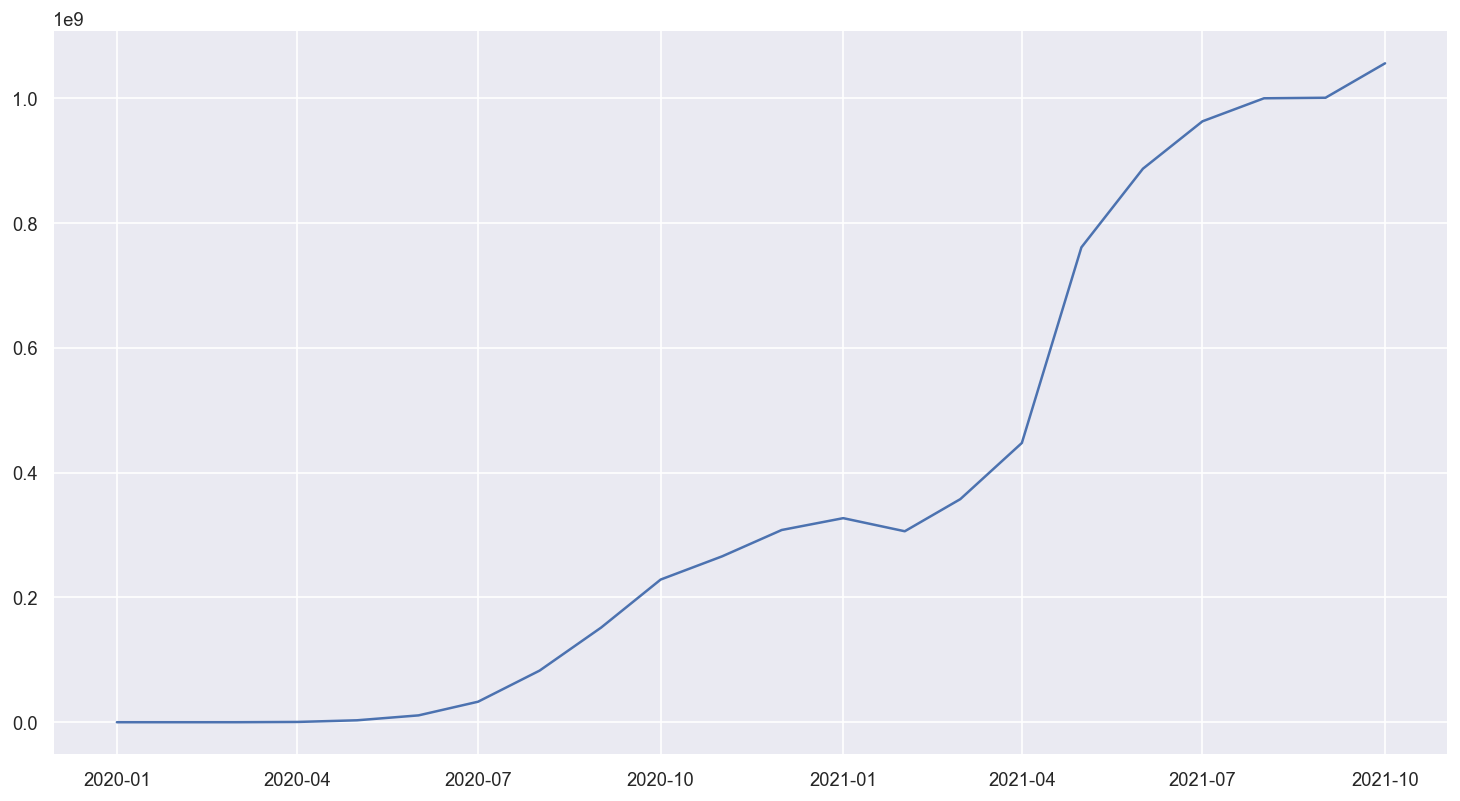

In [385]:
plt.figure(figsize=(15,8))
# plotting the graph
plt.plot(data_series.date, data_series['Total Confirmed'])
plt.show()

# it is hard to predict in this model beause the chart goes pretty straight and goes up not heavily but after April 2021 the chart goes up heavily and it is hard to predict that from the previous values. 

# Implementation Of ARIMA On The Non-Stationary Time Series

In [451]:
#importing datatime
from datetime import datetime
# Importing the dataset
dataset = pd.read_csv('C:/Users/Admin/Machine Learning chapter 5/AirPassengers.csv')
#converting string to Pandas datatime
dataset['Month'] = pd.to_datetime(dataset['Month'],infer_datetime_format=True) 
df = dataset.set_index(['Month'])
# printing
df.head(5)

#Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121

In [452]:
# checking for null values
df.isnull().sum()

#Passengers    0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

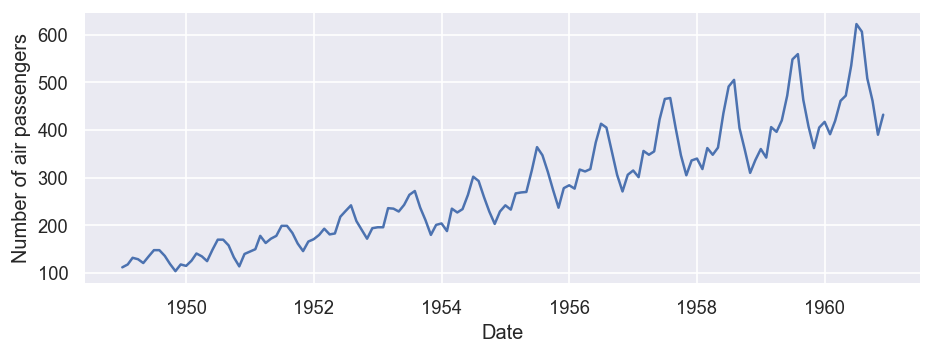

In [453]:
# labeling
plt.xlabel('Date')
plt.ylabel('Number of air passengers')
# plotting
plt.plot(df)
plt.show

Check If The Time Series Is Stationary
As we already discussed, the easiest way to know if a time series is stationary is to check if its mean and standard deviation is constant. If both are constant over time, the time series is stationary.

So, let us find the mean and standard deviation and plot them.

In [454]:
#Determine rolling statistics
rolmean = df.rolling(window=12).mean() 
rolstd = df.rolling(window=12).std()

In [455]:
rolmean

#Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]

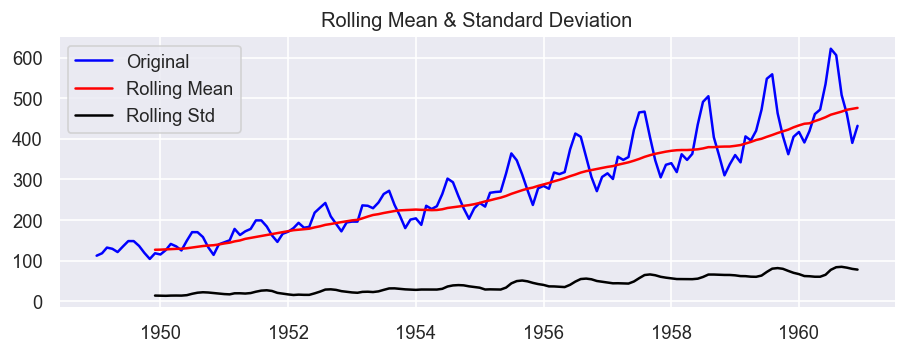

In [456]:
#Plot rolling statistics
orig = plt.plot(df, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
# labeling
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

The mean is not constant, growing over time. Which means that data is not stationary. 

Data Transformation To Make Time-Series Data Stationary
There are many ways to make a non-stationary time series stationary. For example, using log, square, square root, cube, cube root, and many other useful methods. Here we will discuss some of these methods to transform our time series into stationery.

Log Scale Transformation
Log transformation is a data transformation method that replaces each variable x with a log(x). Let us now use log scale transformation and see if it can transform our dataset into a stationary dataset.

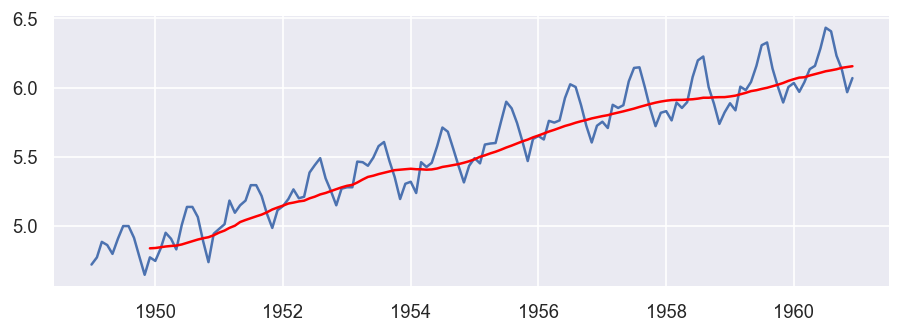

In [457]:
# importing the module
import numpy as np

#Estimating trend
logScale = np.log(df)
#The below transformation is required to make series stationary
movingAverage = logScale.rolling(window=12).mean()
movingSTD = logScale.rolling(window=12).std()
# plotting the graph
plt.plot(logScale)
plt.plot(movingAverage, color='red')
plt.show()

In [458]:
# Trasformed dataset
log_transformed = logScale - movingAverage
log_transformed.head(12)
#Remove NAN values
log_transformed.dropna(inplace=True)
# printing heading of dataset
log_transformed.head()

#Passengers
Month                  
1949-12-01    -0.065494
1950-01-01    -0.093449
1950-02-01    -0.007566
1950-03-01     0.099416
1950-04-01     0.052142

In [459]:
len(log_transformed)

133

the log scale transformed starts at month 12 1949 bc of the rolling window 12. 

In [460]:
len(logScale)

144

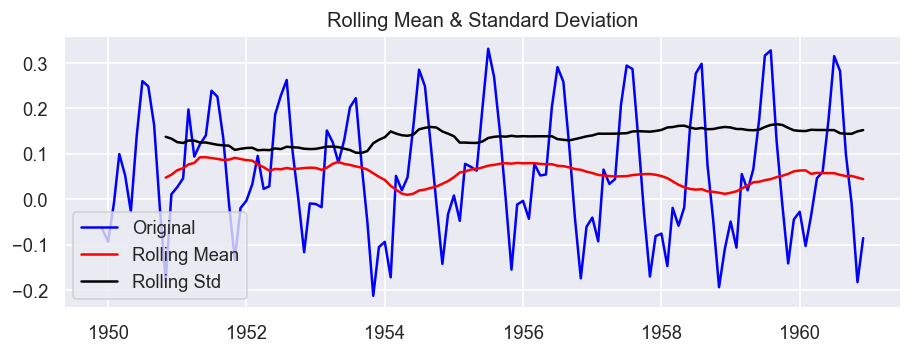

In [461]:
#Determine rolling statistics
movingAverage = log_transformed.rolling(window=12).mean()
movingSTD = log_transformed.rolling(window=12).std()
    
#Plot rolling statistics for the transformed dataset
orig = plt.plot(log_transformed, color='blue', label='Original')
mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
std = plt.plot(movingSTD, color='black', label='Rolling Std')
# plotting stationary time series data
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

Notice that the mean and standard deviation are nearly constant, suggesting that the transformed time series data is now stationary.

Another way to make it stationary. 

Timeshift Transformation
We will use the time shift transformation to transform non-stationary time series into stationary data.

Let us first plot the transform data using timeshift transformation.

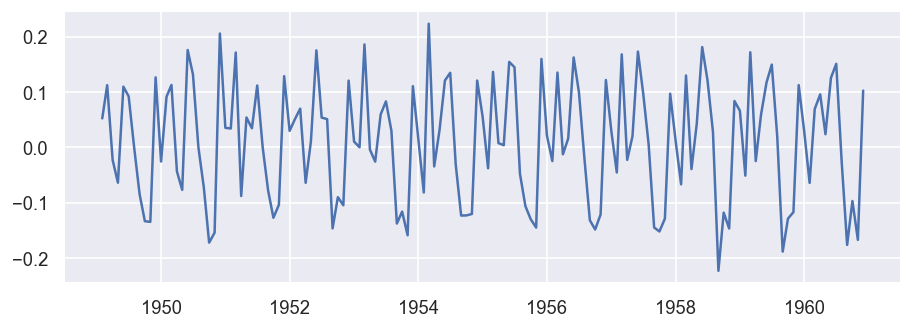

In [462]:
# transforming the dataset
Shifting = logScale - logScale.shift()
# plotting 
plt.plot(Shifting)
plt.show()

As you can see that there is no trend now. Let us also plot the transformed data’s rolling mean and standard deviation.

In [463]:
logScale

#Passengers
Month                  
1949-01-01     4.718499
1949-02-01     4.770685
1949-03-01     4.882802
1949-04-01     4.859812
1949-05-01     4.795791
...                 ...
1960-08-01     6.406880
1960-09-01     6.230481
1960-10-01     6.133398
1960-11-01     5.966147
1960-12-01     6.068426

[144 rows x 1 columns]

In [464]:
Shifting

#Passengers
Month                  
1949-01-01          NaN
1949-02-01     0.052186
1949-03-01     0.112117
1949-04-01    -0.022990
1949-05-01    -0.064022
...                 ...
1960-08-01    -0.026060
1960-09-01    -0.176399
1960-10-01    -0.097083
1960-11-01    -0.167251
1960-12-01     0.102279

[144 rows x 1 columns]

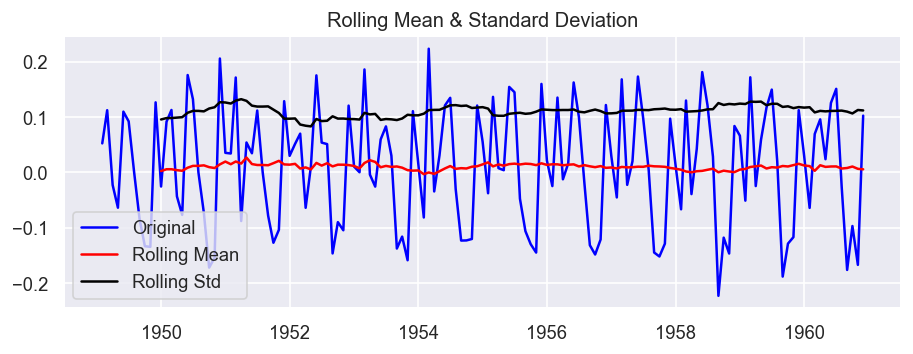

In [465]:
#Determine rolling statistics
movingAverage = Shifting.rolling(window=12).mean()
movingSTD = Shifting.rolling(window=12).std()
    
#Plot rolling statistics for the transformed dataset
orig = plt.plot(Shifting, color='blue', label='Original')
mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
std = plt.plot(movingSTD, color='black', label='Rolling Std')
# Labeling
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

As you can see that the rolling standard deviation and mean are nearly constant, which shows that the dataset is now stationary.

Similarly, you can use any other method to transform the time series into stationery.

When there is a trend or sesonality mean is not going to be constant beause data could grow or decrease over time and therefore it is not stationary. 

C:\Users\Admin\anacondalastone\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anacondalastone\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anacondalastone\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


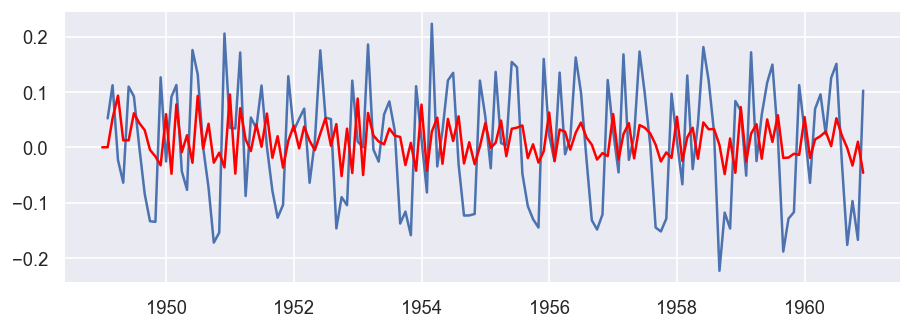

In [466]:
# 2, 1, 2 (arima p d q )
model = ARIMA(Shifting, order=(2,1,2))
# fiting the model
results_ARIMA = model.fit()
# plotting the results
plt.plot(Shifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.show()

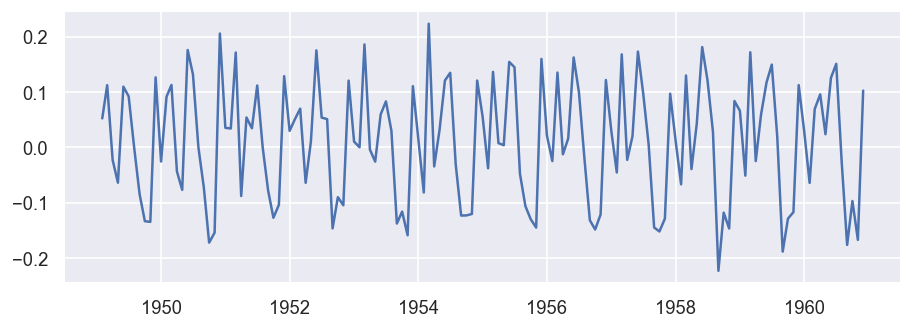

In [467]:
plt.plot(Shifting)

In [468]:
results_ARIMA

In [471]:
Model_fit = results_ARIMA.fittedvalues

In [472]:
# making predictions
predictions_ARIMA = pd.Series(results_ARIMA.fittedvalues, copy=True)
#Convert to cumulative sum
predictions_ARIMA_cumsum = predictions_ARIMA.cumsum()

In [473]:
predictions_ARIMA_cumsum

Month
1949-01-01    0.000000
1949-02-01    0.000000
1949-03-01    0.052186
1949-04-01    0.145375
1949-05-01    0.157925
                ...   
1960-08-01    1.861922
1960-09-01    1.860531
1960-10-01    1.827596
1960-11-01    1.837658
1960-12-01    1.791632
Length: 144, dtype: float64

In [474]:
# reversing the transformation to original data
predictions_ARIMA_log = pd.Series(logScale['#Passengers'].iloc[0], index=logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_cumsum, fill_value=0)
# printing heading 
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.718499
1949-03-01    4.770685
1949-04-01    4.863873
1949-05-01    4.876424
dtype: float64

These are the values of the best-fitted line of the model. Let us visualize the original dataset and these predictions to evaluate our model.

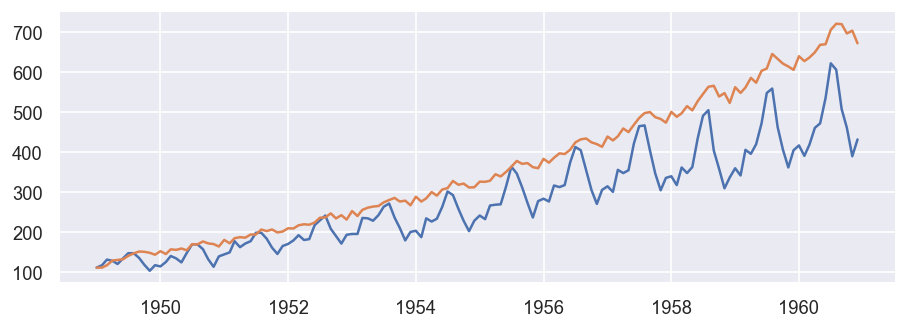

In [475]:
# Inverse of log is exp 
predictions_ARIMA = np.exp(predictions_ARIMA_log)
# plotting actual values
plt.plot(df)
# plotting predictions
plt.plot(predictions_ARIMA)
plt.show()

In [476]:
from statsmodels.graphics.tsaplots import plot_predict

In [477]:
# predict future points ( for 5 years)
results_ARIMA.plot_predict(1, 204) 

AttributeError: 'ARIMAResults' object has no attribute 'plot_predict'

In [481]:
!pip install statsmodels --upgrade

In [483]:
# Actual vs Fitted
predict_values = results_ARIMA.predict(dynamic=False)

In [484]:
predict_values

1949-01-01    0.000000
1949-02-01    0.000000
1949-03-01    0.052186
1949-04-01    0.093189
1949-05-01    0.012551
                ...   
1960-08-01    0.021392
1960-09-01   -0.001390
1960-10-01   -0.032935
1960-11-01    0.010062
1960-12-01   -0.046026
Freq: MS, Name: predicted_mean, Length: 144, dtype: float64

In [485]:
df['#Passengers']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

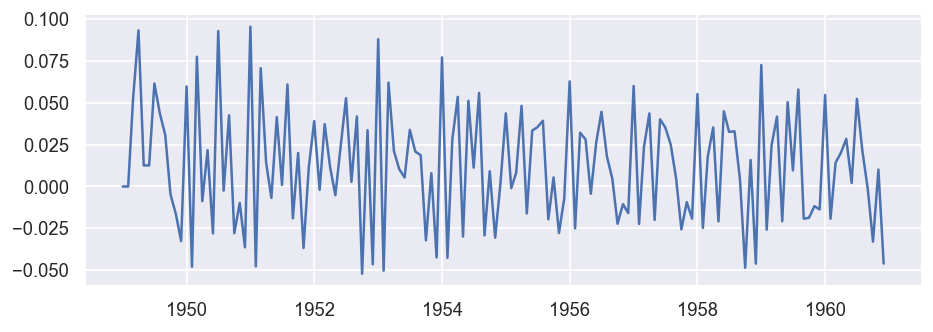

In [488]:
plt.plot(predict_values,label='Predicted')

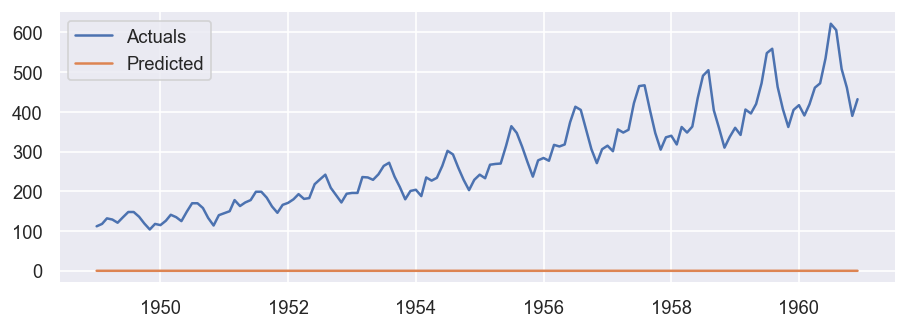

In [486]:
#the model is doing pretty well compared the Actuals with the Predicted values. 
plt.plot(df['#Passengers'],label="Actuals")
plt.plot(predict_values,label='Predicted')
plt.legend()
plt.show()

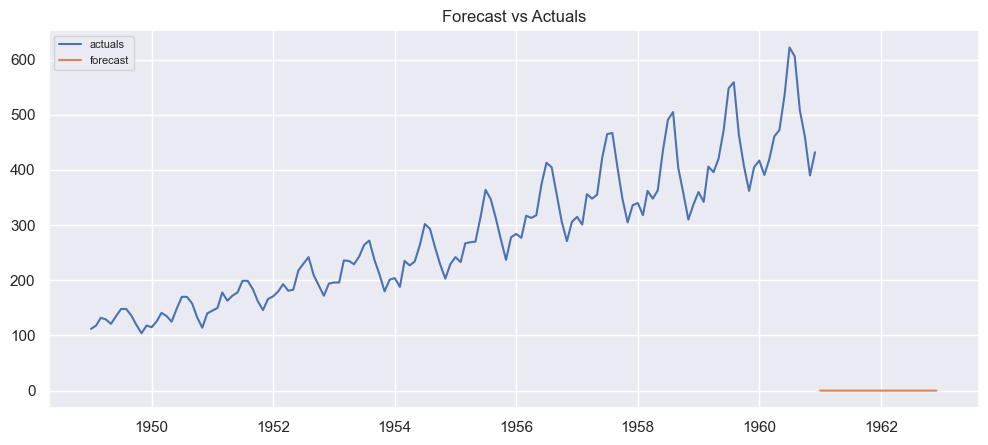

In [490]:
#model = ARIMA(train, order=(1, 1, 1))  
#fitted = model.fit()
# Forecast
fc = results_ARIMA.forecast(24, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc)
#lower_series = pd.Series(conf[:, 0], index=test.index)
#upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(df['#Passengers'], label='actuals')
#plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

the predictions are doing really bad on this actuals based. 

In [491]:
fc

1961-01-01    0.077316
1961-02-01   -0.025761
1961-03-01    0.032926
1961-04-01   -0.004821
1961-05-01    0.019177
1961-06-01    0.003904
1961-07-01    0.013623
1961-08-01    0.007438
1961-09-01    0.011374
1961-10-01    0.008869
1961-11-01    0.010463
1961-12-01    0.009449
1962-01-01    0.010094
1962-02-01    0.009684
1962-03-01    0.009945
1962-04-01    0.009779
1962-05-01    0.009884
1962-06-01    0.009817
1962-07-01    0.009860
1962-08-01    0.009833
1962-09-01    0.009850
1962-10-01    0.009839
1962-11-01    0.009846
1962-12-01    0.009842
Freq: MS, Name: predicted_mean, dtype: float64

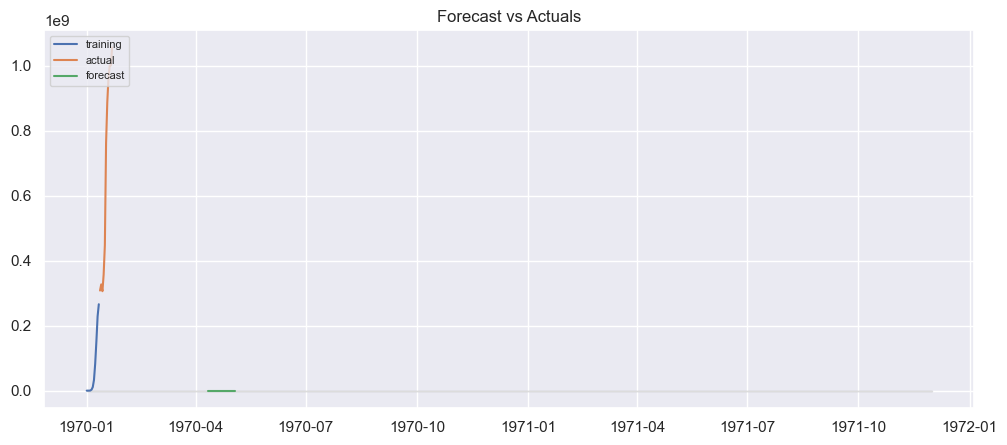

In [358]:
# Forecast for the next two years. 
n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data_series.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Another Example of time Series. 

Source: https://www.projectpro.io/article/how-to-build-arima-model-in-python/544

In [566]:
# Setting up packages for data manipulation and machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pmdarima as pm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set_style('white', { 'axes.spines.right': False, 'axes.spines.top': False})

In [567]:
from datetime import datetime
# Importing the dataset
dataset = pd.read_csv('C:/Users/Admin/Machine Learning chapter 5/WWWusage.csv',names=['WWWusage'],header=0)
dataset

WWWusage
1   1          88
2   2          84
3   3          85
4   4          85
5   5          84
...           ...
96  96        222
97  97        228
98  98        226
99  99        222
100 100       220

[100 rows x 1 columns]

In [568]:
dataset = dataset.reset_index(drop=True)
dataset

WWWusage
0         88
1         84
2         85
3         85
4         84
..       ...
95       222
96       228
97       226
98       222
99       220

[100 rows x 1 columns]

In [569]:
len(dataset)

100

In [570]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   WWWusage  100 non-null    int64
dtypes: int64(1)
memory usage: 928.0 bytes


In [571]:
from statsmodels.graphics.tsaplots import plot_acf

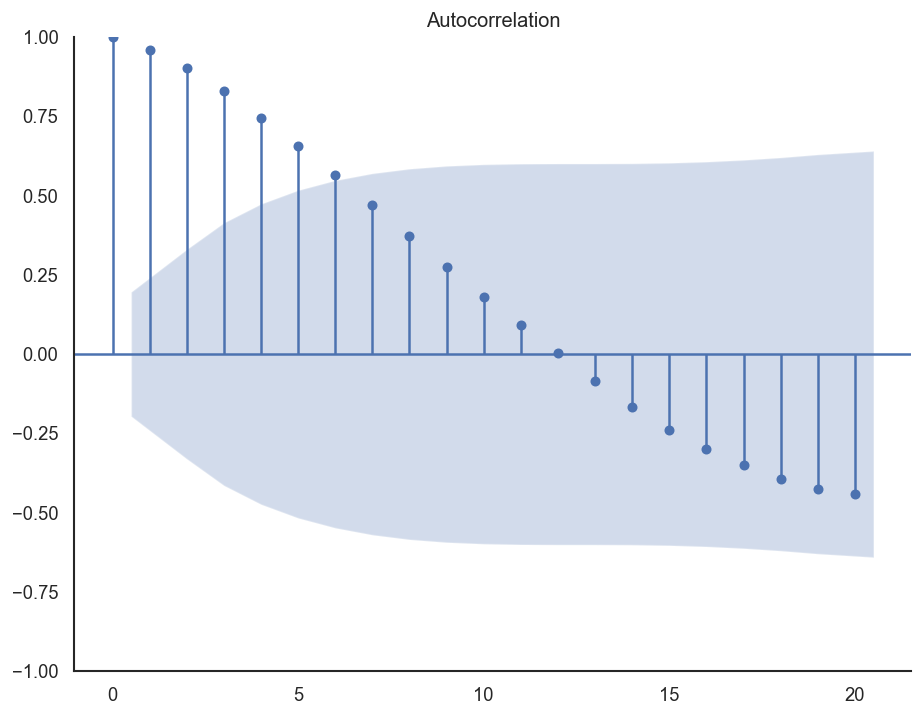

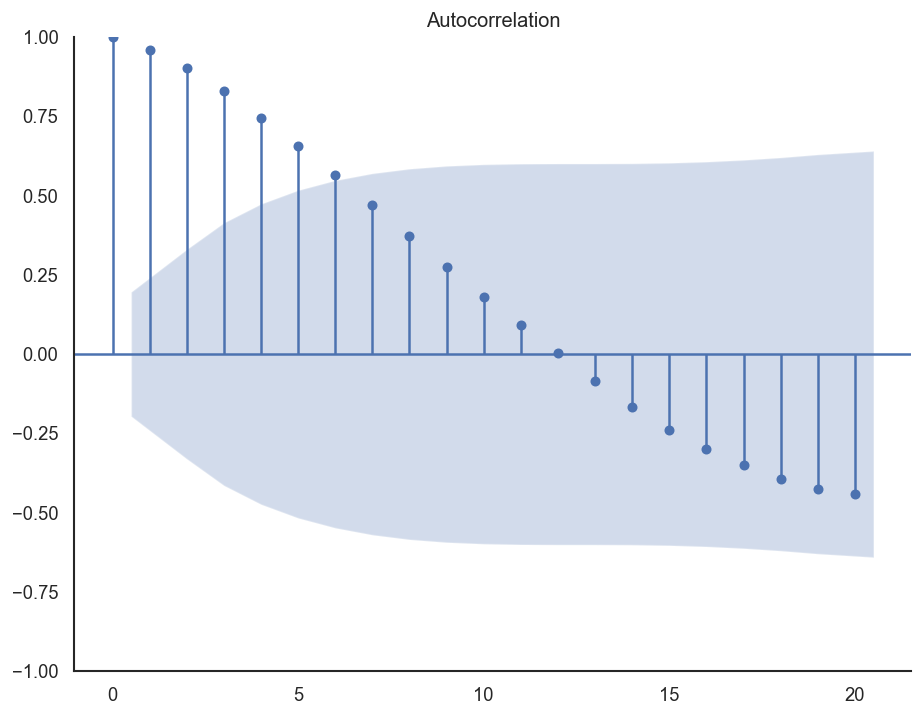

In [572]:
plot_acf(dataset['WWWusage'])

Clearly, the data is not ideal for the ARIMA model to directly start autoregressive training. So let’s see how the differencing segment of ARIMA makes the data stationary.

In [573]:
dataset['WWWusage'].diff()

0     NaN
1    -4.0
2     1.0
3     0.0
4    -1.0
     ... 
95    7.0
96    6.0
97   -2.0
98   -4.0
99   -2.0
Name: WWWusage, Length: 100, dtype: float64

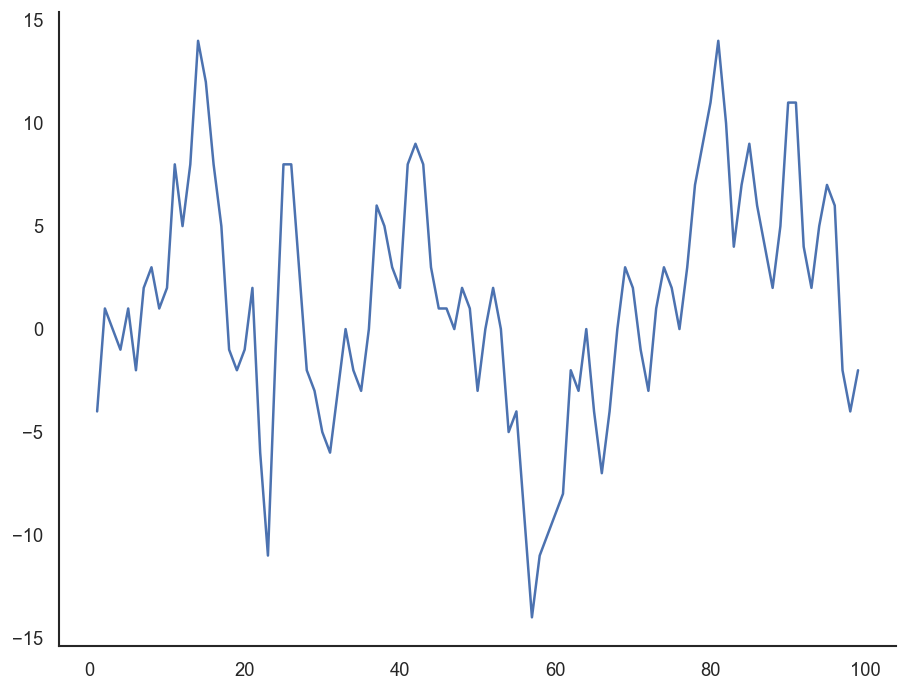

In [574]:
plt.plot(dataset['WWWusage'].diff())

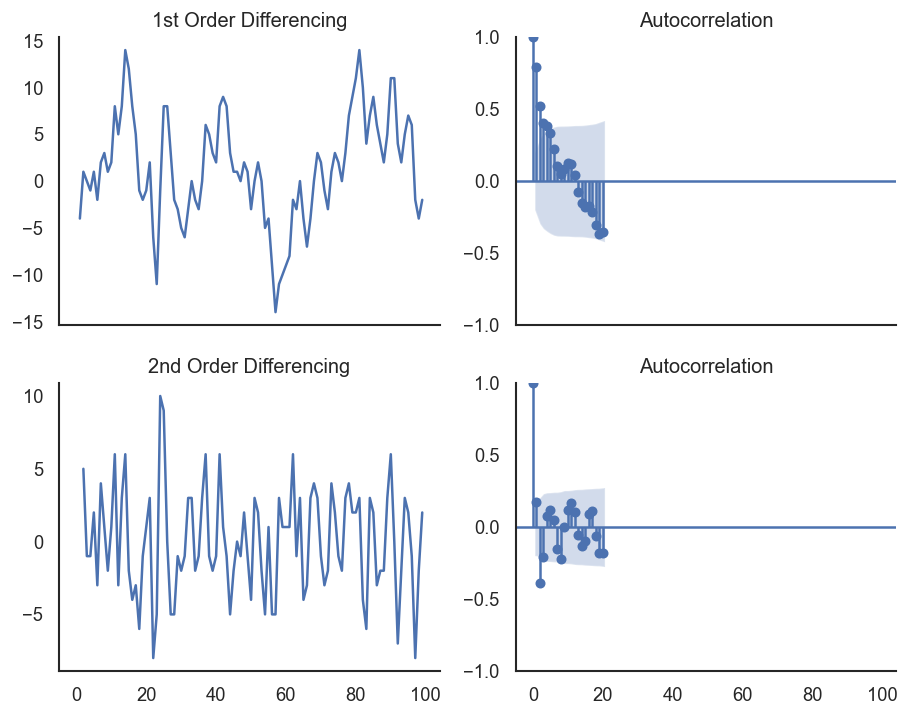

In [575]:
#Importing the modules
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# fixing the size
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# 1st Differencing to make stationary time series data
fig, axes = plt.subplots(2, 2, sharex=True)
axes[0, 0].plot(dataset['WWWusage'].diff()); axes[0, 0].set_title('1st Order Differencing')
plot_acf(dataset['WWWusage'].diff().dropna(), ax=axes[0, 1])
#2nd Differencing to make stationary time series data
axes[1, 0].plot(dataset['WWWusage'].diff().diff()); axes[1, 0].set_title('2nd Order Differencing')
plot_acf(dataset['WWWusage'].diff().diff().dropna(), ax=axes[1, 1])
plt.show()

In the second order differencing the 3rd lag is  over-differenced

From the autocorrelation graph, we can decide if more differencing is needed. If collectively the autocorrelations, or the data point of each lag (in the horizontal axis), are positive for several consecutive lags, more differencing might be needed. Conversely, if more data points are negative, the series is over-differenced.

However, a more mathematical test can be employed to determine which order is best for the data in question. The Augmented Dickey-Fuller test is one such measure that statsmodel readily provides. The ADF test aims to reject the null hypothesis that the given time-series data is non-stationary. It calculates the p-value and compares it with a threshold value or significance level of 0.05. If the p-value is less than this level, then the data is stationary; else, the differencing order is incremented by one.

In [576]:
#Importing the modules
from statsmodels.tsa.stattools import adfuller

In [577]:
result = adfuller(dataset['WWWusage'].dropna())
print('p-value',result)

p-value (-2.4642397172033688, 0.12441935447109453, 3, 96, {'1%': -3.5003788874873405, '5%': -2.8921519665075235, '10%': -2.5830997960069446}, 444.67104090432554)


In [578]:
#the second is the p value
result[1]

0.12441935447109453

In [579]:
result2 = adfuller(dataset['WWWusage'].diff().dropna())
print('p-value',result2)

p-value (-2.722238490442953, 0.07026846015272707, 2, 96, {'1%': -3.5003788874873405, '5%': -2.8921519665075235, '10%': -2.5830997960069446}, 438.89606128026)


In [580]:
result2[1]

0.07026846015272707

In [581]:
result3 = adfuller(dataset['WWWusage'].diff().diff().dropna())
print('p-value',result3)

p-value (-9.929762173626015, 2.843428755547158e-17, 1, 96, {'1%': -3.5003788874873405, '5%': -2.8921519665075235, '10%': -2.5830997960069446}, 438.2804466027877)


In [582]:
result3[1]

2.843428755547158e-17

As we see above, after the 2nd order differencing, the p-value drops beyond the acceptable threshold. Thus, we can consider the order of differencing (“d”) as 2. This corresponds well with the autocorrelation line graph seen above. However, the p-value for the 1st order is much closer to the threshold, so to be conservative, we will consider “d” as 1 and see how the model performs.

The next step in the ARIMA model is computing “p,” or the order for the autoregressive model. We can inspect the partial autocorrelation plot, which measures the correlation between the time-series data and a certain lag. Based on the presence or absence of correlation, we can determine whether the lag or order is needed or not.

Thus, we determine “p” based on the most significant lag in the partial autocorrelation plot. We can check the plot up to 2nd order difference to be sure.

C:\Users\Admin\anacondalastone\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\Admin\anacondalastone\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


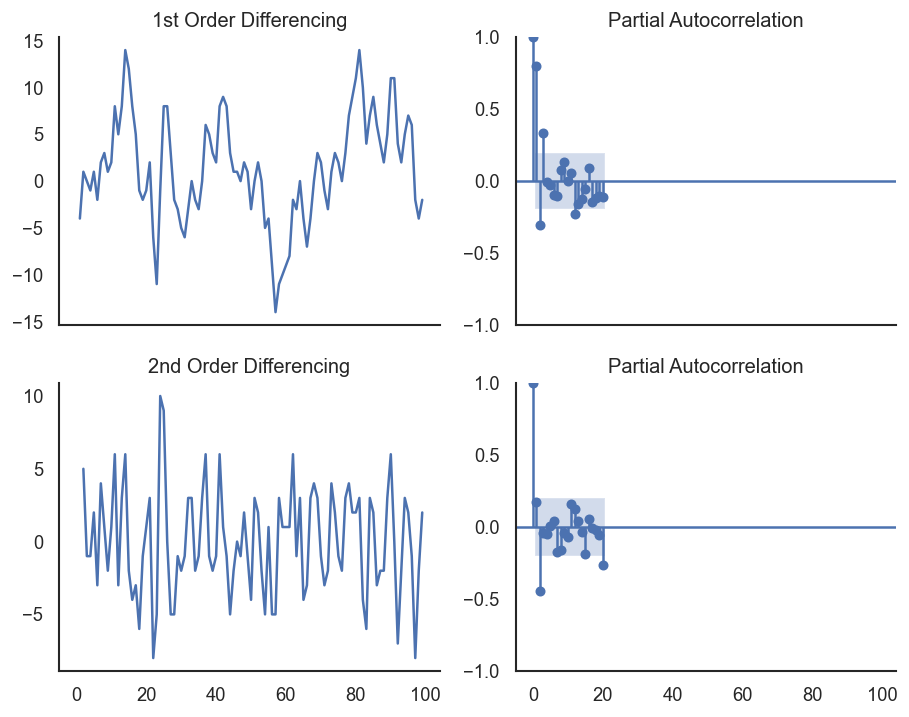

In [583]:
# fixing the size
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# 1st Differencing to make stationary time series data
fig, axes = plt.subplots(2, 2, sharex=True)
axes[0, 0].plot(dataset['WWWusage'].diff()); axes[0, 0].set_title('1st Order Differencing')
plot_pacf(dataset['WWWusage'].diff().dropna(), ax=axes[0, 1])
#2nd Differencing to make stationary time series data
axes[1, 0].plot(dataset['WWWusage'].diff().diff()); axes[1, 0].set_title('2nd Order Differencing')
plot_pacf(dataset['WWWusage'].diff().diff().dropna(), ax=axes[1, 1])
plt.show()

Thus, we consider “p” to be 1. in the 2nd differencing the lag 2 is over differncing, below 0. 

Looking at the number of lags crossing the threshold, we can determine how much of the past would be significant enough to consider for the future. The ones with high correlation contribute more and would be enough to predict future values. From the plots above, the moving average (MA) parameter can be set to 2.

Thus, our final ARIMA model can be defined as ARIMA(p=1, d=1,q= 2).

In [584]:
import pmdarima as pm

In [585]:
model = pm.auto_arima(dataset['WWWusage'], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=525.587, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=533.474, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=532.437, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=525.893, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=531.477, Time=0.03 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=515.248, Time=0.06 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=513.459, Time=0.03 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=515.284, Time=0.05 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=511.465, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=530.444, Time=0.03 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=513.291, Time=0.03 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=513.256, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=523.592, Time=0.03 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time

Doing it manually the best ARIMA paramters are (p=1, d=1,q= 2).
the autoarima function proposes the Best model:  ARIMA(2,2,0)

The AIC must be as low as possible. By displaying the model summary of the trained ARIMA model from statsmodel, we can check the AIC scores and other statistical performance measures.

To reduce AIC, we can try changing the p, q, and d values or using training techniques like k-cross-validation. 

In [587]:
# 1,1,2 ARIMA Model
from statsmodels.tsa.arima.model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(dataset['WWWusage'], order=(1,1,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:               WWWusage   No. Observations:                  100
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -254.126
Date:                Wed, 29 Mar 2023   AIC                            516.253
Time:                        22:09:33   BIC                            526.633
Sample:                             0   HQIC                           520.453
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6976      0.130      5.365      0.000       0.443       0.952
ma.L1          0.4551      0.169      2.699      0.007       0.125       0.786
ma.L2         -0.0664      0.157     -0.424      0.6

In [588]:
#the auto arima model gives a better result. 
model = ARIMA(dataset['WWWusage'], order=(2,2,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:               WWWusage   No. Observations:                  100
Model:                 ARIMA(2, 2, 0)   Log Likelihood                -252.732
Date:                Wed, 29 Mar 2023   AIC                            511.465
Time:                        22:09:59   BIC                            519.220
Sample:                             0   HQIC                           514.601
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2579      0.103      2.510      0.012       0.056       0.459
ar.L2         -0.4407      0.087     -5.093      0.000      -0.610      -0.271
sigma2        10.1268      1.519      6.668      0.0

In [594]:
from statsmodels.graphics.tsaplots import plot_predict

In [595]:
#Actual Vs fitted.
predict_values = model_fit.predict(dynamic=False)

In [596]:
predict_values

0       0.000000
1     132.000388
2      79.999797
3      86.895535
4      82.538600
         ...    
95    221.655063
96    228.193663
97    232.860709
98    222.377616
99    221.009850
Name: predicted_mean, Length: 100, dtype: float64

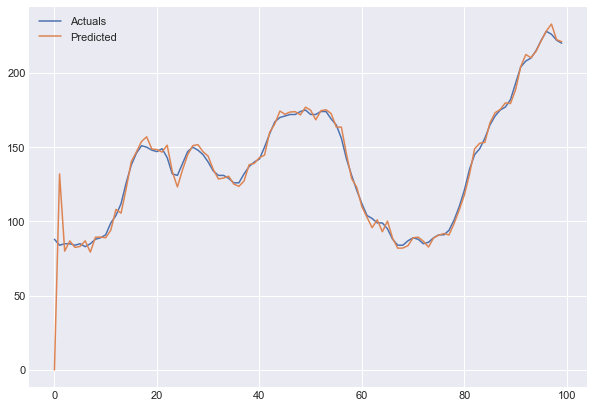

In [597]:
plt.plot(dataset['WWWusage'],label="Actuals")
plt.plot(predict_values,label='Predicted')
plt.legend()
plt.show()

When you set dynamic=False the in-sample lagged values are used for prediction.

That is, the model gets trained up until the previous value to make the next prediction. This can make the fitted forecast and actuals look artificially good.

So, we seem to have a decent ARIMA model. But is that the best?

Can’t say that at this point because we haven’t actually forecasted into the future and compared the forecast with the actual performance.

# How to do find the optimal ARIMA model manually using Out-of-Time Cross validation In Out-of-Time cross-validation, you take few steps back in time and forecast into the future to as many steps you took back. Then you compare the forecast against the actuals.

How to do find the optimal ARIMA model manually using Out-of-Time Cross validation
In Out-of-Time cross-validation, you take few steps back in time and forecast into the future to as many steps you took back. Then you compare the forecast against the actuals.

To do out-of-time cross-validation, you need to create the training and testing dataset by splitting the time series into 2 contiguous parts in approximately 75:25 ratio or a reasonable proportion based on time frequency of series.

Why am I not sampling the training data randomly you ask?

That’s because the order sequence of the time series should be intact in order to use it for forecasting.

Why am I not sampling the training data randomly you ask?

That’s because the order sequence of the time series should be intact in order to use it for forecasting. CANNOT BE RANDOM

In [598]:
from statsmodels.tsa.stattools import acf

In [599]:
#create training and test 
train = dataset['WWWusage'][:85]#the first 85%
test = dataset['WWWusage'][85:]#the last 25%

In [610]:
#the auto arima model gives a better result. 
model = ARIMA(train, order=(1,2,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:               WWWusage   No. Observations:                   85
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -219.910
Date:                Wed, 29 Mar 2023   AIC                            445.820
Time:                        22:53:02   BIC                            453.077
Sample:                             0   HQIC                           448.736
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2921      0.242     -1.208      0.227      -0.766       0.182
ma.L1          0.5983      0.201      2.977      0.003       0.204       0.992
sigma2        11.6973      1.893      6.178      0.0

In [623]:
len(test)

15

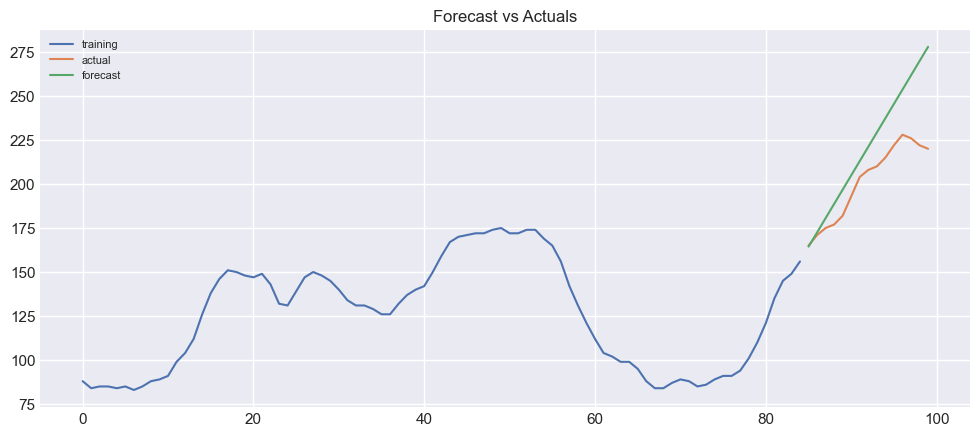

In [625]:
# Forecast using 95% confidence interval
fc = model_fit.forecast(15, alpha=0.05) 
# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
#lower_series = pd.Series(conf[:, 0], index=test.index)
#upper_series = pd.Series(conf[:, 1], index=test.index)
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
#plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [629]:
# Accuracy metrics
def forecast_accuracy(forecast , actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

In [630]:
forecast_accuracy(fc,test)

C:\Users\Admin\AppData\Local\Temp/ipykernel_25948/328471352.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  mins = np.amin(np.hstack([forecast[:,None],
C:\Users\Admin\AppData\Local\Temp/ipykernel_25948/328471352.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
C:\Users\Admin\AppData\Local\Temp/ipykernel_25948/328471352.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  maxs = np.amax(np.hstack([forecast[:,None],
C:\Users\Admin\AppData\Local\Temp/ipykernel_25948/328471352.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:,

{'mape': 0.09407427520520399,
 'me': 19.95051785528745,
 'mae': 20.025617451278972,
 'mpe': 0.09361912613858873,
 'rmse': 25.536644090564373,
 'acf1': 0.6892321152524802,
 'corr': 0.9562945743630964,
 'minmax': 0.08246862287843748}

# around 9,4% implies the model is about 90,6% to be accurate in predicting the next 15 obersvations

In [1]:
import pandas as pd
df = pd.read_csv('C:/Users/Admin/Machine Learning chapter 5/Time Series in Python/rainfall.csv')
df

date  rainfall
0     01-01-2010       2.9
1     02-01-2010      10.2
2     03-01-2010       0.9
3     04-01-2010      48.6
4     05-01-2010       9.6
...          ...       ...
3769  27-04-2020       0.0
3770  28-04-2020       8.4
3771  29-04-2020       5.4
3772  30-04-2020       3.2
3773  01-05-2020       5.2

[3774 rows x 2 columns]

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3774 entries, 0 to 3773
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      3774 non-null   object 
 1   rainfall  3774 non-null   float64
dtypes: float64(1), object(1)
memory usage: 59.1+ KB


Our dataset is a daily rainfall time series data (in mm) from January, 1st 2010 to May, 1st 2020.

Let’s plot how the rainfall data varies with time (we take one month for illustration purposes).

<AxesSubplot:xlabel='date'>

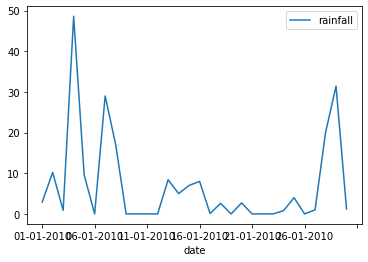

In [3]:
import matplotlib.pyplot as plt
# First 30 days
first_30 = df[:30]
first_30.plot.line(x='date', y='rainfall')

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

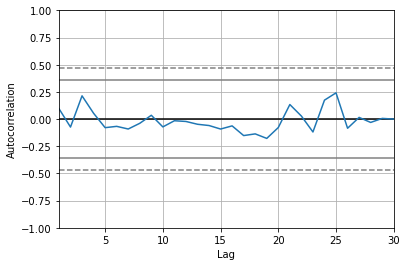

In [4]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(first_30['rainfall'])

There seems to be slight correlation when the lag time is short (0–5 days) and when it is sufficiently long (20–25 days), but not in between the intermediate values.

Valuable information that we can pick up for our ARIMA implementation next!

Then, we define the model with these initial hyperparameters for p, d, q 

In [8]:
from statsmodels.tsa.arima.model import ARIMA

In [9]:
# fit model
p,d,q = 5,1,0
model = ARIMA(first_30['rainfall'], order=(p,d,q))
model_fit = model.fit()

In [10]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:               rainfall   No. Observations:                   30
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -112.888
Date:                Fri, 15 Sep 2023   AIC                            237.775
Time:                        02:27:52   BIC                            245.979
Sample:                             0   HQIC                           240.345
                                 - 30                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7376      0.196     -3.766      0.000      -1.122      -0.354
ar.L2         -0.7374      0.429     -1.720      0.085      -1.578       0.103
ar.L3         -0.2237      0.677     -0.330      0.7

Notice the AIC, BIC, and HQIC metrics at the top? The lower these values are, the better the fit of the model is. So you can perform further hyperparameter tuning or data preprocessing to achieve better results!

We have our first working model of ARIMA. The final section will walk you through how to make future prediction given our trained model.

We only use the first month of the dataset in order to fit the ARIMA model to later do the predictions. 

# Forecasting Using ARIMA
Let’s first expand our dataset to include 365 days instead of 30 .

In [11]:
data = df[:365]['rainfall'].values

We then split the data into train (66%) and test set (34%).

In [12]:
train_size = int(len(data) * 0.66)
train_size

240

In [13]:
train, test = data[0:train_size], data[train_size:len(data)]

And initialize the historical and prediction values for comparison purposes

In [14]:
history = [x for x in train]
predictions = []

In [17]:
history[0:150]

[2.9,
 10.2,
 0.9,
 48.6,
 9.6,
 0.0,
 29.0,
 17.1,
 0.0,
 0.0,
 0.0,
 0.0,
 8.4,
 5.0,
 7.0,
 8.0,
 0.1,
 2.6,
 0.0,
 2.7,
 0.0,
 0.0,
 0.0,
 0.8,
 4.0,
 0.0,
 1.0,
 20.0,
 31.4,
 1.2,
 3.7,
 0.0,
 15.1,
 0.0,
 0.0,
 55.2,
 0.0,
 0.0,
 0.0,
 25.1,
 0.0,
 50.9,
 3.3,
 7.4,
 0.9,
 15.0,
 3.4,
 1.3,
 6.3,
 190.0,
 3.6,
 0.0,
 0.0,
 0.0,
 78.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.0,
 0.0,
 0.0,
 35.7,
 0.1,
 0.0,
 0.0,
 10.0,
 1.4,
 10.0,
 19.5,
 0.2,
 24.0,
 15.2,
 35.9,
 21.9,
 0.0,
 0.0,
 0.0,
 60.0,
 0.0,
 4.8,
 19.7,
 8.9,
 0.0,
 0.0,
 17.9,
 10.0,
 0.0,
 19.9,
 0.0,
 0.0,
 2.9,
 7.7,
 0.0,
 3.8,
 1.9,
 8.1,
 17.2,
 1.4,
 0.0,
 0.0,
 0.0,
 1.9,
 0.0,
 0.1,
 20.4,
 0.0,
 39.9,
 29.7,
 1.0,
 0.0,
 0.0,
 0.2,
 39.9,
 0.0,
 35.0,
 2.9,
 31.0,
 0.0,
 0.0,
 70.0,
 19.9,
 0.0,
 54.1,
 0.0,
 0.0,
 0.0,
 0.0,
 5.2,
 0.2,
 0.9,
 1.4,
 0.9,
 0.0,
 0.5,
 0.1,
 0.0,
 59.8,
 1.8,
 25.0,
 2.2,
 8.1,
 0.0,
 1.6,
 0.0,
 7.7,
 0.0,
 0.0,
 0.3,
 10.0]

In [59]:
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    pred = model_fit.forecast()
    yhat = pred[0]
    predictions.append(yhat)
    # Append test observation into overall record
    obs = test[t]
    history.append(obs)

In [60]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 20.629


Pretty huge RMSE! Definitely there’s room for improvement here.

In [61]:
len(predictions)

125

In [62]:
len(test)

125

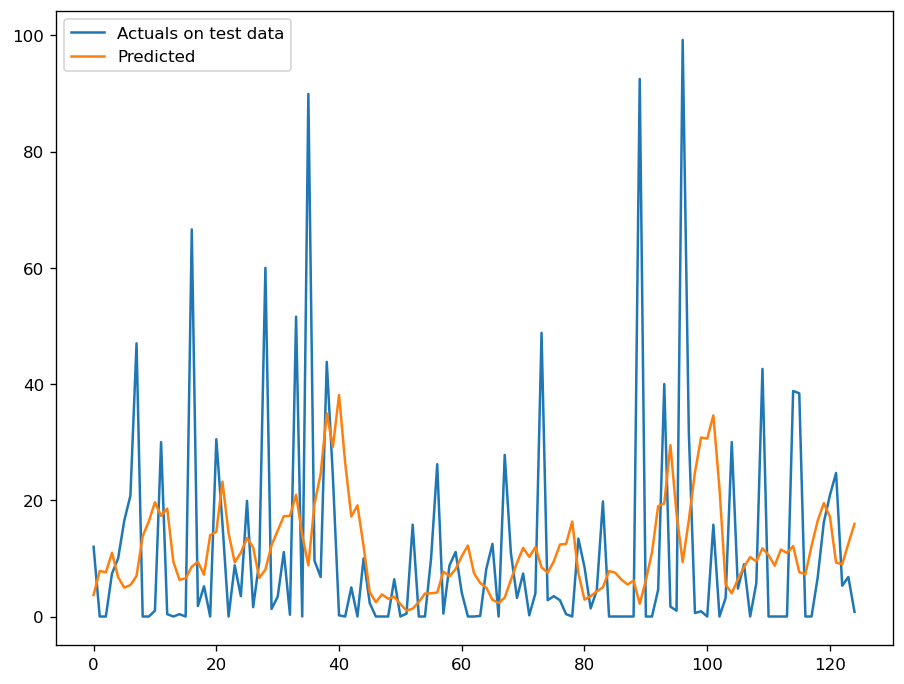

In [63]:
#the model is doing pretty well compared the Actuals with the Predicted values. 
plt.plot(test,label="Actuals on test data")
plt.plot(predictions,label='Predicted')
plt.legend()
plt.show()

# Not too bad! Our prediction (red) closely resembles the observations (blue) for some days (except in extreme rainfall cases with noticeably high peaks).

That’s it! We have so far discussed the basic principles of ARIMA and how to implement one in Python. One key characteristic of ARIMA, just like any other ML models, is its dependency on hyperparameter tuning. 